In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

## PART2-PAPER REPLICATION


In [2]:
IPI = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx')
CPI = pd.read_excel('CP Index/Consumer_Price_Index_CPI.xlsx')
canadian = pd.read_excel('Stock Index/Canadian_snp_tsx.xlsx')
french = pd.read_excel('Stock Index/French_CAC-40.xlsx')
german = pd.read_excel('Stock Index/German DAX.xlsx')
italian= pd.read_excel('Stock Index/ITALIAN_FTSE.xlsx')
japan=pd.read_excel('Stock Index/Nikkei 225 Historical Data.xlsx')
uk=pd.read_excel('Stock Index/UK FTSE_100.xlsx')
usa=pd.read_excel('Stock Index/USA Nasdaq.xlsx')


C:\Users\adity\AppData\Local\Temp\ipykernel_23160\4264721799.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  IPI['Date'] = pd.to_datetime(IPI['Date'])
C:\Users\adity\AppData\Local\Temp\ipykernel_23160\4264721799.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CPI['Date'] = pd.to_datetime(CPI['Date'])


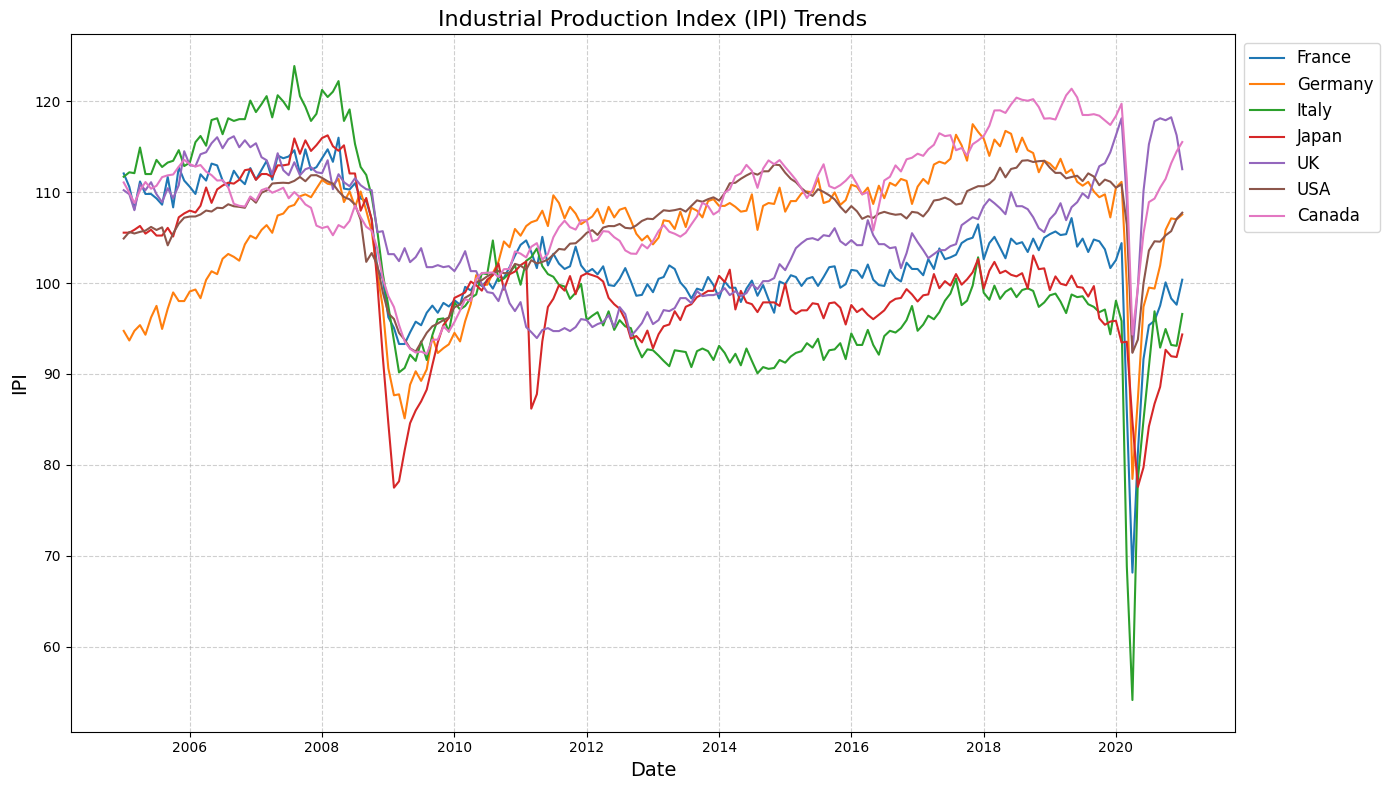

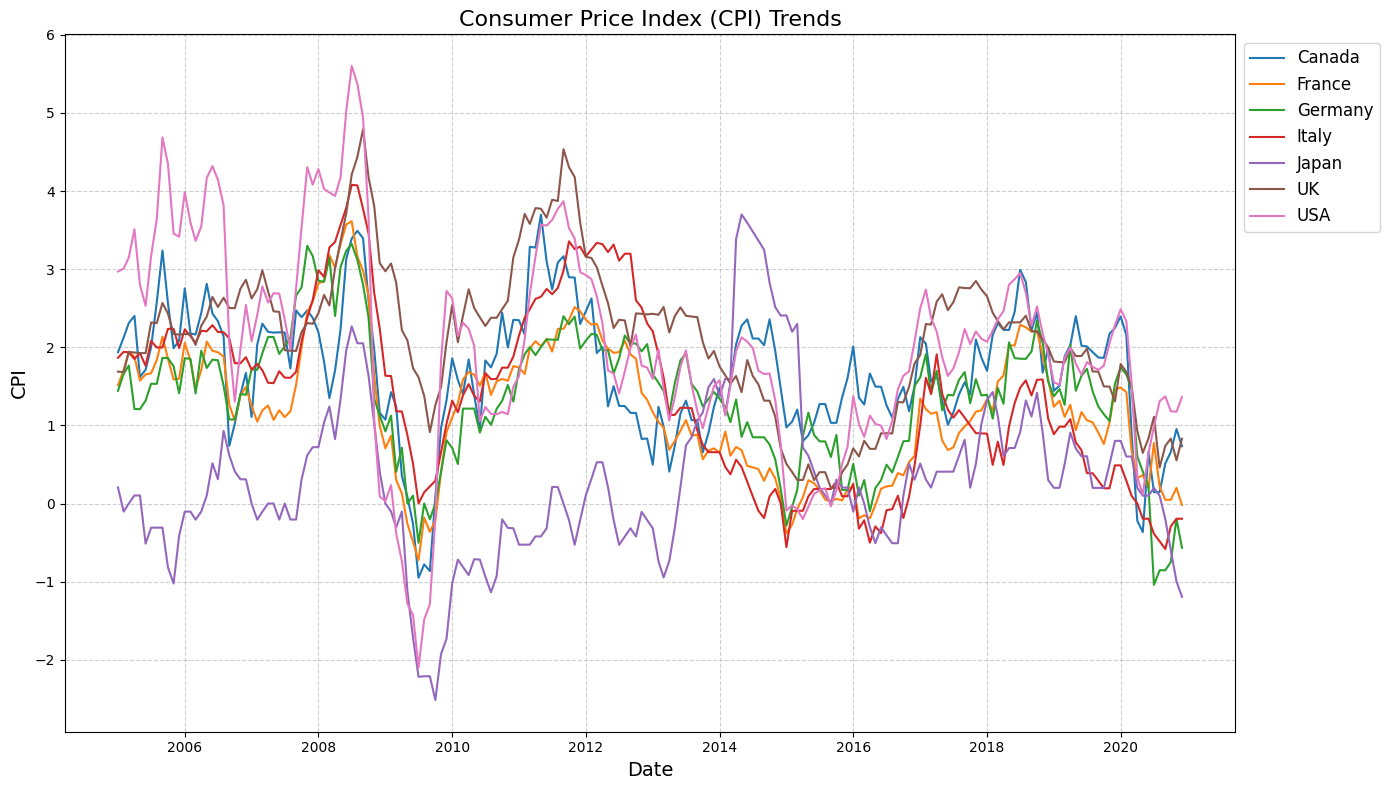

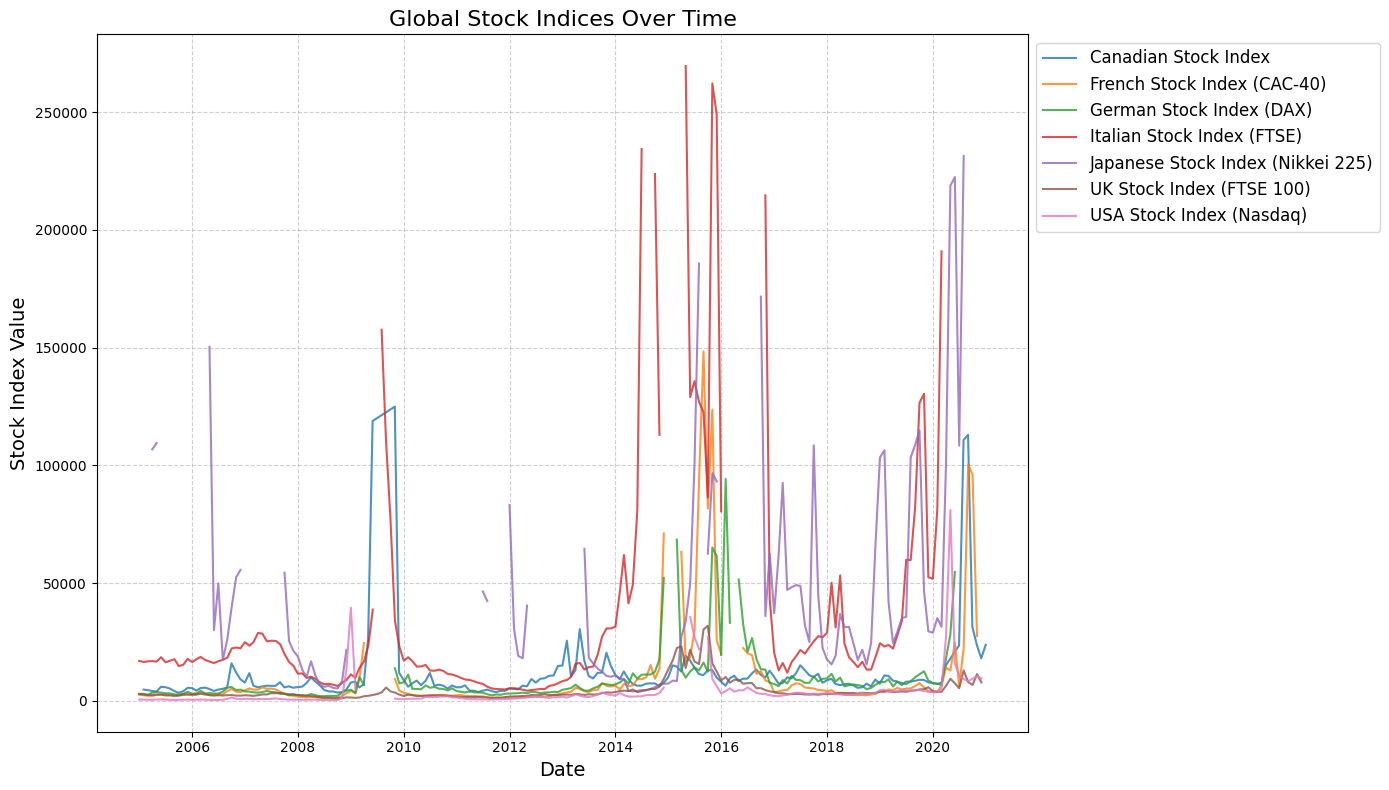

In [3]:
def plot_time_series(data, date_column, value_column, title, ylabel):
    # Ensure the date column is in datetime format
    data[date_column] = pd.to_datetime(data[date_column])
    data = data.sort_values(by=date_column)  # Ensure data is sorted by date

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(data[date_column], data[value_column], label=value_column)
    plt.title(title, fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    plt.show()

# Ensure the date column is in datetime format
IPI['Date'] = pd.to_datetime(IPI['Date'])
CPI['Date'] = pd.to_datetime(CPI['Date'])

# Plotting function for multiple countries
def plot_trend_lines(data, title, ylabel, date_column='Date'):
    plt.figure(figsize=(14, 8))
    # Iterate through columns (excluding the 'Date' column)
    for column in data.columns:
        if column != date_column:
            plt.plot(data[date_column], data[column], label=column)
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot all countries for Industrial Production Index (IPI)
plot_trend_lines(IPI, title='Industrial Production Index (IPI) Trends', ylabel='IPI')

# Plot all countries for Consumer Price Index (CPI)
plot_trend_lines(CPI, title='Consumer Price Index (CPI) Trends', ylabel='CPI')

canadian['Date'] = pd.to_datetime(canadian['Date'])
french['Date'] = pd.to_datetime(french['Date'])
german['Date'] = pd.to_datetime(german['Date'])
italian['Date'] = pd.to_datetime(italian['Date'])
japan['Date'] = pd.to_datetime(japan['Date'])
uk['Date'] = pd.to_datetime(uk['Date'])
usa['Date'] = pd.to_datetime(usa['Date'])

# Plot all stock indices on one graph
plt.figure(figsize=(14, 8))

plt.plot(canadian['Date'], canadian['Close'], label='Canadian Stock Index', alpha=0.8)
plt.plot(french['Date'], french['Close'], label='French Stock Index (CAC-40)', alpha=0.8)
plt.plot(german['Date'], german['Close'], label='German Stock Index (DAX)', alpha=0.8)
plt.plot(italian['Date'], italian['Close'], label='Italian Stock Index (FTSE)', alpha=0.8)
plt.plot(japan['Date'], japan['Close'], label='Japanese Stock Index (Nikkei 225)', alpha=0.8)
plt.plot(uk['Date'], uk['Close'], label='UK Stock Index (FTSE 100)', alpha=0.8)
plt.plot(usa['Date'], usa['Close'], label='USA Stock Index (Nasdaq)', alpha=0.8)



# Show the plot
plt.show()

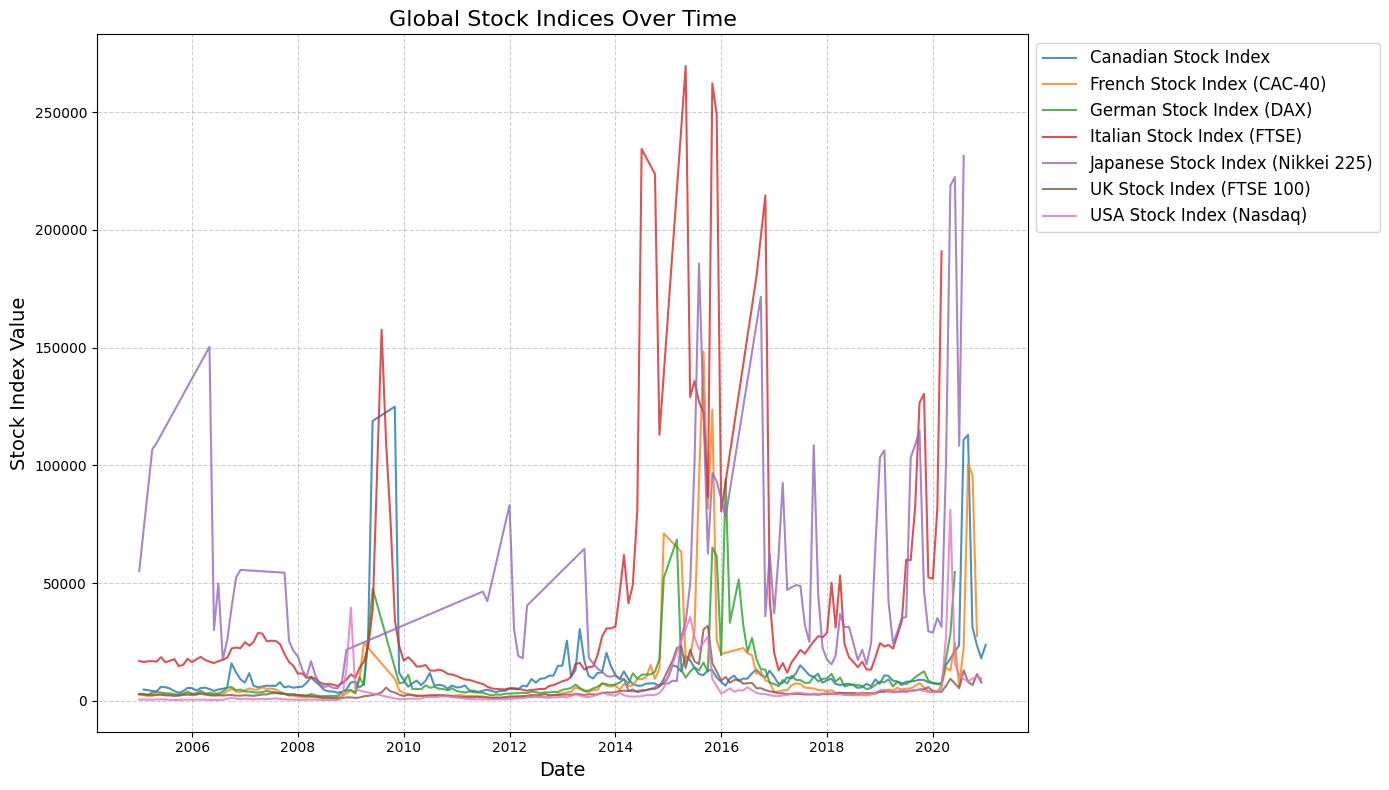

In [4]:

# Dropping rows with null values for each stock index dataset
canadian = canadian.dropna(subset=['Date', 'Close'])
french = french.dropna(subset=['Date', 'Close'])
german = german.dropna(subset=['Date', 'Close'])
italian = italian.dropna(subset=['Date', 'Close'])
japan = japan.dropna(subset=['Date', 'Close'])
uk = uk.dropna(subset=['Date', 'Close'])
usa = usa.dropna(subset=['Date', 'Close'])

# Ensure the 'Date' columns are parsed as datetime for plotting purposes
canadian['Date'] = pd.to_datetime(canadian['Date'])
french['Date'] = pd.to_datetime(french['Date'])
german['Date'] = pd.to_datetime(german['Date'])
italian['Date'] = pd.to_datetime(italian['Date'])
japan['Date'] = pd.to_datetime(japan['Date'])
uk['Date'] = pd.to_datetime(uk['Date'])
usa['Date'] = pd.to_datetime(usa['Date'])

# Plotting the stock indices over time
plt.figure(figsize=(14, 8))
plt.plot(canadian['Date'], canadian['Close'], label='Canadian Stock Index', alpha=0.8)
plt.plot(french['Date'], french['Close'], label='French Stock Index (CAC-40)', alpha=0.8)
plt.plot(german['Date'], german['Close'], label='German Stock Index (DAX)', alpha=0.8)
plt.plot(italian['Date'], italian['Close'], label='Italian Stock Index (FTSE)', alpha=0.8)
plt.plot(japan['Date'], japan['Close'], label='Japanese Stock Index (Nikkei 225)', alpha=0.8)
plt.plot(uk['Date'], uk['Close'], label='UK Stock Index (FTSE 100)', alpha=0.8)
plt.plot(usa['Date'], usa['Close'], label='USA Stock Index (Nasdaq)', alpha=0.8)

# Formatting the plot
plt.title('Global Stock Indices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Index Value', fontsize=14)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
for df in [canadian, french, german, italian, japan, uk, usa,IPI,CPI]:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    


## ADF 

Canada

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import numpy as np

# Load and parse the Canadian stock index and industrial production data
canadian = pd.read_excel('Stock Index/Canadian_snp_tsx.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
canadian.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Canadian stock index
canadian = canadian[['Close']].rename(columns={'Close': 'Canadian_Stock_Index'})

# Extract the Canada column for industrial production
industrial_production_canada = industrial_production[['Canada']].rename(columns={'Canada': 'Industrial_Production'})

# Calculate the log-levels of the data
canadian['Log_Canadian_Stock_Index'] = np.log(canadian['Canadian_Stock_Index'])
industrial_production_canada['Log_Industrial_Production'] = np.log(industrial_production_canada['Industrial_Production'])

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Canadian stock index (log-level)
canadian_monthly = resample_data(canadian[['Log_Canadian_Stock_Index']], freq='M')
canadian_quarterly = resample_data(canadian[['Log_Canadian_Stock_Index']], freq='Q')
canadian_yearly = resample_data(canadian[['Log_Canadian_Stock_Index']], freq='A')

# Resample industrial production (log-level)
industrial_monthly = resample_data(industrial_production_canada[['Log_Industrial_Production']], freq='M')
industrial_quarterly = resample_data(industrial_production_canada[['Log_Industrial_Production']], freq='Q')
industrial_yearly = resample_data(industrial_production_canada[['Log_Industrial_Production']], freq='A')

# Combine monthly data
monthly_data = pd.concat([industrial_monthly, canadian_monthly], axis=1)

# Combine quarterly data
quarterly_data = pd.concat([industrial_quarterly, canadian_quarterly], axis=1)

# Combine yearly data
yearly_data = pd.concat([industrial_yearly, canadian_yearly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()
quarterly_data = quarterly_data.dropna()
yearly_data = yearly_data.dropna()

# Perform ADF Test on the log levels
def perform_adf_test(series, series_name):
    print(f"\nPerforming Augmented Dickey-Fuller Test for {series_name}:")
    adf_result = ts.adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value}")
    if adf_result[1] < 0.10:
        print(f"The series {series_name} is stationary (reject null hypothesis).")
    else:
        print(f"The series {series_name} is not stationary (fail to reject null hypothesis).")

# ADF Test for Log Canadian Stock Index and Log Industrial Production
perform_adf_test(canadian['Log_Canadian_Stock_Index'], 'Log Canadian Stock Index')
perform_adf_test(industrial_production_canada['Log_Industrial_Production'], 'Log Industrial Production')

# Define dependent and independent variables for monthly data
y_monthly = monthly_data['Log_Industrial_Production']
X_monthly = monthly_data[['Log_Canadian_Stock_Index']]
X_monthly = sm.add_constant(X_monthly)  # Add constant for intercept



# Define dependent and independent variables for quarterly data
y_quarterly = quarterly_data['Log_Industrial_Production']
X_quarterly = quarterly_data[['Log_Canadian_Stock_Index']]
X_quarterly = sm.add_constant(X_quarterly)  # Add constant for intercept

# Run OLS regression for quarterly data


# Define dependent and independent variables for yearly data
y_yearly = yearly_data['Log_Industrial_Production']
X_yearly = yearly_data[['Log_Canadian_Stock_Index']]
X_yearly = sm.add_constant(X_yearly)  # Add constant for intercept




C:\Users\adity\AppData\Local\Temp\ipykernel_22584\1343307936.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])



Performing Augmented Dickey-Fuller Test for Log Canadian Stock Index:
ADF Statistic: -5.213474803935543
p-value: 8.25191473267619e-06
Critical Values:
   1%: -3.466398230774071
   5%: -2.8773796387256514
   10%: -2.575213838610586
The series Log Canadian Stock Index is stationary (reject null hypothesis).

Performing Augmented Dickey-Fuller Test for Log Industrial Production:
ADF Statistic: -1.7634253562252438
p-value: 0.3987651343233744
Critical Values:
   1%: -3.4648754262570978
   5%: -2.876714157488788
   10%: -2.574858699001736
The series Log Industrial Production is not stationary (fail to reject null hypothesis).

Monthly Regression Results for Canada:
                                OLS Regression Results                               
Dep. Variable:     Log_Industrial_Production   R-squared:                       0.014
Model:                                   OLS   Adj. R-squared:                  0.009
Method:                        Least Squares   F-statistic:              

In [7]:
# Compute the first differences (log differences)
canadian['Diff_Log_Canadian_Stock_Index'] = canadian['Log_Canadian_Stock_Index'].diff()
industrial_production_canada['Diff_Log_Industrial_Production'] = industrial_production_canada['Log_Industrial_Production'].diff()

# Drop missing values due to differencing
canadian = canadian.dropna()
industrial_production_canada = industrial_production_canada.dropna()

# Perform ADF Test on the differenced series
perform_adf_test(canadian['Diff_Log_Canadian_Stock_Index'], 'Differenced Log Canadian Stock Index')
perform_adf_test(industrial_production_canada['Diff_Log_Industrial_Production'], 'Differenced Log Industrial Production')




Performing Augmented Dickey-Fuller Test for Differenced Log Canadian Stock Index:
ADF Statistic: -9.07690205359602
p-value: 4.155610679335628e-15
Critical Values:
   1%: -3.467004502498507
   5%: -2.8776444997243558
   10%: -2.575355189707274
The series Differenced Log Canadian Stock Index is stationary (reject null hypothesis).

Performing Augmented Dickey-Fuller Test for Differenced Log Industrial Production:
ADF Statistic: -11.350799045332003
p-value: 1.0006645755130169e-20
Critical Values:
   1%: -3.4648754262570978
   5%: -2.876714157488788
   10%: -2.574858699001736
The series Differenced Log Industrial Production is stationary (reject null hypothesis).


USA

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import numpy as np

# Load and parse the US stock index and industrial production data
us_stock_index = pd.read_excel('Stock Index/USA Nasdaq.xlsx', parse_dates=['Date'])  # Adjust the file path
industrial_production_us = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path

# Ensure 'Date' is the index
us_stock_index.set_index('Date', inplace=True)
industrial_production_us.set_index('Date', inplace=True)

# Use the 'Close' column for the US stock index
us_stock_index = us_stock_index[['Close']].rename(columns={'Close': 'US_Stock_Index'})

# Extract the USA column for industrial production
industrial_production_us = industrial_production_us[['USA']].rename(columns={'USA': 'US_Industrial_Production'})

# Calculate the log-levels of the data
us_stock_index['Log_US_Stock_Index'] = np.log(us_stock_index['US_Stock_Index'])
industrial_production_us['Log_US_Industrial_Production'] = np.log(industrial_production_us['US_Industrial_Production'])

# Differencing the log data to make it stationary
us_stock_index['Diff_Log_US_Stock_Index'] = us_stock_index['Log_US_Stock_Index'].diff().dropna()
industrial_production_us['Diff_Log_US_Industrial_Production'] = industrial_production_us['Log_US_Industrial_Production'].diff().dropna()

# Perform ADF Test on the differenced log values
def perform_adf_test(series, series_name):
    print(f"\nPerforming Augmented Dickey-Fuller Test for differenced {series_name}:")
    adf_result = ts.adfuller(series.dropna(), autolag='AIC')
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value}")
    if adf_result[1] < 0.10:
        print(f"The differenced series {series_name} is stationary (reject null hypothesis).")
    else:
        print(f"The differenced series {series_name} is not stationary (fail to reject null hypothesis).")

# ADF Test for differenced US Stock Index and Industrial Production
perform_adf_test(us_stock_index['Diff_Log_US_Stock_Index'], 'US Stock Index')
perform_adf_test(industrial_production_us['Diff_Log_US_Industrial_Production'], 'US Industrial Production')

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample US stock index (log-level)
us_stock_index_monthly = resample_data(us_stock_index[['Log_US_Stock_Index']], freq='M')
us_stock_index_quarterly = resample_data(us_stock_index[['Log_US_Stock_Index']], freq='Q')
us_stock_index_yearly = resample_data(us_stock_index[['Log_US_Stock_Index']], freq='A')

# Resample industrial production (log-level)
industrial_production_us_monthly = resample_data(industrial_production_us[['Log_US_Industrial_Production']], freq='M')
industrial_production_us_quarterly = resample_data(industrial_production_us[['Log_US_Industrial_Production']], freq='Q')
industrial_production_us_yearly = resample_data(industrial_production_us[['Log_US_Industrial_Production']], freq='A')

# Combine monthly data
monthly_data = pd.concat([industrial_production_us_monthly, us_stock_index_monthly], axis=1)

# Combine quarterly data
quarterly_data = pd.concat([industrial_production_us_quarterly, us_stock_index_quarterly], axis=1)

# Combine yearly data
yearly_data = pd.concat([industrial_production_us_yearly, us_stock_index_yearly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()
quarterly_data = quarterly_data.dropna()
yearly_data = yearly_data.dropna()

# Define dependent and independent variables for monthly data
y_monthly = monthly_data['Log_US_Industrial_Production']
X_monthly = monthly_data[['Log_US_Stock_Index']]
X_monthly = sm.add_constant(X_monthly)  # Add constant for intercept



# Define dependent and independent variables for quarterly data
y_quarterly = quarterly_data['Log_US_Industrial_Production']
X_quarterly = quarterly_data[['Log_US_Stock_Index']]
X_quarterly = sm.add_constant(X_quarterly)  # Add constant for intercept



# Define dependent and independent variables for yearly data
y_yearly = yearly_data['Log_US_Industrial_Production']
X_yearly = yearly_data[['Log_US_Stock_Index']]
X_yearly = sm.add_constant(X_yearly)  # Add constant for intercept




Performing Augmented Dickey-Fuller Test for differenced US Stock Index:
ADF Statistic: -11.288165347123375
p-value: 1.401160214043319e-20
Critical Values:
   1%: -3.468952197801766
   5%: -2.878495056473015
   10%: -2.57580913601947
The differenced series US Stock Index is stationary (reject null hypothesis).

Performing Augmented Dickey-Fuller Test for differenced US Industrial Production:
ADF Statistic: -10.816370964837661
p-value: 1.852773619673187e-19
Critical Values:
   1%: -3.4652439354133255
   5%: -2.8768752281673717
   10%: -2.574944653739612
The differenced series US Industrial Production is stationary (reject null hypothesis).


C:\Users\adity\AppData\Local\Temp\ipykernel_22584\4190257621.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production_us = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path


France

In [9]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Load and parse the French stock index and industrial production data
french_stock_index = pd.read_excel('Stock Index/French_CAC-40.xlsx', parse_dates=['Date'])  # Adjust the file path
industrial_production_france = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path

# Ensure 'Date' is the index
french_stock_index.set_index('Date', inplace=True)
industrial_production_france.set_index('Date', inplace=True)

# Use the 'Close' column for the French stock index
french_stock_index = french_stock_index[['Close']].rename(columns={'Close': 'French_Stock_Index'})

# Extract the France column for industrial production
industrial_production_france = industrial_production_france[['France']].rename(columns={'France': 'French_Industrial_Production'})

# Calculate the log-levels of the data
french_stock_index['Log_French_Stock_Index'] = np.log(french_stock_index['French_Stock_Index'])
industrial_production_france['Log_French_Industrial_Production'] = np.log(industrial_production_france['French_Industrial_Production'])

# Resample the data for monthly frequency
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample French stock index (log-level)
french_stock_index_monthly = resample_data(french_stock_index[['Log_French_Stock_Index']], freq='M')

# Resample industrial production (log-level)
industrial_production_france_monthly = resample_data(industrial_production_france[['Log_French_Industrial_Production']], freq='M')

# Combine monthly data
monthly_data = pd.concat([industrial_production_france_monthly, french_stock_index_monthly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()

# Differencing the data
monthly_data['Diff_Log_French_Stock_Index'] = monthly_data['Log_French_Stock_Index'].diff()
monthly_data['Diff_Log_French_Industrial_Production'] = monthly_data['Log_French_Industrial_Production'].diff()

# Drop missing values after differencing
monthly_data_diff = monthly_data.dropna()

# Augmented Dickey-Fuller Test for differenced French stock index
adf_result_stock_index = adfuller(monthly_data_diff['Diff_Log_French_Stock_Index'])
print("\nPerforming Augmented Dickey-Fuller Test for differenced French Stock Index:")
print(f"ADF Statistic: {adf_result_stock_index[0]}")
print(f"p-value: {adf_result_stock_index[1]}")
print("Critical Values:")
for key, value in adf_result_stock_index[4].items():
    print(f"   {key}: {value}")
if adf_result_stock_index[1] < 0.05:
    print("The differenced series French Stock Index is stationary (reject null hypothesis).")
else:
    print("The differenced series French Stock Index is not stationary (fail to reject null hypothesis).")

# Augmented Dickey-Fuller Test for differenced French Industrial Production
adf_result_industrial_prod = adfuller(monthly_data_diff['Diff_Log_French_Industrial_Production'])
print("\nPerforming Augmented Dickey-Fuller Test for differenced French Industrial Production:")
print(f"ADF Statistic: {adf_result_industrial_prod[0]}")
print(f"p-value: {adf_result_industrial_prod[1]}")
print("Critical Values:")
for key, value in adf_result_industrial_prod[4].items():
    print(f"   {key}: {value}")
if adf_result_industrial_prod[1] < 0.05:
    print("The differenced series French Industrial Production is stationary (reject null hypothesis).")
else:
    print("The differenced series French Industrial Production is not stationary (fail to reject null hypothesis).")

# Define dependent and independent variables for monthly differenced data
y_monthly_diff = monthly_data_diff['Diff_Log_French_Industrial_Production']
X_monthly_diff = monthly_data_diff[['Diff_Log_French_Stock_Index']]
X_monthly_diff = sm.add_constant(X_monthly_diff)  # Add constant for intercept



# Run OLS regression for quarterly data (you can add quarterly data similarly if needed)
# Example: you can resample the data and repeat the process for quarterly or yearly as shown above



Performing Augmented Dickey-Fuller Test for differenced French Stock Index:
ADF Statistic: -11.492810776847932
p-value: 4.691442415482325e-21
Critical Values:
   1%: -3.4682803641749267
   5%: -2.8782017240816327
   10%: -2.5756525795918366
The differenced series French Stock Index is stationary (reject null hypothesis).

Performing Augmented Dickey-Fuller Test for differenced French Industrial Production:
ADF Statistic: -12.320492053793304
p-value: 6.768384122287175e-23
Critical Values:
   1%: -3.4682803641749267
   5%: -2.8782017240816327
   10%: -2.5756525795918366
The differenced series French Industrial Production is stationary (reject null hypothesis).

Monthly Regression Results for Differenced France:
                                      OLS Regression Results                                     
Dep. Variable:     Diff_Log_French_Industrial_Production   R-squared:                       0.011
Model:                                               OLS   Adj. R-squared:          

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\4226054611.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production_france = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path


Germany

In [10]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Load and parse the German stock index and industrial production data
german_stock_index = pd.read_excel('Stock Index/German DAX.xlsx', parse_dates=['Date'])  # Adjust the file path
industrial_production_germany = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path

# Ensure 'Date' is the index
german_stock_index.set_index('Date', inplace=True)
industrial_production_germany.set_index('Date', inplace=True)

# Use the 'Close' column for the German stock index
german_stock_index = german_stock_index[['Close']].rename(columns={'Close': 'German_Stock_Index'})

# Extract the Germany column for industrial production
industrial_production_germany = industrial_production_germany[['Germany']].rename(columns={'Germany': 'German_Industrial_Production'})

# Calculate the log-levels of the data
german_stock_index['Log_German_Stock_Index'] = np.log(german_stock_index['German_Stock_Index'])
industrial_production_germany['Log_German_Industrial_Production'] = np.log(industrial_production_germany['German_Industrial_Production'])

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample German stock index (log-level)
german_stock_index_monthly = resample_data(german_stock_index[['Log_German_Stock_Index']], freq='M')
german_stock_index_quarterly = resample_data(german_stock_index[['Log_German_Stock_Index']], freq='Q')
german_stock_index_yearly = resample_data(german_stock_index[['Log_German_Stock_Index']], freq='A')

# Resample industrial production (log-level)
industrial_production_germany_monthly = resample_data(industrial_production_germany[['Log_German_Industrial_Production']], freq='M')
industrial_production_germany_quarterly = resample_data(industrial_production_germany[['Log_German_Industrial_Production']], freq='Q')
industrial_production_germany_yearly = resample_data(industrial_production_germany[['Log_German_Industrial_Production']], freq='A')

# Combine monthly data
monthly_data = pd.concat([industrial_production_germany_monthly, german_stock_index_monthly], axis=1)

# Combine quarterly data
quarterly_data = pd.concat([industrial_production_germany_quarterly, german_stock_index_quarterly], axis=1)

# Combine yearly data
yearly_data = pd.concat([industrial_production_germany_yearly, german_stock_index_yearly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()
quarterly_data = quarterly_data.dropna()
yearly_data = yearly_data.dropna()

# Perform Augmented Dickey-Fuller (ADF) test for differenced data
def adf_test(series, name='Series'):
    result = adfuller(series)
    print(f"Performing Augmented Dickey-Fuller Test for {name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print(f"The differenced series {name} is stationary (reject null hypothesis).\n")
    else:
        print(f"The differenced series {name} is not stationary (fail to reject null hypothesis).\n")

# Differencing the data for stationarity
monthly_data_diff = monthly_data.diff().dropna()
quarterly_data_diff = quarterly_data.diff().dropna()
yearly_data_diff = yearly_data.diff().dropna()

# ADF test for differenced data
adf_test(monthly_data_diff['Log_German_Industrial_Production'], 'Differenced German Industrial Production (Monthly)')
adf_test(monthly_data_diff['Log_German_Stock_Index'], 'Differenced German Stock Index (Monthly)')

adf_test(quarterly_data_diff['Log_German_Industrial_Production'], 'Differenced German Industrial Production (Quarterly)')
adf_test(quarterly_data_diff['Log_German_Stock_Index'], 'Differenced German Stock Index (Quarterly)')

adf_test(yearly_data_diff['Log_German_Industrial_Production'], 'Differenced German Industrial Production (Yearly)')
adf_test(yearly_data_diff['Log_German_Stock_Index'], 'Differenced German Stock Index (Yearly)')

# Define dependent and independent variables for monthly data
y_monthly = monthly_data['Log_German_Industrial_Production']
X_monthly = monthly_data[['Log_German_Stock_Index']]
X_monthly = sm.add_constant(X_monthly)  # Add constant for intercept



# Define dependent and independent variables for quarterly data
y_quarterly = quarterly_data['Log_German_Industrial_Production']
X_quarterly = quarterly_data[['Log_German_Stock_Index']]
X_quarterly = sm.add_constant(X_quarterly)  # Add constant for intercept



# Define dependent and independent variables for yearly data
y_yearly = yearly_data['Log_German_Industrial_Production']
X_yearly = yearly_data[['Log_German_Stock_Index']]
X_yearly = sm.add_constant(X_yearly)  # Add constant for intercept



Performing Augmented Dickey-Fuller Test for Differenced German Industrial Production (Monthly):
ADF Statistic: -11.081773269535569
p-value: 4.293485345073923e-20
Critical Values:
   1%: -3.4682803641749267
   5%: -2.8782017240816327
   10%: -2.5756525795918366
The differenced series Differenced German Industrial Production (Monthly) is stationary (reject null hypothesis).

Performing Augmented Dickey-Fuller Test for Differenced German Stock Index (Monthly):
ADF Statistic: -17.6761303608289
p-value: 3.625972323004401e-30
Critical Values:
   1%: -3.4680615871598537
   5%: -2.8781061899535128
   10%: -2.5756015922004134
The differenced series Differenced German Stock Index (Monthly) is stationary (reject null hypothesis).

Performing Augmented Dickey-Fuller Test for Differenced German Industrial Production (Quarterly):
ADF Statistic: -2.34355922704402
p-value: 0.15830371252006076
Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665
The differen

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2041991762.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production_germany = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Japan

In [11]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller  # Import ADF test

# Load and parse the Japanese stock index and industrial production data
japan_stock_index = pd.read_excel('Stock Index/Nikkei 225 Historical Data.xlsx', parse_dates=['Date'])  # Adjust the file path
industrial_production_japan = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path

# Ensure 'Date' is the index
japan_stock_index.set_index('Date', inplace=True)
industrial_production_japan.set_index('Date', inplace=True)

# Use the 'Close' column for the Japanese stock index
japan_stock_index = japan_stock_index[['Close']].rename(columns={'Close': 'Japanese_Stock_Index'})

# Extract the Japan column for industrial production
industrial_production_japan = industrial_production_japan[['Japan']].rename(columns={'Japan': 'Japanese_Industrial_Production'})

# Calculate the log-levels of the data
japan_stock_index['Log_Japanese_Stock_Index'] = np.log(japan_stock_index['Japanese_Stock_Index'])
industrial_production_japan['Log_Japanese_Industrial_Production'] = np.log(industrial_production_japan['Japanese_Industrial_Production'])

# Resample the data for monthly frequency
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Japanese stock index (log-level)
japan_stock_index_monthly = resample_data(japan_stock_index[['Log_Japanese_Stock_Index']], freq='M')
# Resample industrial production (log-level)
industrial_production_japan_monthly = resample_data(industrial_production_japan[['Log_Japanese_Industrial_Production']], freq='M')

# Combine monthly data
monthly_data = pd.concat([industrial_production_japan_monthly, japan_stock_index_monthly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()

# Calculate log differences for monthly data
monthly_data['Log_Diff_Japanese_Stock_Index'] = monthly_data['Log_Japanese_Stock_Index'].diff()
monthly_data['Log_Diff_Japanese_Industrial_Production'] = monthly_data['Log_Japanese_Industrial_Production'].diff()

# Drop missing values after differencing
monthly_data = monthly_data.dropna()

# Perform ADF test for stationarity on the log-differenced data
def adf_test(data, column_name):
    result = adfuller(data[column_name].dropna())  # ADF test on the log-differenced data
    print(f'ADF Test for {column_name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    # Check stationarity
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")
    print('\n')

# ADF test on monthly data for log-differenced values
adf_test(monthly_data, 'Log_Diff_Japanese_Stock_Index')
adf_test(monthly_data, 'Log_Diff_Japanese_Industrial_Production')

# Define dependent and independent variables for monthly data (after differencing)
y_monthly = monthly_data['Log_Diff_Japanese_Industrial_Production']
X_monthly = monthly_data[['Log_Diff_Japanese_Stock_Index']]
X_monthly = sm.add_constant(X_monthly)  # Add constant for intercept




ADF Test for Log_Diff_Japanese_Stock_Index:
ADF Statistic: -11.240467129233062
p-value: 1.812446323132547e-20
Critical Values: {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}
The series is stationary.


ADF Test for Log_Diff_Japanese_Industrial_Production:
ADF Statistic: -7.086965567292661
p-value: 4.5122719269876515e-10
Critical Values: {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}
The series is stationary.


Monthly Regression Results for Japan:
                                       OLS Regression Results                                      
Dep. Variable:     Log_Diff_Japanese_Industrial_Production   R-squared:                       0.060
Model:                                                 OLS   Adj. R-squared:                  0.051
Method:                                      Least Squares   F-statistic:                     6.844
Date:                                     Thu, 19 Dec 2024   Prob (F-statistic):  

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\728456916.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production_japan = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path


UK

In [12]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller  # Import ADF test

# Load and parse the UK stock index and industrial production data
uk_stock_index = pd.read_excel('Stock Index/UK FTSE_100.xlsx', parse_dates=['Date'])  # Adjust the file path
industrial_production_uk = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path

# Ensure 'Date' is the index
uk_stock_index.set_index('Date', inplace=True)
industrial_production_uk.set_index('Date', inplace=True)

# Use the 'Close' column for the UK stock index
uk_stock_index = uk_stock_index[['Close']].rename(columns={'Close': 'UK_Stock_Index'})

# Extract the UK column for industrial production
industrial_production_uk = industrial_production_uk[['UK']].rename(columns={'UK': 'UK_Industrial_Production'})

# Calculate the log-levels of the data
uk_stock_index['Log_UK_Stock_Index'] = np.log(uk_stock_index['UK_Stock_Index'])
industrial_production_uk['Log_UK_Industrial_Production'] = np.log(industrial_production_uk['UK_Industrial_Production'])

# Resample the data for monthly frequency
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample UK stock index (log-level)
uk_stock_index_monthly = resample_data(uk_stock_index[['Log_UK_Stock_Index']], freq='M')
# Resample industrial production (log-level)
industrial_production_uk_monthly = resample_data(industrial_production_uk[['Log_UK_Industrial_Production']], freq='M')

# Combine monthly data
monthly_data = pd.concat([industrial_production_uk_monthly, uk_stock_index_monthly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()

# Calculate log differences for monthly data
monthly_data['Log_Diff_UK_Stock_Index'] = monthly_data['Log_UK_Stock_Index'].diff()
monthly_data['Log_Diff_UK_Industrial_Production'] = monthly_data['Log_UK_Industrial_Production'].diff()

# Drop missing values after differencing
monthly_data = monthly_data.dropna()

# Perform ADF test for stationarity on the log-differenced data
def adf_test(data, column_name):
    result = adfuller(data[column_name].dropna())  # ADF test on the log-differenced data
    print(f'ADF Test for {column_name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    # Check stationarity
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")
    print('\n')

# ADF test on monthly data for log-differenced values
adf_test(monthly_data, 'Log_Diff_UK_Stock_Index')
adf_test(monthly_data, 'Log_Diff_UK_Industrial_Production')

# Define dependent and independent variables for monthly data (after differencing)
y_monthly = monthly_data['Log_Diff_UK_Industrial_Production']
X_monthly = monthly_data[['Log_Diff_UK_Stock_Index']]
X_monthly = sm.add_constant(X_monthly)  # Add constant for intercept




ADF Test for Log_Diff_UK_Stock_Index:
ADF Statistic: -6.714480798598389
p-value: 3.6109688710471e-09
Critical Values: {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}
The series is stationary.


ADF Test for Log_Diff_UK_Industrial_Production:
ADF Statistic: -7.910401386948031
p-value: 3.96217930210933e-12
Critical Values: {'1%': -3.4662005731940853, '5%': -2.8772932777920364, '10%': -2.575167750182615}
The series is stationary.


Monthly Regression Results for UK:
                                    OLS Regression Results                                   
Dep. Variable:     Log_Diff_UK_Industrial_Production   R-squared:                       0.006
Model:                                           OLS   Adj. R-squared:                  0.001
Method:                                Least Squares   F-statistic:                     1.153
Date:                               Thu, 19 Dec 2024   Prob (F-statistic):              0.284
Time:                       

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\498269687.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production_uk = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path


Italy

In [13]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller  # Import ADF test

# Load and parse the Italy stock index and industrial production data
italy_stock_index = pd.read_excel('Stock Index/ITALIAN_FTSE.xlsx', parse_dates=['Date'])  # Adjust the file path
industrial_production_italy = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path

# Ensure 'Date' is the index
italy_stock_index.set_index('Date', inplace=True)
industrial_production_italy.set_index('Date', inplace=True)

# Use the 'Close' column for the Italy stock index
italy_stock_index = italy_stock_index[['Close']].rename(columns={'Close': 'Italy_Stock_Index'})

# Extract the Italy column for industrial production
industrial_production_italy = industrial_production_italy[['Italy']].rename(columns={'Italy': 'Italy_Industrial_Production'})

# Calculate the log-levels of the data
italy_stock_index['Log_Italy_Stock_Index'] = np.log(italy_stock_index['Italy_Stock_Index'])
industrial_production_italy['Log_Italy_Industrial_Production'] = np.log(industrial_production_italy['Italy_Industrial_Production'])

# Resample the data for monthly frequency
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Italy stock index (log-level)
italy_stock_index_monthly = resample_data(italy_stock_index[['Log_Italy_Stock_Index']], freq='M')

# Resample industrial production (log-level)
industrial_production_italy_monthly = resample_data(industrial_production_italy[['Log_Italy_Industrial_Production']], freq='M')

# Combine monthly data
monthly_data = pd.concat([industrial_production_italy_monthly, italy_stock_index_monthly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()

# Calculate log differences for monthly data
monthly_data['Log_Diff_Italy_Stock_Index'] = monthly_data['Log_Italy_Stock_Index'].diff()
monthly_data['Log_Diff_Italy_Industrial_Production'] = monthly_data['Log_Italy_Industrial_Production'].diff()

# Drop missing values after differencing
monthly_data = monthly_data.dropna()

# Perform ADF test for stationarity on the log-differenced data
def adf_test(data, column_name):
    result = adfuller(data[column_name].dropna())  # ADF test on the log-differenced data
    print(f'ADF Test for {column_name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    # Check stationarity
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")
    print('\n')

# ADF test on monthly data for log-differenced values
adf_test(monthly_data, 'Log_Diff_Italy_Stock_Index')
adf_test(monthly_data, 'Log_Diff_Italy_Industrial_Production')

# Define dependent and independent variables for monthly data (after differencing)
y_monthly = monthly_data['Log_Diff_Italy_Industrial_Production']
X_monthly = monthly_data[['Log_Diff_Italy_Stock_Index']]
X_monthly = sm.add_constant(X_monthly)  # Add constant for intercept




ADF Test for Log_Diff_Italy_Stock_Index:
ADF Statistic: -11.969810934923128
p-value: 3.9223787817278283e-22
Critical Values: {'1%': -3.470616369591229, '5%': -2.8792214018977655, '10%': -2.57619681359045}
The series is stationary.


ADF Test for Log_Diff_Italy_Industrial_Production:
ADF Statistic: -3.2495117880321986
p-value: 0.017291762091788867
Critical Values: {'1%': -3.471118535474365, '5%': -2.8794405060097024, '10%': -2.576313761526591}
The series is stationary.


Monthly Regression Results for Italy:
                                     OLS Regression Results                                     
Dep. Variable:     Log_Diff_Italy_Industrial_Production   R-squared:                       0.040
Model:                                              OLS   Adj. R-squared:                  0.034
Method:                                   Least Squares   F-statistic:                     6.879
Date:                                  Thu, 19 Dec 2024   Prob (F-statistic):            0.00954
Ti

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\62184596.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production_italy = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])  # Adjust the file path


ECM Model 
## Canada 🇨🇦

In [14]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and parse the Canadian stock index and industrial production data
canadian = pd.read_excel('Stock Index/Canadian_snp_tsx.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
canadian.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Canadian stock index
canadian = canadian[['Close']].rename(columns={'Close': 'Canadian_Stock_Index'})

# Extract the Canada column for industrial production
industrial_production_canada = industrial_production[['Canada']].rename(columns={'Canada': 'Industrial_Production'})

# Calculate the Industrial Production Log Change (log of ratio)
industrial_production_canada['Industrial_Production_Log_Change'] = np.log(industrial_production_canada['Industrial_Production'] / industrial_production_canada['Industrial_Production'].shift(1))

# Calculate the Stock Log Return (log of ratio)
canadian['Stock_Log_Return'] = np.log(canadian['Canadian_Stock_Index'] / canadian['Canadian_Stock_Index'].shift(1))

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Canadian stock index (Log Return)
canadian_monthly = resample_data(canadian[['Stock_Log_Return']], freq='M')
canadian_quarterly = resample_data(canadian[['Stock_Log_Return']], freq='Q')
canadian_yearly = resample_data(canadian[['Stock_Log_Return']], freq='A')

# Resample industrial production log change (Industrial Production Log Change)
industrial_monthly = resample_data(industrial_production_canada[['Industrial_Production_Log_Change']], freq='M')
industrial_quarterly = resample_data(industrial_production_canada[['Industrial_Production_Log_Change']], freq='Q')
industrial_yearly = resample_data(industrial_production_canada[['Industrial_Production_Log_Change']], freq='A')

# Combine monthly data
monthly_data = pd.concat([industrial_monthly, canadian_monthly], axis=1)

# Combine quarterly data
quarterly_data = pd.concat([industrial_quarterly, canadian_quarterly], axis=1)

# Combine yearly data
yearly_data = pd.concat([industrial_yearly, canadian_yearly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()
quarterly_data = quarterly_data.dropna()
yearly_data = yearly_data.dropna()

# Function to test different lag configurations and choose the one with the highest R-squared
def test_lags(data, dependent_var, independent_var_prefix, max_lags):
    best_r_squared = -np.inf
    best_lag = 0
    best_model = None
    
    for lag in range(1, max_lags + 1):
        # Add lags for the stock log return
        data_lagged = data.copy()
        for l in range(1, lag + 1):
            data_lagged[f'{independent_var_prefix}_lag_{l}'] = data[independent_var_prefix].shift(l)

        # Drop rows with NaN after adding lags
        data_lagged = data_lagged.dropna()

        # Define dependent and independent variables
        y = data_lagged[dependent_var]
        X = data_lagged[[f'{independent_var_prefix}_lag_{l}' for l in range(1, lag + 1)]]
        X = sm.add_constant(X)  # Add constant for intercept

        # Run OLS regression
        model = sm.OLS(y, X).fit()
        r_squared = model.rsquared

        # Check if this model has the highest R-squared
        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_lag = lag
            best_model = model

    return best_lag, best_r_squared, best_model

# Test different lags for monthly data (maximum 24 lags)
best_lag_monthly, best_r_squared_monthly, best_model_monthly = test_lags(
    monthly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=24
)

# Test different lags for quarterly data (maximum 8 lags)
best_lag_quarterly, best_r_squared_quarterly, best_model_quarterly = test_lags(
    quarterly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=8
)

# Test different lags for yearly data (maximum 2 lags)
best_lag_yearly, best_r_squared_yearly, best_model_yearly = test_lags(
    yearly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=2
)

# Print the best results for monthly, quarterly, and yearly data
print(f"\nBest Lag for Monthly Data: {best_lag_monthly} with R-squared: {best_r_squared_monthly}")
print(best_model_monthly.summary())

print(f"\nBest Lag for Quarterly Data: {best_lag_quarterly} with R-squared: {best_r_squared_quarterly}")
print(best_model_quarterly.summary())

print(f"\nBest Lag for Yearly Data: {best_lag_yearly} with R-squared: {best_r_squared_yearly}")
print(best_model_yearly.summary())


C:\Users\adity\AppData\Local\Temp\ipykernel_23160\3635006476.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])



Best Lag for Monthly Data: 24 with R-squared: 0.12486887682526038
                                   OLS Regression Results                                   
Dep. Variable:     Industrial_Production_Log_Change   R-squared:                       0.125
Model:                                          OLS   Adj. R-squared:                 -0.030
Method:                               Least Squares   F-statistic:                    0.8086
Date:                              Thu, 19 Dec 2024   Prob (F-statistic):              0.721
Time:                                      12:59:38   Log-Likelihood:                 482.95
No. Observations:                               161   AIC:                            -915.9
Df Residuals:                                   136   BIC:                            -838.9
Df Model:                                        24                                         
Covariance Type:                          nonrobust                                         
   

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## USing arima model and grid search 

C:\Users\adity\AppData\Local\Temp\ipykernel_22584\4025702740.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')
C:\Users\adity\AppData\Local\Temp\ipykernel_22584\4025702740.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['Canada'] / industrial_production_canada['Canada'].shift(1))
C:\Users\adity\AppData\Local\Temp\

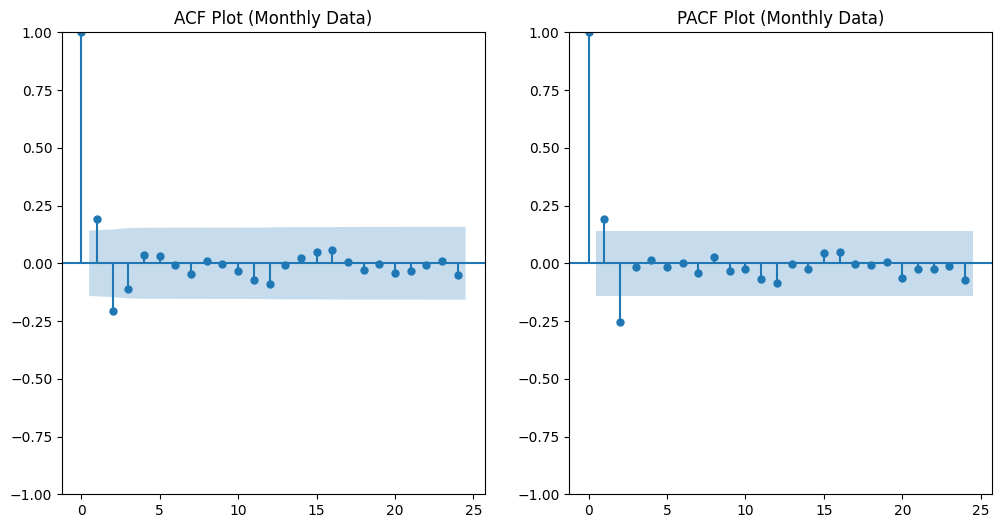

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was 

Best ARIMA model order for Monthly data: (2, 0, 0)
Best AIC for Monthly data: -1019.2442424566116
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                  192
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 513.622
Date:                Thu, 19 Dec 2024   AIC                          -1019.244
Time:                        22:40:05   BIC                          -1006.214
Sample:                    02-28-2005   HQIC                         -1013.967
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.002      0.113      0.910      -0.003       0.004
ar.L1          0.2387      0.042 

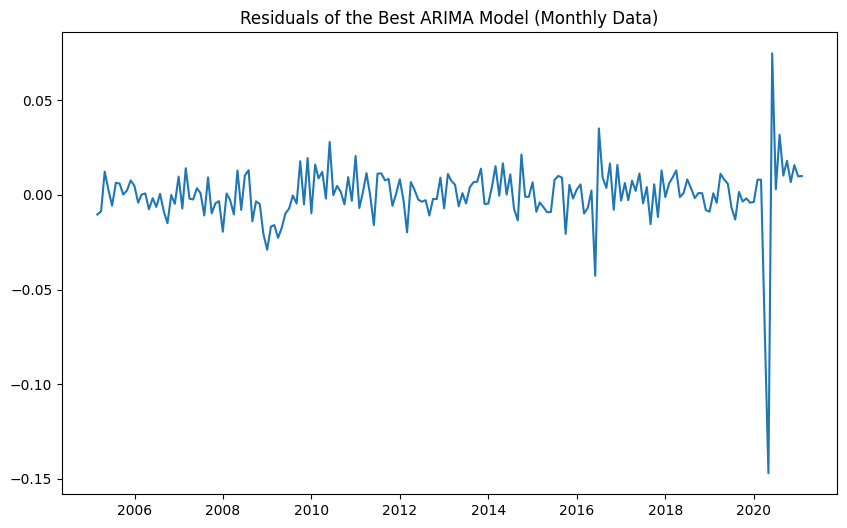

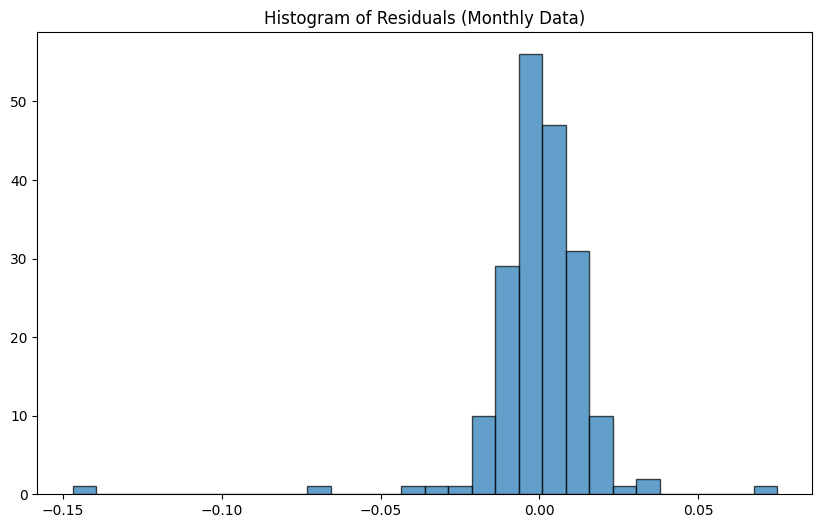

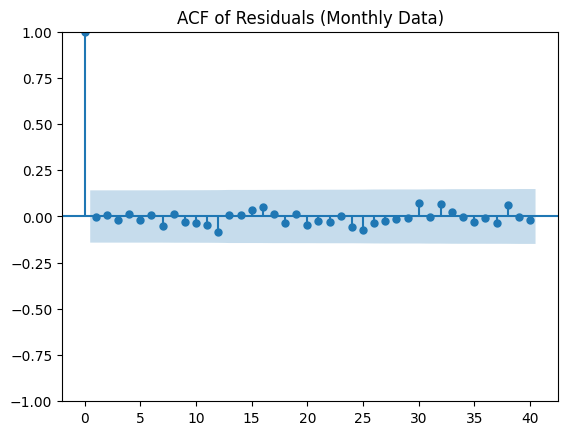

Forecast for next 12 periods for Monthly data:
2021-02-28   -0.000527
2021-03-31   -0.002207
2021-04-30   -0.000191
2021-05-31    0.000714
2021-06-30    0.000422
2021-07-31    0.000123
2021-08-31    0.000126
2021-09-30    0.000202
2021-10-31    0.000219
2021-11-30    0.000204
2021-12-31    0.000196
2022-01-31    0.000198
Freq: M, Name: predicted_mean, dtype: float64


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset (replace with your actual dataset loading process)
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx')

# Extract only 'Date' and 'Canada' columns
industrial_production_canada = industrial_production[['Date', 'Canada']]

# Ensure 'Date' is in datetime format, parse the 'Date' column with the 'MMM YYYY' format
industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')

# Set 'Date' as the index
industrial_production_canada.set_index('Date', inplace=True)

# Calculate the log returns (percentage change in the log of industrial production)
industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['Canada'] / industrial_production_canada['Canada'].shift(1))

# Drop the first row because it will have NaN due to the shift
industrial_production_canada.dropna(inplace=True)

# Resampling to monthly, quarterly, and yearly data
monthly_data = industrial_production_canada['Log_Return'].resample('M').mean()
quarterly_data = industrial_production_canada['Log_Return'].resample('Q').mean()
yearly_data = industrial_production_canada['Log_Return'].resample('A').mean()

# Function to plot ACF and PACF, fit ARIMA model, and select best model
def fit_arima_model(data, frequency_label, lags):
    # Plot ACF and PACF with specified lags
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title(f'ACF Plot ({frequency_label} Data)')

    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title(f'PACF Plot ({frequency_label} Data)')

    plt.show()

    # Initialize variables to store the best model and its AIC
    best_aic = float('inf')
    best_order = None
    best_model = None

    # Define ranges for p, d, q (adjust based on ACF/PACF plots and data)
    p_values = range(0, 4)  # AR order: 0 to 3
    d_values = range(0, 2)  # Differencing order: 0 or 1
    q_values = range(0, 4)  # MA order: 0 to 3

    # Loop over all combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the ARIMA model with the current combination of (p, d, q)
                    model = ARIMA(data, order=(p, d, q))
                    result = model.fit()

                    # Compare the AIC values
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_order = (p, d, q)
                        best_model = result
                except Exception as e:
                    # If fitting fails, skip this combination
                    continue

    # Output the best model and its AIC
    print(f"Best ARIMA model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())

    # Residual analysis to check if the model is well-fitted
    residuals = best_model.resid

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals of the Best ARIMA Model ({frequency_label} Data)')
    plt.show()

    # Plot histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of Residuals ({frequency_label} Data)')
    plt.show()

    # Dynamically adjust lags for residuals plot based on the length of the data
    max_lags = min(len(residuals) - 1, 40)  # Maximum lags is either 40 or the length of residuals minus 1

    # Check for autocorrelation in residuals
    plot_acf(residuals, lags=max_lags)
    plt.title(f'ACF of Residuals ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods (you can change the number of periods based on your requirements)
    forecast_steps = 12  # Number of periods to forecast
    forecast = best_model.forecast(steps=forecast_steps)

    # Output forecasted values
    print(f"Forecast for next {forecast_steps} periods for {frequency_label} data:")
    print(forecast)

# Fit ARIMA model for monthly data with 24 lags (changed from 40)
fit_arima_model(monthly_data, 'Monthly', lags=24)




## ECM Model

## United States 🇺🇸

In [16]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and parse the USA stock index and industrial production data
usa = pd.read_excel('Stock Index/USA Nasdaq.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
usa.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the USA stock index
usa = usa[['Close']].rename(columns={'Close': 'USA_Stock_Index'})

# Extract the Canada column for industrial production (same as the original code)
industrial_production_usa = industrial_production[['Canada']].rename(columns={'Canada': 'Industrial_Production'})

# Calculate the Industrial Production Log Change (log of ratio)
industrial_production_usa['Industrial_Production_Log_Change'] = np.log(industrial_production_usa['Industrial_Production'] / industrial_production_usa['Industrial_Production'].shift(1))

# Calculate the Stock Log Return (log of ratio)
usa['Stock_Log_Return'] = np.log(usa['USA_Stock_Index'] / usa['USA_Stock_Index'].shift(1))

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample USA stock index (Log Return)
usa_monthly = resample_data(usa[['Stock_Log_Return']], freq='M')
usa_quarterly = resample_data(usa[['Stock_Log_Return']], freq='Q')
usa_yearly = resample_data(usa[['Stock_Log_Return']], freq='A')

# Resample industrial production log change (Industrial Production Log Change)
industrial_monthly = resample_data(industrial_production_usa[['Industrial_Production_Log_Change']], freq='M')
industrial_quarterly = resample_data(industrial_production_usa[['Industrial_Production_Log_Change']], freq='Q')
industrial_yearly = resample_data(industrial_production_usa[['Industrial_Production_Log_Change']], freq='A')

# Combine monthly data
monthly_data = pd.concat([industrial_monthly, usa_monthly], axis=1)

# Combine quarterly data
quarterly_data = pd.concat([industrial_quarterly, usa_quarterly], axis=1)

# Combine yearly data
yearly_data = pd.concat([industrial_yearly, usa_yearly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()
quarterly_data = quarterly_data.dropna()
yearly_data = yearly_data.dropna()

# Function to test different lag configurations and choose the one with the highest R-squared
def test_lags(data, dependent_var, independent_var_prefix, max_lags):
    best_r_squared = -np.inf
    best_lag = 0
    best_model = None
    
    for lag in range(1, max_lags + 1):
        # Add lags for the stock log return
        data_lagged = data.copy()
        for l in range(1, lag + 1):
            data_lagged[f'{independent_var_prefix}_lag_{l}'] = data[independent_var_prefix].shift(l)

        # Drop rows with NaN after adding lags
        data_lagged = data_lagged.dropna()

        # Define dependent and independent variables
        y = data_lagged[dependent_var]
        X = data_lagged[[f'{independent_var_prefix}_lag_{l}' for l in range(1, lag + 1)]]
        X = sm.add_constant(X)  # Add constant for intercept

        # Run OLS regression
        model = sm.OLS(y, X).fit()
        r_squared = model.rsquared

        # Check if this model has the highest R-squared
        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_lag = lag
            best_model = model

    return best_lag, best_r_squared, best_model

# Test different lags for monthly data (maximum 24 lags)
best_lag_monthly, best_r_squared_monthly, best_model_monthly = test_lags(
    monthly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=24
)

# Test different lags for quarterly data (maximum 8 lags)
best_lag_quarterly, best_r_squared_quarterly, best_model_quarterly = test_lags(
    quarterly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=8
)

# Test different lags for yearly data (maximum 2 lags)
best_lag_yearly, best_r_squared_yearly, best_model_yearly = test_lags(
    yearly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=2
)

# Print the best results for monthly, quarterly, and yearly data
print(f"\nBest Lag for Monthly Data: {best_lag_monthly} with R-squared: {best_r_squared_monthly}")
print(best_model_monthly.summary())

print(f"\nBest Lag for Quarterly Data: {best_lag_quarterly} with R-squared: {best_r_squared_quarterly}")
print(best_model_quarterly.summary())

print(f"\nBest Lag for Yearly Data: {best_lag_yearly} with R-squared: {best_r_squared_yearly}")
print(best_model_yearly.summary())


C:\Users\adity\AppData\Local\Temp\ipykernel_23160\367113180.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])



Best Lag for Monthly Data: 24 with R-squared: 0.2639853853370372
                                   OLS Regression Results                                   
Dep. Variable:     Industrial_Production_Log_Change   R-squared:                       0.264
Model:                                          OLS   Adj. R-squared:                  0.122
Method:                               Least Squares   F-statistic:                     1.853
Date:                              Thu, 19 Dec 2024   Prob (F-statistic):             0.0157
Time:                                      13:00:05   Log-Likelihood:                 399.79
No. Observations:                               149   AIC:                            -749.6
Df Residuals:                                   124   BIC:                            -674.5
Df Model:                                        24                                         
Covariance Type:                          nonrobust                                         
    

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## ARIMA For USA

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\4197854411.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')
C:\Users\adity\AppData\Local\Temp\ipykernel_23160\4197854411.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['USA'] / industrial_production_canada['USA'].shift(1))
C:\Users\adity\AppData\Local\Temp\ipyker

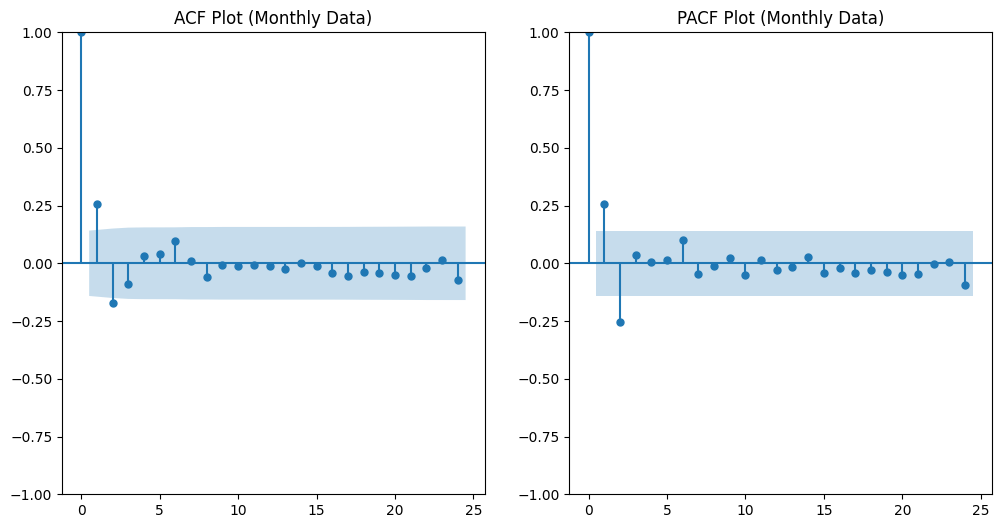

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\li

Best ARIMA model order for Monthly data: (2, 0, 0)
Best AIC for Monthly data: -1116.1052939945384
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                  192
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 562.053
Date:                Thu, 19 Dec 2024   AIC                          -1116.105
Time:                        13:00:15   BIC                          -1103.075
Sample:                    02-28-2005   HQIC                         -1110.828
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.002      0.075      0.940      -0.003       0.004
ar.L1          0.3212      0.025 

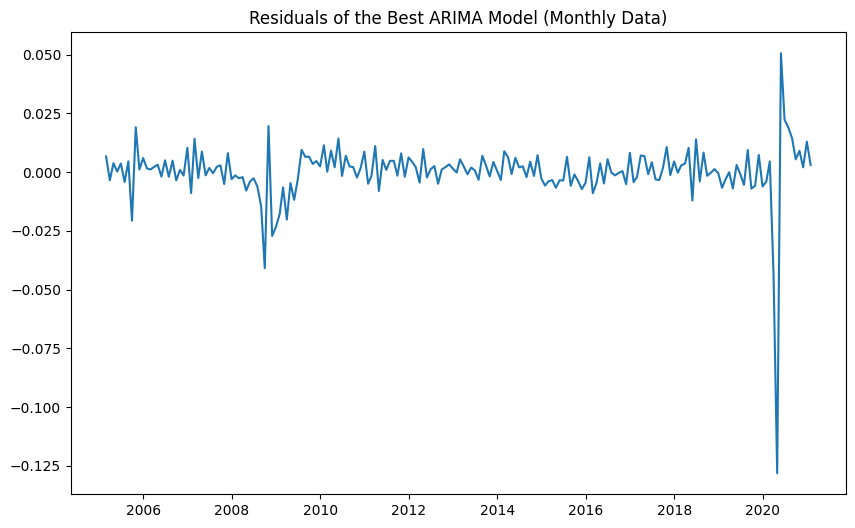

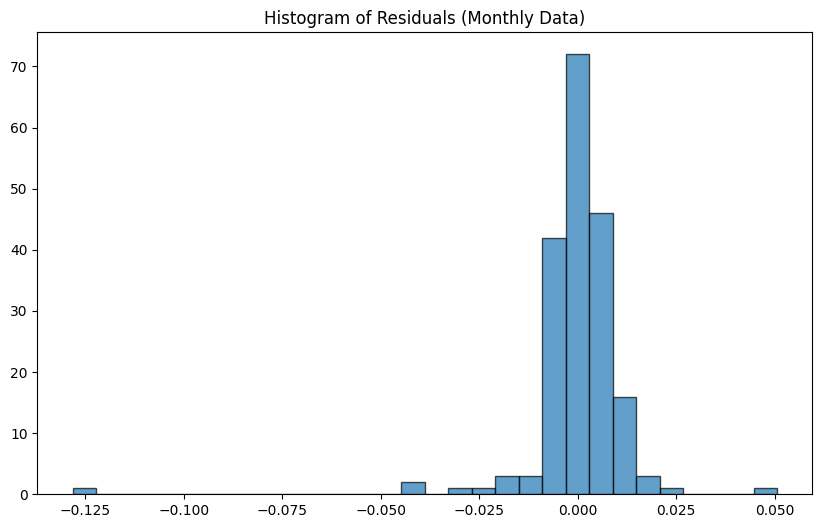

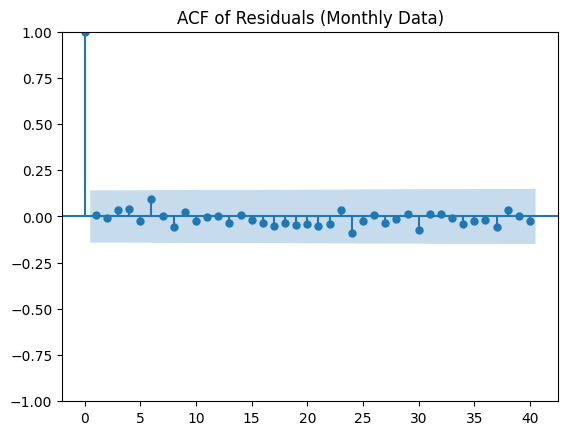

Forecast for next 12 periods for Monthly data:
2021-02-28   -0.001170
2021-03-31   -0.001837
2021-04-30   -0.000169
2021-05-31    0.000538
2021-06-30    0.000338
2021-07-31    0.000093
2021-08-31    0.000065
2021-09-30    0.000119
2021-10-31    0.000143
2021-11-30    0.000137
2021-12-31    0.000129
2022-01-31    0.000128
Freq: M, Name: predicted_mean, dtype: float64


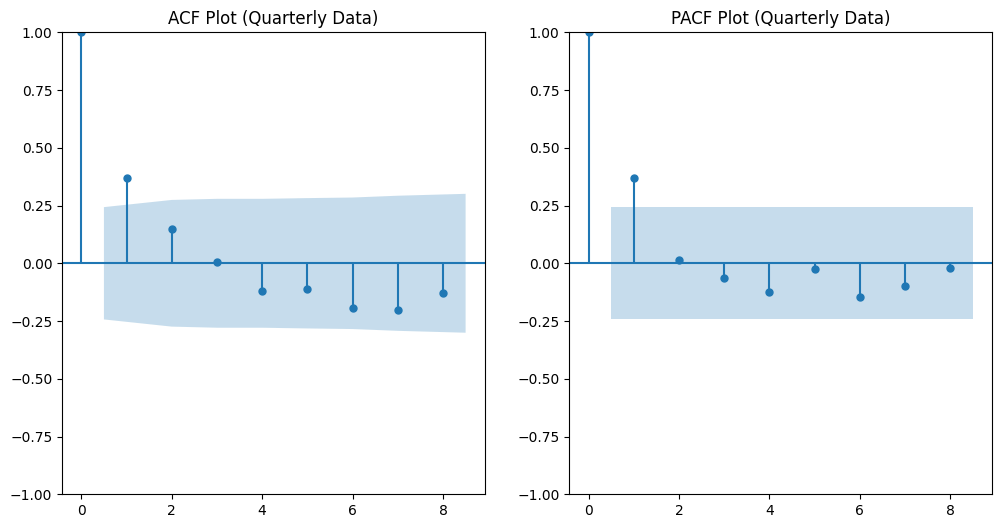

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\st

Best ARIMA model order for Quarterly data: (1, 0, 0)
Best AIC for Quarterly data: -477.6080538754985
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   65
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 241.804
Date:                Thu, 19 Dec 2024   AIC                           -477.608
Time:                        13:00:22   BIC                           -471.085
Sample:                    03-31-2005   HQIC                          -475.034
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.002      0.146      0.884      -0.004       0.004
ar.L1          0.3691      0.1

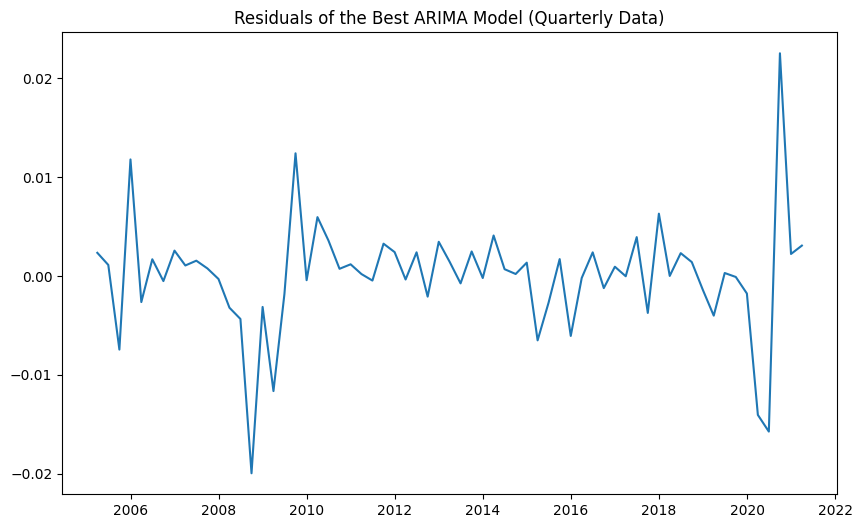

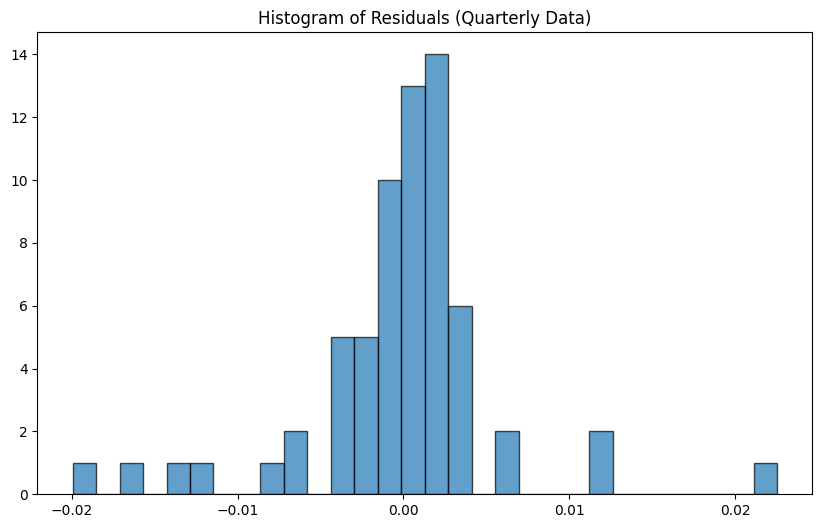

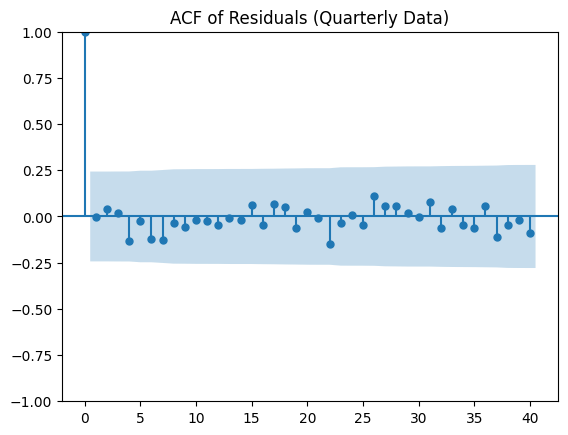

Forecast for next 12 periods for Quarterly data:
2021-06-30    0.002464
2021-09-30    0.001090
2021-12-31    0.000582
2022-03-31    0.000395
2022-06-30    0.000326
2022-09-30    0.000301
2022-12-31    0.000291
2023-03-31    0.000288
2023-06-30    0.000286
2023-09-30    0.000286
2023-12-31    0.000286
2024-03-31    0.000286
Freq: Q-DEC, Name: predicted_mean, dtype: float64


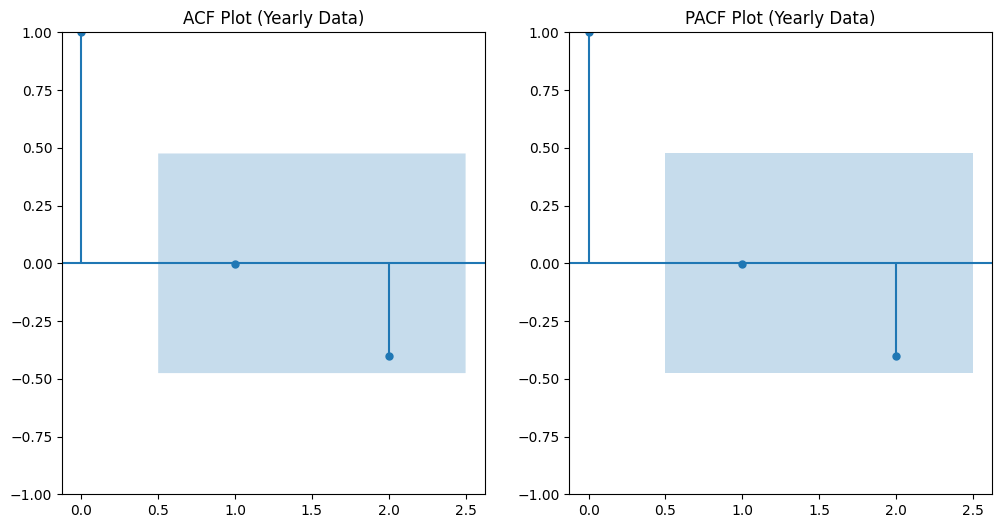

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs

Best ARIMA model order for Yearly data: (0, 0, 2)
Best AIC for Yearly data: -141.54762446491202
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   17
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  74.774
Date:                Thu, 19 Dec 2024   AIC                           -141.548
Time:                        13:00:28   BIC                           -138.215
Sample:                    12-31-2005   HQIC                          -141.216
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.484      0.138      -0.000       0.001
ma.L1         -0.0004     25.637  -

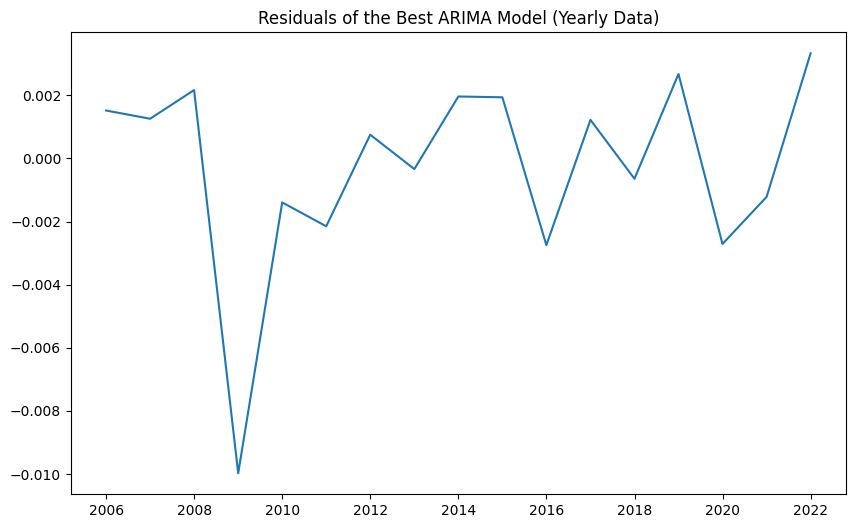

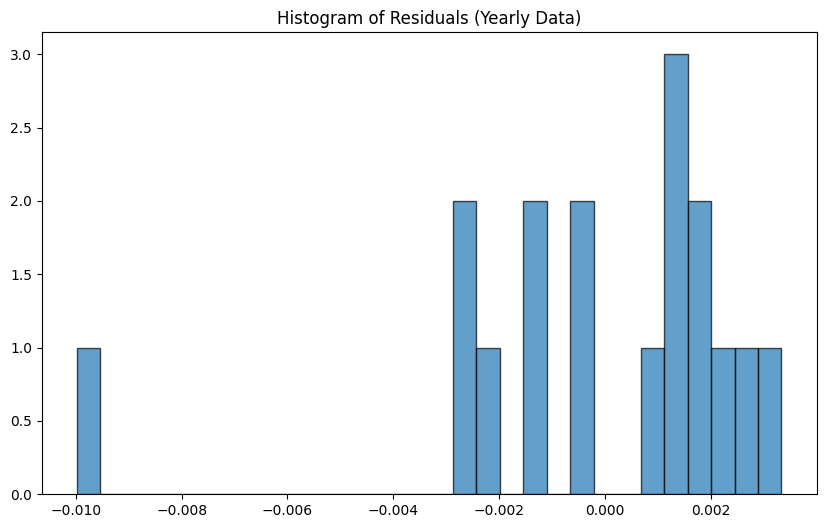

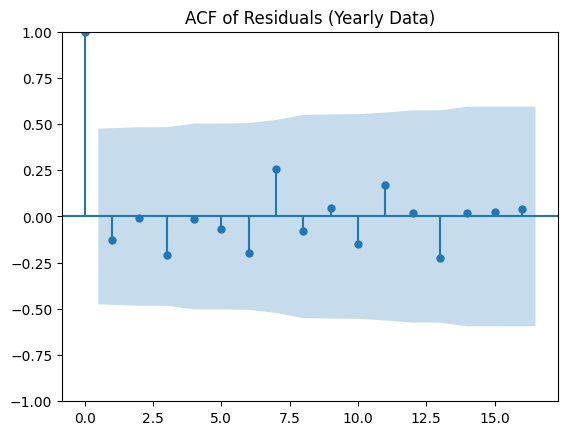

Forecast for next 12 periods for Yearly data:
2022-12-31    0.001527
2023-12-31   -0.002555
2024-12-31    0.000446
2025-12-31    0.000446
2026-12-31    0.000446
2027-12-31    0.000446
2028-12-31    0.000446
2029-12-31    0.000446
2030-12-31    0.000446
2031-12-31    0.000446
2032-12-31    0.000446
2033-12-31    0.000446
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset (replace with your actual dataset loading process)
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx')

# Extract only 'Date' and 'Canada' columns
industrial_production_canada = industrial_production[['Date', 'USA']]

# Ensure 'Date' is in datetime format, parse the 'Date' column with the 'MMM YYYY' format
industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')

# Set 'Date' as the index
industrial_production_canada.set_index('Date', inplace=True)

# Calculate the log returns (percentage change in the log of industrial production)
industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['USA'] / industrial_production_canada['USA'].shift(1))

# Drop the first row because it will have NaN due to the shift
industrial_production_canada.dropna(inplace=True)

# Resampling to monthly, quarterly, and yearly data
monthly_data = industrial_production_canada['Log_Return'].resample('M').mean()
quarterly_data = industrial_production_canada['Log_Return'].resample('Q').mean()
yearly_data = industrial_production_canada['Log_Return'].resample('A').mean()

# Function to plot ACF and PACF, fit ARIMA model, and select best model
def fit_arima_model(data, frequency_label, lags):
    # Plot ACF and PACF with specified lags
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title(f'ACF Plot ({frequency_label} Data)')

    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title(f'PACF Plot ({frequency_label} Data)')

    plt.show()

    # Initialize variables to store the best model and its AIC
    best_aic = float('inf')
    best_order = None
    best_model = None

    # Define ranges for p, d, q (adjust based on ACF/PACF plots and data)
    p_values = range(0, 4)  # AR order: 0 to 3
    d_values = range(0, 2)  # Differencing order: 0 or 1
    q_values = range(0, 4)  # MA order: 0 to 3

    # Loop over all combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the ARIMA model with the current combination of (p, d, q)
                    model = ARIMA(data, order=(p, d, q))
                    result = model.fit()

                    # Compare the AIC values
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_order = (p, d, q)
                        best_model = result
                except Exception as e:
                    # If fitting fails, skip this combination
                    continue

    # Output the best model and its AIC
    print(f"Best ARIMA model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())

    # Residual analysis to check if the model is well-fitted
    residuals = best_model.resid

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals of the Best ARIMA Model ({frequency_label} Data)')
    plt.show()

    # Plot histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of Residuals ({frequency_label} Data)')
    plt.show()

    # Dynamically adjust lags for residuals plot based on the length of the data
    max_lags = min(len(residuals) - 1, 40)  # Maximum lags is either 40 or the length of residuals minus 1

    # Check for autocorrelation in residuals
    plot_acf(residuals, lags=max_lags)
    plt.title(f'ACF of Residuals ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods (you can change the number of periods based on your requirements)
    forecast_steps = 12  # Number of periods to forecast
    forecast = best_model.forecast(steps=forecast_steps)

    # Output forecasted values
    print(f"Forecast for next {forecast_steps} periods for {frequency_label} data:")
    print(forecast)

# Fit ARIMA model for monthly data with 24 lags (changed from 40)
fit_arima_model(monthly_data, 'Monthly', lags=24)




## ECM Model

## Japan 🇯🇵 

In [18]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and parse the Japanese stock index and industrial production data
japan = pd.read_excel('Stock Index/Nikkei 225 Historical Data.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
japan.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Japanese stock index
japan = japan[['Close']].rename(columns={'Close': 'Japanese_Stock_Index'})

# Extract the Japan column for industrial production
industrial_production_japan = industrial_production[['Japan']].rename(columns={'Japan': 'Industrial_Production'})

# Calculate the Industrial Production Log Change (log of ratio)
industrial_production_japan['Industrial_Production_Log_Change'] = np.log(industrial_production_japan['Industrial_Production'] / industrial_production_japan['Industrial_Production'].shift(1))

# Calculate the Stock Log Return (log of ratio)
japan['Stock_Log_Return'] = np.log(japan['Japanese_Stock_Index'] / japan['Japanese_Stock_Index'].shift(1))

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Japanese stock index (Log Return)
japan_monthly = resample_data(japan[['Stock_Log_Return']], freq='M')
japan_quarterly = resample_data(japan[['Stock_Log_Return']], freq='Q')
japan_yearly = resample_data(japan[['Stock_Log_Return']], freq='A')

# Resample industrial production log change (Industrial Production Log Change)
industrial_monthly = resample_data(industrial_production_japan[['Industrial_Production_Log_Change']], freq='M')
industrial_quarterly = resample_data(industrial_production_japan[['Industrial_Production_Log_Change']], freq='Q')
industrial_yearly = resample_data(industrial_production_japan[['Industrial_Production_Log_Change']], freq='A')

# Combine monthly data
monthly_data = pd.concat([industrial_monthly, japan_monthly], axis=1)

# Combine quarterly data
quarterly_data = pd.concat([industrial_quarterly, japan_quarterly], axis=1)

# Combine yearly data
yearly_data = pd.concat([industrial_yearly, japan_yearly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()
quarterly_data = quarterly_data.dropna()
yearly_data = yearly_data.dropna()

# Function to test different lag configurations with a specified number of lags
def test_lags(data, dependent_var, independent_var_prefix, max_lags):
    best_r_squared = -np.inf
    best_lag = 0
    best_model = None
    
    # Using the exact specified lags, no need to loop over all lags
    # Prepare data with fixed number of lags
    data_lagged = data.copy()
    for l in range(1, max_lags + 1):
        data_lagged[f'{independent_var_prefix}_lag_{l}'] = data[independent_var_prefix].shift(l)

    # Drop rows with NaN after adding lags
    data_lagged = data_lagged.dropna()

    # Define dependent and independent variables
    y = data_lagged[dependent_var]
    X = data_lagged[[f'{independent_var_prefix}_lag_{l}' for l in range(1, max_lags + 1)]]
    X = sm.add_constant(X)  # Add constant for intercept

    # Run OLS regression
    model = sm.OLS(y, X).fit()
    r_squared = model.rsquared

    return max_lags, r_squared, model

# Test with fixed lags for monthly data (24 lags)
best_lag_monthly, best_r_squared_monthly, best_model_monthly = test_lags(
    monthly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=24
)

# Test with fixed lags for quarterly data (8 lags)
best_lag_quarterly, best_r_squared_quarterly, best_model_quarterly = test_lags(
    quarterly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=8
)

# Test with fixed lags for yearly data (2 lags)
best_lag_yearly, best_r_squared_yearly, best_model_yearly = test_lags(
    yearly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=2
)

# Print the best results for monthly, quarterly, and yearly data
print(f"\nBest Lag for Monthly Data: {best_lag_monthly} with R-squared: {best_r_squared_monthly}")
print(best_model_monthly.summary())

print(f"\nBest Lag for Quarterly Data: {best_lag_quarterly} with R-squared: {best_r_squared_quarterly}")
print(best_model_quarterly.summary())

print(f"\nBest Lag for Yearly Data: {best_lag_yearly} with R-squared: {best_r_squared_yearly}")
print(best_model_yearly.summary())



Best Lag for Monthly Data: 24 with R-squared: 0.2619253453320761
                                   OLS Regression Results                                   
Dep. Variable:     Industrial_Production_Log_Change   R-squared:                       0.262
Model:                                          OLS   Adj. R-squared:                 -0.079
Method:                               Least Squares   F-statistic:                    0.7689
Date:                              Thu, 19 Dec 2024   Prob (F-statistic):              0.756
Time:                                      13:00:29   Log-Likelihood:                 197.18
No. Observations:                                77   AIC:                            -344.4
Df Residuals:                                    52   BIC:                            -285.8
Df Model:                                        24                                         
Covariance Type:                          nonrobust                                         
    

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2592645881.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## ARIMA For Japan

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\1070779656.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')
C:\Users\adity\AppData\Local\Temp\ipykernel_23160\1070779656.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['Japan'] / industrial_production_canada['Japan'].shift(1))
C:\Users\adity\AppData\Local\Temp\ip

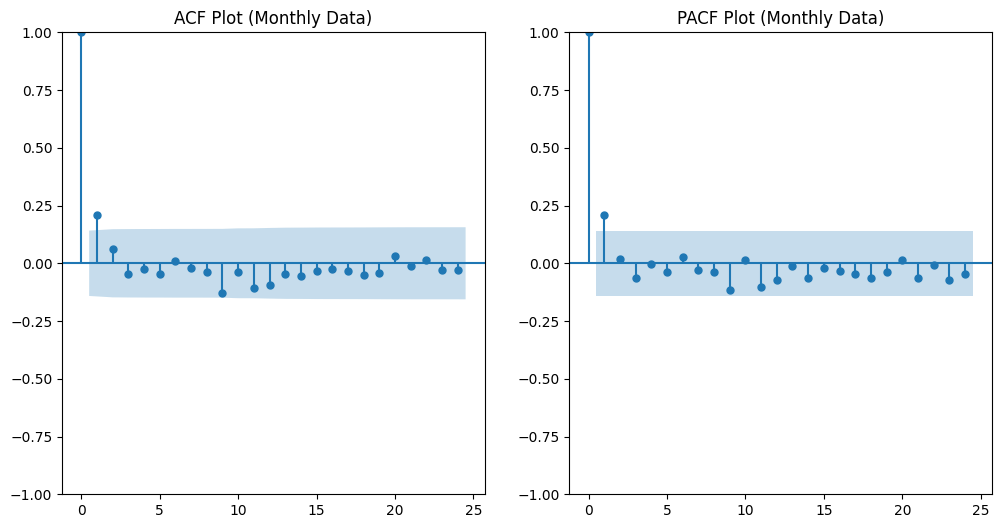

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\adity\anaconda3\envs\

Best ARIMA model order for Monthly data: (3, 0, 2)
Best AIC for Monthly data: -873.8613907906481
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                  192
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 443.931
Date:                Thu, 19 Dec 2024   AIC                           -873.861
Time:                        13:00:38   BIC                           -851.059
Sample:                    02-28-2005   HQIC                          -864.626
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -1.237      0.216      -0.002       0.000
ar.L1          0.2711      0.182  

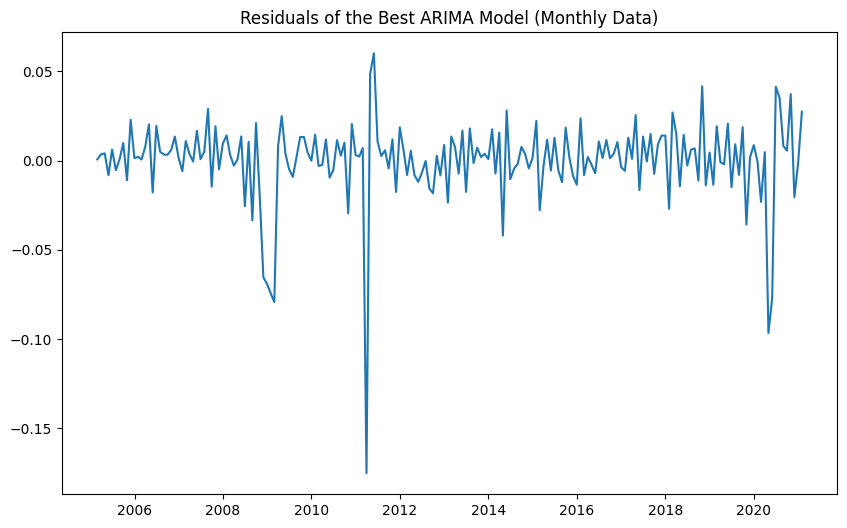

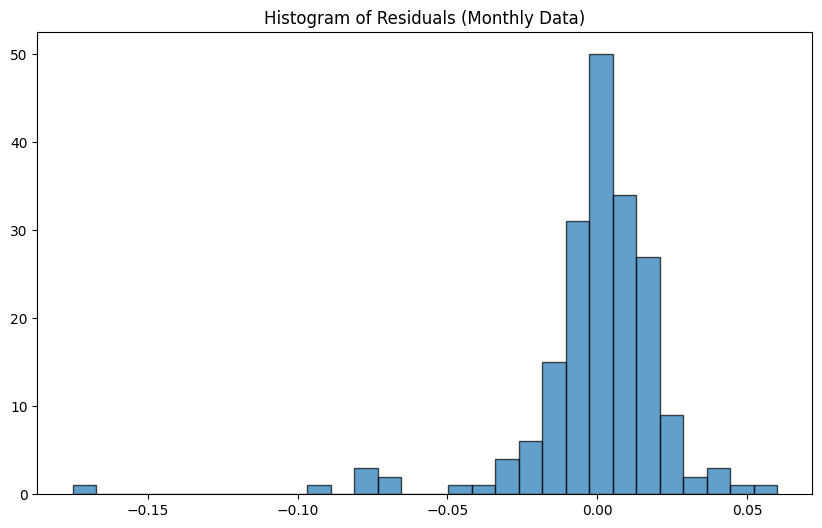

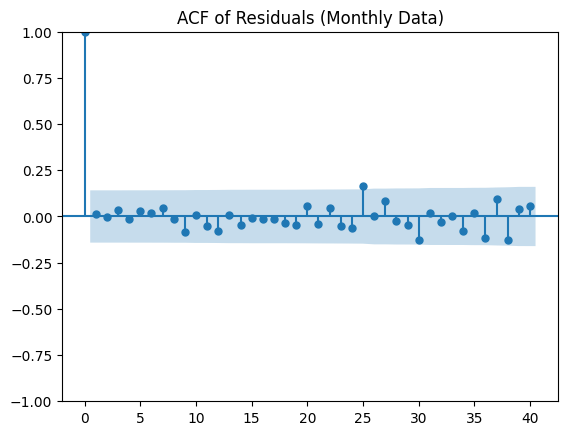

Forecast for next 12 periods for Monthly data:
2021-02-28    0.006205
2021-03-31    0.000630
2021-04-30   -0.001722
2021-05-31   -0.001664
2021-06-30   -0.002158
2021-07-31   -0.001627
2021-08-31   -0.001912
2021-09-30   -0.001415
2021-10-31   -0.001658
2021-11-30   -0.001233
2021-12-31   -0.001451
2022-01-31   -0.001091
Freq: M, Name: predicted_mean, dtype: float64


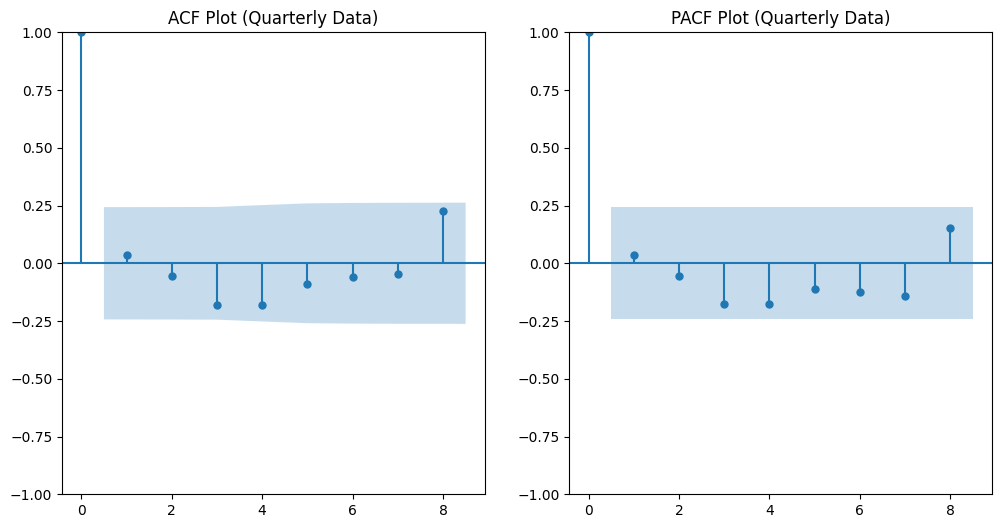

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\

Best ARIMA model order for Quarterly data: (1, 0, 2)
Best AIC for Quarterly data: -342.61800346783644
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   65
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 176.309
Date:                Thu, 19 Dec 2024   AIC                           -342.618
Time:                        13:00:46   BIC                           -331.746
Sample:                    03-31-2005   HQIC                          -338.328
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.000     -1.249      0.212      -0.001       0.000
ar.L1          0.6519      0.

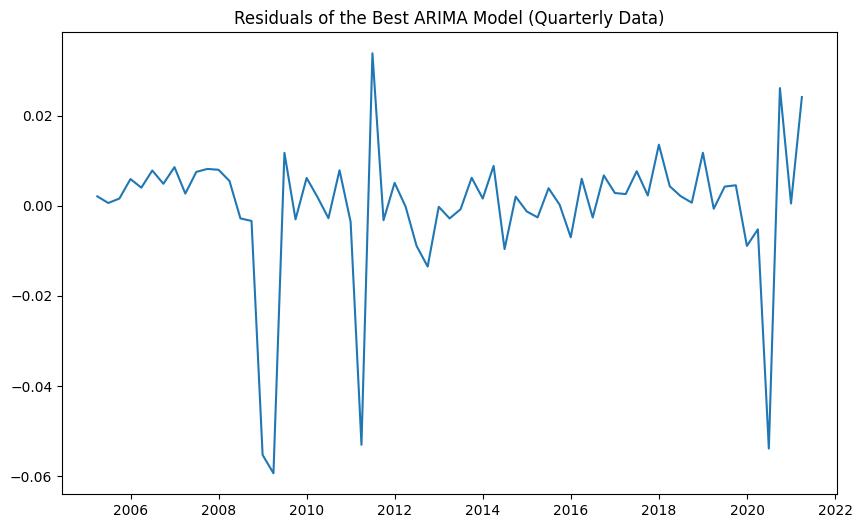

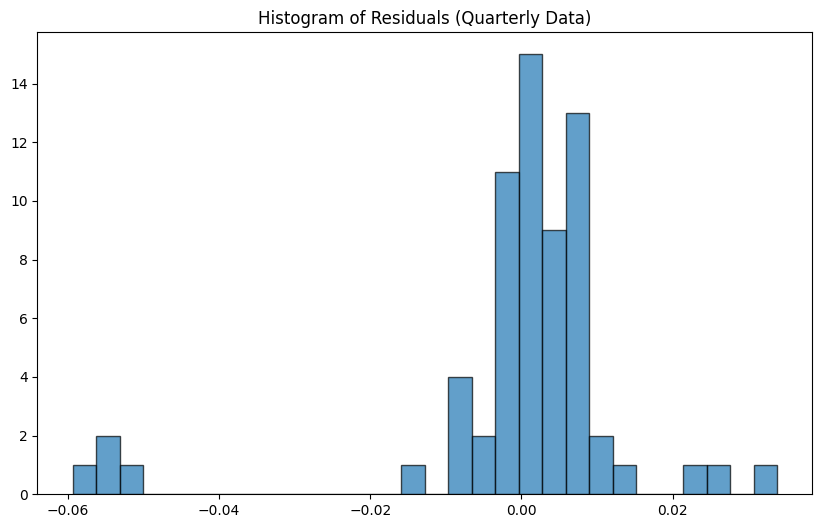

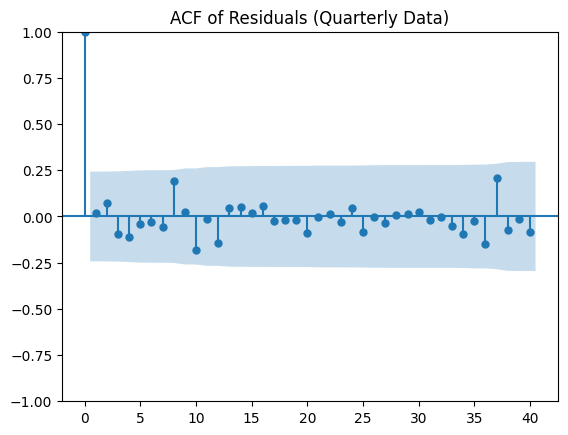

Forecast for next 12 periods for Quarterly data:
2021-06-30   -0.002180
2021-09-30   -0.005996
2021-12-31   -0.004105
2022-03-31   -0.002872
2022-06-30   -0.002068
2022-09-30   -0.001544
2022-12-31   -0.001203
2023-03-31   -0.000980
2023-06-30   -0.000835
2023-09-30   -0.000740
2023-12-31   -0.000679
2024-03-31   -0.000638
Freq: Q-DEC, Name: predicted_mean, dtype: float64


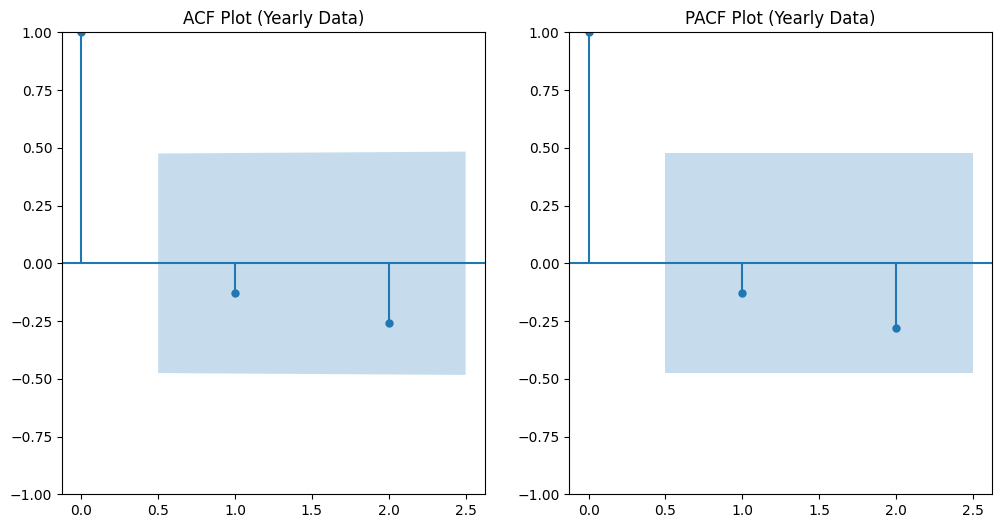

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\li

Best ARIMA model order for Yearly data: (0, 0, 1)
Best AIC for Yearly data: -112.19892246786996
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   17
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  59.099
Date:                Thu, 19 Dec 2024   AIC                           -112.199
Time:                        13:00:52   BIC                           -109.699
Sample:                    12-31-2005   HQIC                          -111.950
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.235      0.814      -0.002       0.001
ma.L1         -0.9985     55.264   

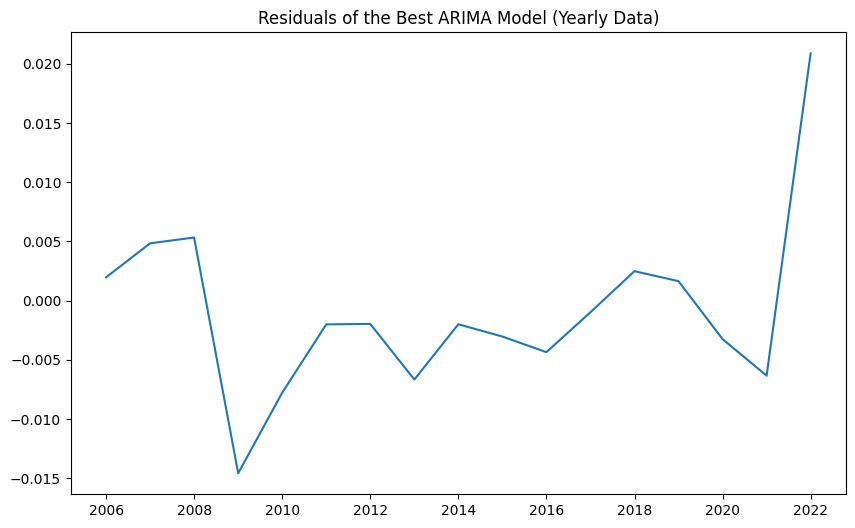

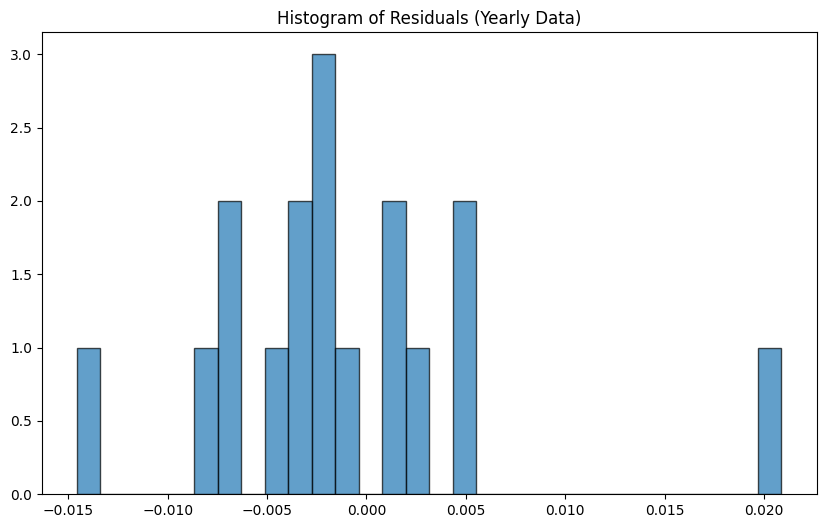

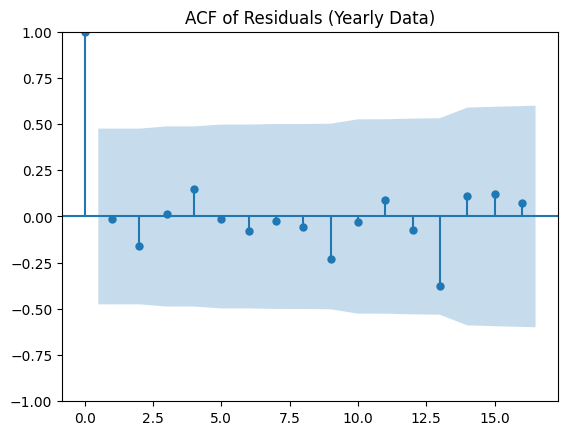

Forecast for next 12 periods for Yearly data:
2022-12-31   -0.01989
2023-12-31   -0.00017
2024-12-31   -0.00017
2025-12-31   -0.00017
2026-12-31   -0.00017
2027-12-31   -0.00017
2028-12-31   -0.00017
2029-12-31   -0.00017
2030-12-31   -0.00017
2031-12-31   -0.00017
2032-12-31   -0.00017
2033-12-31   -0.00017
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset (replace with your actual dataset loading process)
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx')

# Extract only 'Date' and 'Canada' columns
industrial_production_canada = industrial_production[['Date', 'Japan']]

# Ensure 'Date' is in datetime format, parse the 'Date' column with the 'MMM YYYY' format
industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')

# Set 'Date' as the index
industrial_production_canada.set_index('Date', inplace=True)

# Calculate the log returns (percentage change in the log of industrial production)
industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['Japan'] / industrial_production_canada['Japan'].shift(1))

# Drop the first row because it will have NaN due to the shift
industrial_production_canada.dropna(inplace=True)

# Resampling to monthly, quarterly, and yearly data
monthly_data = industrial_production_canada['Log_Return'].resample('M').mean()
quarterly_data = industrial_production_canada['Log_Return'].resample('Q').mean()
yearly_data = industrial_production_canada['Log_Return'].resample('A').mean()

# Function to plot ACF and PACF, fit ARIMA model, and select best model
def fit_arima_model(data, frequency_label, lags):
    # Plot ACF and PACF with specified lags
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title(f'ACF Plot ({frequency_label} Data)')

    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title(f'PACF Plot ({frequency_label} Data)')

    plt.show()

    # Initialize variables to store the best model and its AIC
    best_aic = float('inf')
    best_order = None
    best_model = None

    # Define ranges for p, d, q (adjust based on ACF/PACF plots and data)
    p_values = range(0, 4)  # AR order: 0 to 3
    d_values = range(0, 2)  # Differencing order: 0 or 1
    q_values = range(0, 4)  # MA order: 0 to 3

    # Loop over all combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the ARIMA model with the current combination of (p, d, q)
                    model = ARIMA(data, order=(p, d, q))
                    result = model.fit()

                    # Compare the AIC values
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_order = (p, d, q)
                        best_model = result
                except Exception as e:
                    # If fitting fails, skip this combination
                    continue

    # Output the best model and its AIC
    print(f"Best ARIMA model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())

    # Residual analysis to check if the model is well-fitted
    residuals = best_model.resid

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals of the Best ARIMA Model ({frequency_label} Data)')
    plt.show()

    # Plot histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of Residuals ({frequency_label} Data)')
    plt.show()

    # Dynamically adjust lags for residuals plot based on the length of the data
    max_lags = min(len(residuals) - 1, 40)  # Maximum lags is either 40 or the length of residuals minus 1

    # Check for autocorrelation in residuals
    plot_acf(residuals, lags=max_lags)
    plt.title(f'ACF of Residuals ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods (you can change the number of periods based on your requirements)
    forecast_steps = 12  # Number of periods to forecast
    forecast = best_model.forecast(steps=forecast_steps)

    # Output forecasted values
    print(f"Forecast for next {forecast_steps} periods for {frequency_label} data:")
    print(forecast)

# Fit ARIMA model for monthly data with 24 lags (changed from 40)
fit_arima_model(monthly_data, 'Monthly', lags=24)




## ECM Model

## Germany 🇩🇪

In [20]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and parse the German stock index and industrial production data
germany = pd.read_excel('Stock Index/German DAX.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
germany.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the German stock index
germany = germany[['Close']].rename(columns={'Close': 'German_Stock_Index'})

# Extract the Germany column for industrial production
industrial_production_germany = industrial_production[['Germany']].rename(columns={'Germany': 'Industrial_Production'})

# Calculate the Industrial Production Log Change (log of ratio)
industrial_production_germany['Industrial_Production_Log_Change'] = np.log(industrial_production_germany['Industrial_Production'] / industrial_production_germany['Industrial_Production'].shift(1))

# Calculate the Stock Log Return (log of ratio)
germany['Stock_Log_Return'] = np.log(germany['German_Stock_Index'] / germany['German_Stock_Index'].shift(1))

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample German stock index (Log Return)
germany_monthly = resample_data(germany[['Stock_Log_Return']], freq='M')
germany_quarterly = resample_data(germany[['Stock_Log_Return']], freq='Q')
germany_yearly = resample_data(germany[['Stock_Log_Return']], freq='A')

# Resample industrial production log change (Industrial Production Log Change)
industrial_monthly = resample_data(industrial_production_germany[['Industrial_Production_Log_Change']], freq='M')
industrial_quarterly = resample_data(industrial_production_germany[['Industrial_Production_Log_Change']], freq='Q')
industrial_yearly = resample_data(industrial_production_germany[['Industrial_Production_Log_Change']], freq='A')

# Combine monthly data
monthly_data = pd.concat([industrial_monthly, germany_monthly], axis=1)

# Combine quarterly data
quarterly_data = pd.concat([industrial_quarterly, germany_quarterly], axis=1)

# Combine yearly data
yearly_data = pd.concat([industrial_yearly, germany_yearly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()
quarterly_data = quarterly_data.dropna()
yearly_data = yearly_data.dropna()

# Function to test different lag configurations and choose the one with the highest R-squared
def test_lags(data, dependent_var, independent_var_prefix, max_lags):
    best_r_squared = -np.inf
    best_lag = 0
    best_model = None
    
    for lag in range(1, max_lags + 1):
        # Add lags for the stock log return
        data_lagged = data.copy()
        for l in range(1, lag + 1):
            data_lagged[f'{independent_var_prefix}_lag_{l}'] = data[independent_var_prefix].shift(l)

        # Drop rows with NaN after adding lags
        data_lagged = data_lagged.dropna()

        # Define dependent and independent variables
        y = data_lagged[dependent_var]
        X = data_lagged[[f'{independent_var_prefix}_lag_{l}' for l in range(1, lag + 1)]]
        X = sm.add_constant(X)  # Add constant for intercept

        # Run OLS regression
        model = sm.OLS(y, X).fit()
        r_squared = model.rsquared

        # Check if this model has the highest R-squared
        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_lag = lag
            best_model = model

    return best_lag, best_r_squared, best_model

# Test different lags for monthly data (maximum 24 lags)
best_lag_monthly, best_r_squared_monthly, best_model_monthly = test_lags(
    monthly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=24
)

# Test different lags for quarterly data (maximum 8 lags)
best_lag_quarterly, best_r_squared_quarterly, best_model_quarterly = test_lags(
    quarterly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=8
)

# Test different lags for yearly data (maximum 2 lags)
best_lag_yearly, best_r_squared_yearly, best_model_yearly = test_lags(
    yearly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=2
)

# Print the best results for monthly, quarterly, and yearly data
print(f"\nBest Lag for Monthly Data: {best_lag_monthly} with R-squared: {best_r_squared_monthly}")
print(best_model_monthly.summary())

print(f"\nBest Lag for Quarterly Data: {best_lag_quarterly} with R-squared: {best_r_squared_quarterly}")
print(best_model_quarterly.summary())

print(f"\nBest Lag for Yearly Data: {best_lag_yearly} with R-squared: {best_r_squared_yearly}")
print(best_model_yearly.summary())


C:\Users\adity\AppData\Local\Temp\ipykernel_23160\3990573155.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])



Best Lag for Monthly Data: 24 with R-squared: 0.10098676067273449
                                   OLS Regression Results                                   
Dep. Variable:     Industrial_Production_Log_Change   R-squared:                       0.101
Model:                                          OLS   Adj. R-squared:                 -0.074
Method:                               Least Squares   F-statistic:                    0.5757
Date:                              Thu, 19 Dec 2024   Prob (F-statistic):              0.941
Time:                                      13:00:54   Log-Likelihood:                 328.49
No. Observations:                               148   AIC:                            -607.0
Df Residuals:                                   123   BIC:                            -532.0
Df Model:                                        24                                         
Covariance Type:                          nonrobust                                         
   

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## ARIMA For Germany

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\1898588239.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')
C:\Users\adity\AppData\Local\Temp\ipykernel_23160\1898588239.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['Germany'] / industrial_production_canada['Germany'].shift(1))
C:\Users\adity\AppData\Local\Tem

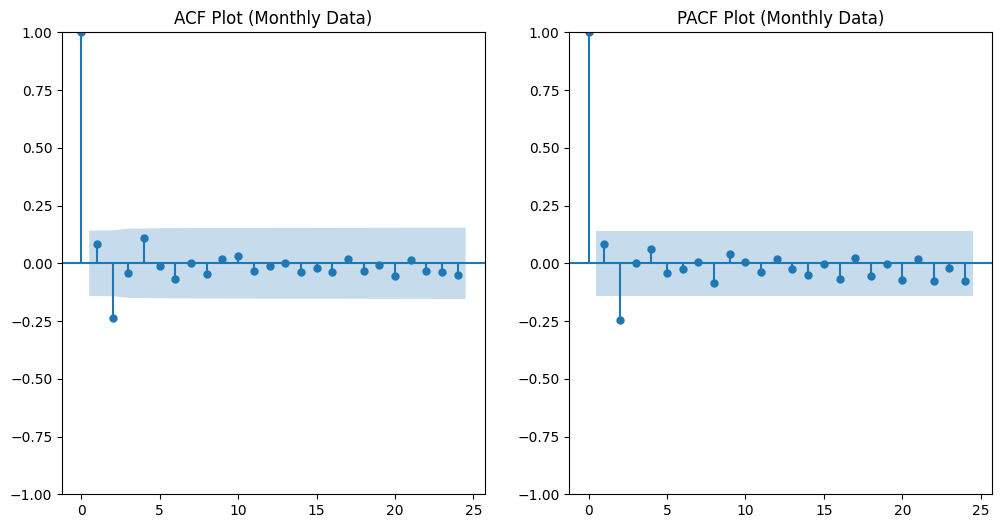

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\li

Best ARIMA model order for Monthly data: (2, 0, 0)
Best AIC for Monthly data: -848.1997100268466
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                  192
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 428.100
Date:                Thu, 19 Dec 2024   AIC                           -848.200
Time:                        13:01:02   BIC                           -835.170
Sample:                    02-28-2005   HQIC                          -842.922
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.002      0.267      0.789      -0.004       0.005
ar.L1          0.1070      0.030  

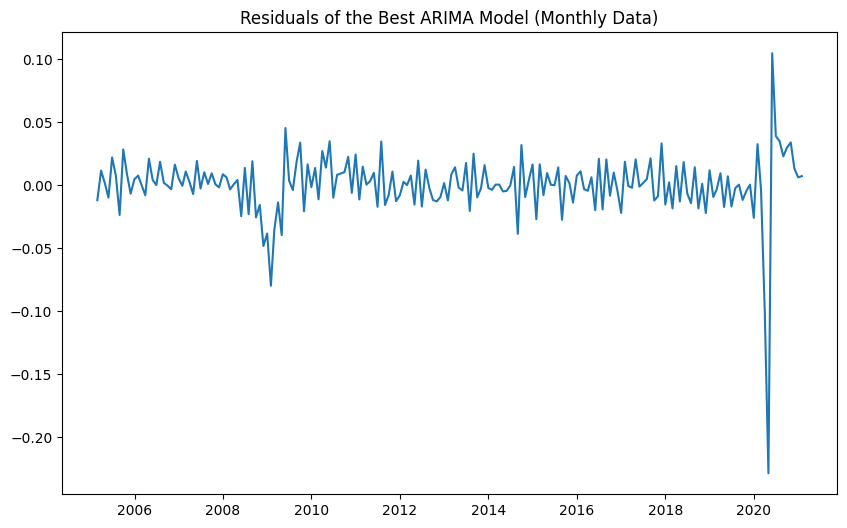

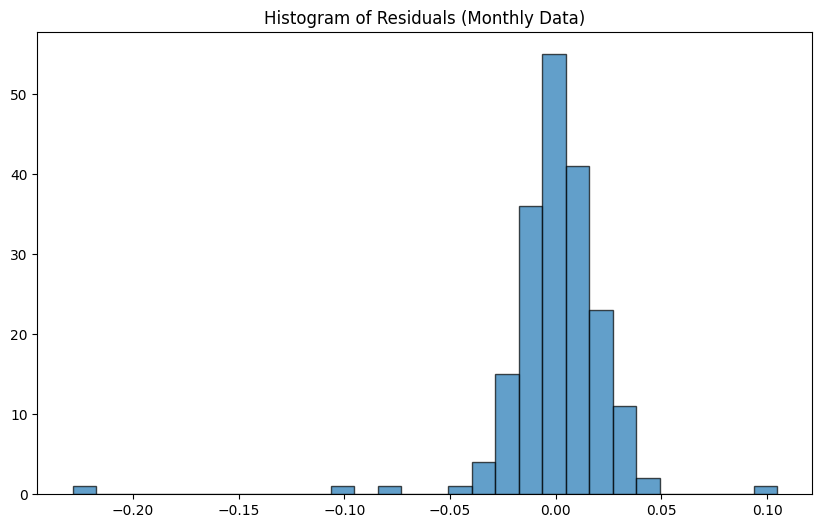

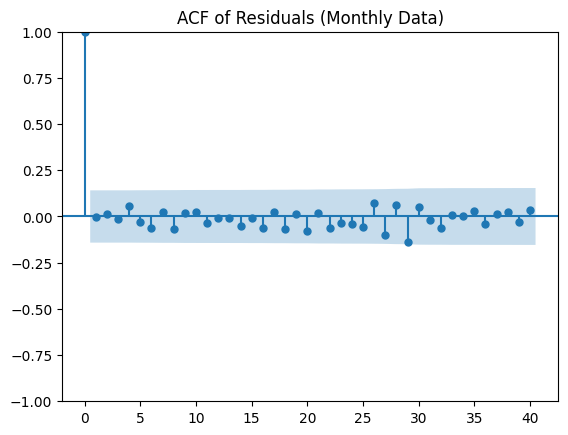

Forecast for next 12 periods for Monthly data:
2021-02-28    0.001512
2021-03-31   -0.000305
2021-04-30    0.000339
2021-05-31    0.000854
2021-06-30    0.000751
2021-07-31    0.000613
2021-08-31    0.000624
2021-09-30    0.000659
2021-10-31    0.000660
2021-11-30    0.000651
2021-12-31    0.000650
2022-01-31    0.000652
Freq: M, Name: predicted_mean, dtype: float64


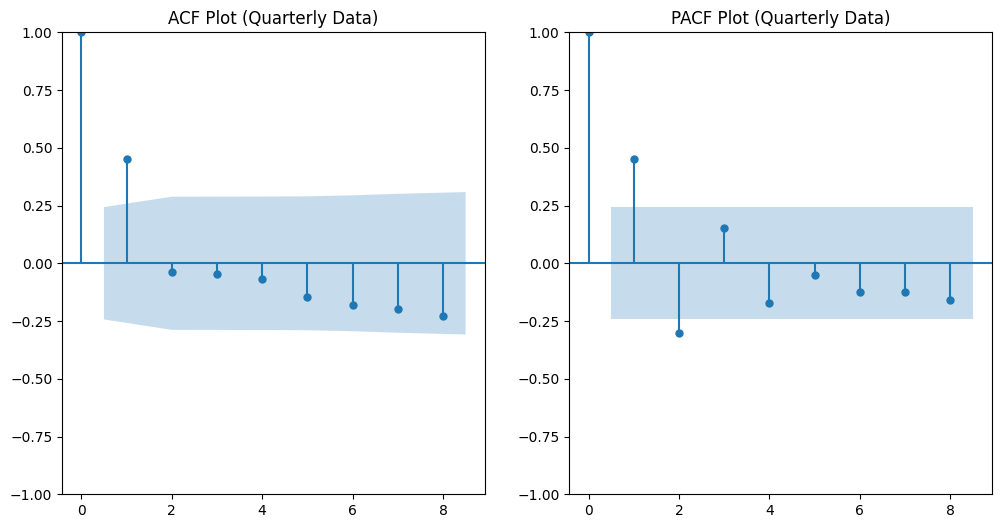

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anacon

Best ARIMA model order for Quarterly data: (0, 0, 1)
Best AIC for Quarterly data: -446.1251530808799
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   65
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 226.063
Date:                Thu, 19 Dec 2024   AIC                           -446.125
Time:                        13:01:10   BIC                           -439.602
Sample:                    03-31-2005   HQIC                          -443.551
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.002      0.370      0.711      -0.003       0.004
ma.L1          0.6769      0.0

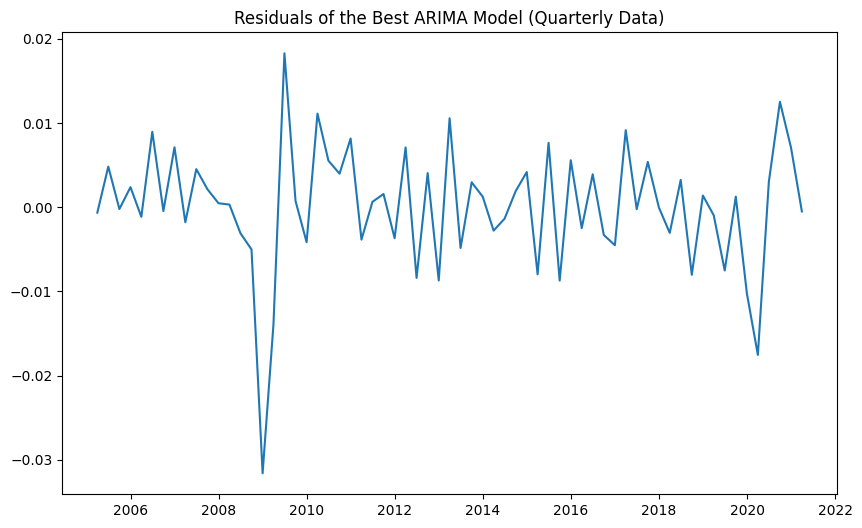

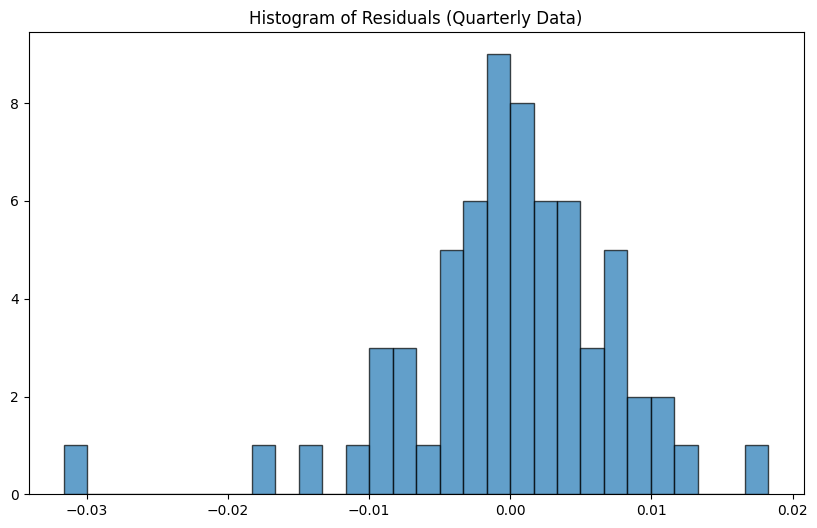

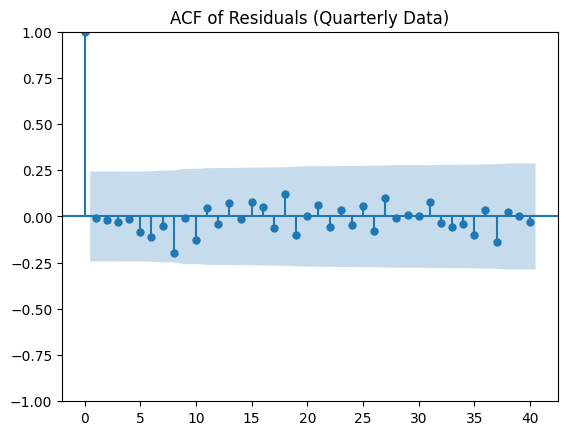

Forecast for next 12 periods for Quarterly data:
2021-06-30    0.000306
2021-09-30    0.000648
2021-12-31    0.000648
2022-03-31    0.000648
2022-06-30    0.000648
2022-09-30    0.000648
2022-12-31    0.000648
2023-03-31    0.000648
2023-06-30    0.000648
2023-09-30    0.000648
2023-12-31    0.000648
2024-03-31    0.000648
Freq: Q-DEC, Name: predicted_mean, dtype: float64


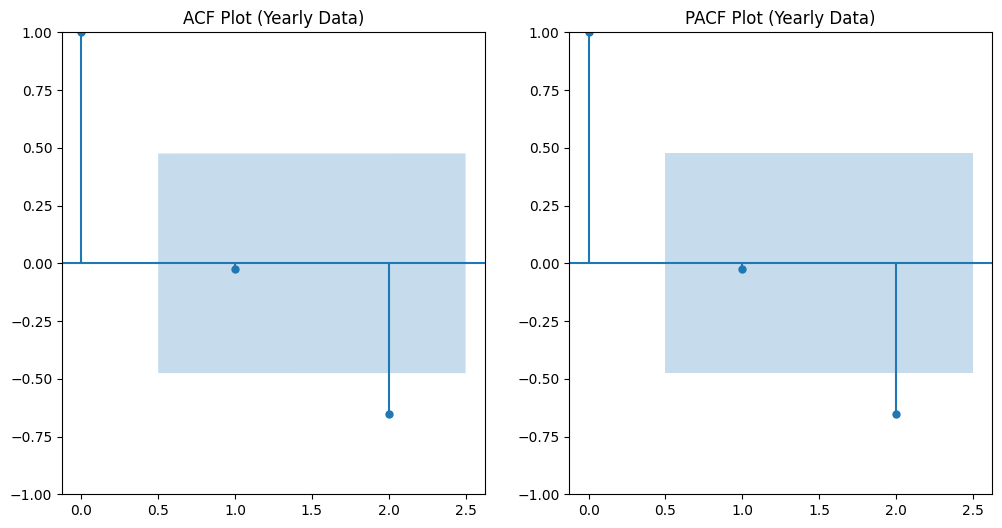

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\li

Best ARIMA model order for Yearly data: (2, 0, 1)
Best AIC for Yearly data: -137.424798401655
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   17
Model:                 ARIMA(2, 0, 1)   Log Likelihood                  73.712
Date:                Thu, 19 Dec 2024   AIC                           -137.425
Time:                        13:01:15   BIC                           -133.259
Sample:                    12-31-2005   HQIC                          -137.011
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      3.029      0.002       0.000       0.001
ar.L1          0.2970      0.211     

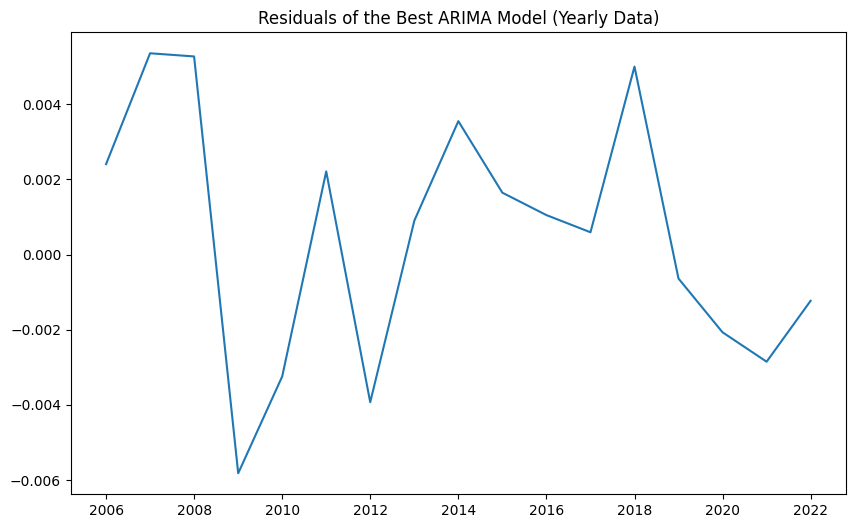

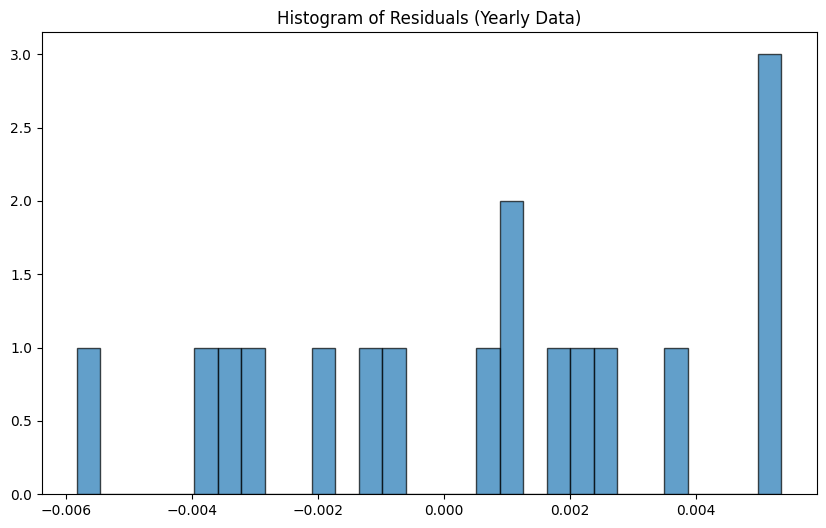

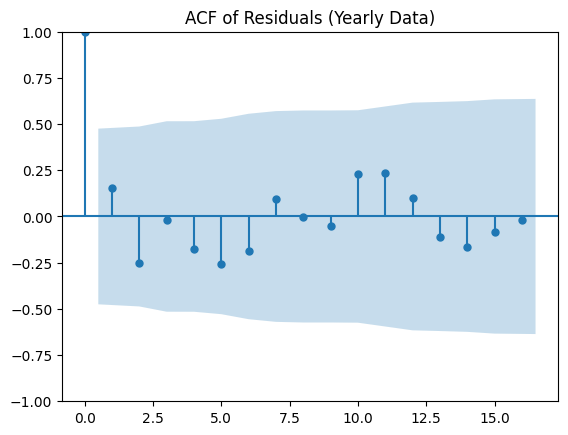

Forecast for next 12 periods for Yearly data:
2022-12-31    0.003558
2023-12-31   -0.000932
2024-12-31   -0.001467
2025-12-31    0.000991
2026-12-31    0.002032
2027-12-31    0.000909
2028-12-31   -0.000031
2029-12-31    0.000344
2030-12-31    0.001003
2031-12-31    0.000981
2032-12-31    0.000590
2033-12-31    0.000487
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset (replace with your actual dataset loading process)
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx')

# Extract only 'Date' and 'Canada' columns
industrial_production_canada = industrial_production[['Date', 'Germany']]

# Ensure 'Date' is in datetime format, parse the 'Date' column with the 'MMM YYYY' format
industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')

# Set 'Date' as the index
industrial_production_canada.set_index('Date', inplace=True)

# Calculate the log returns (percentage change in the log of industrial production)
industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['Germany'] / industrial_production_canada['Germany'].shift(1))

# Drop the first row because it will have NaN due to the shift
industrial_production_canada.dropna(inplace=True)

# Resampling to monthly, quarterly, and yearly data
monthly_data = industrial_production_canada['Log_Return'].resample('M').mean()
quarterly_data = industrial_production_canada['Log_Return'].resample('Q').mean()
yearly_data = industrial_production_canada['Log_Return'].resample('A').mean()

# Function to plot ACF and PACF, fit ARIMA model, and select best model
def fit_arima_model(data, frequency_label, lags):
    # Plot ACF and PACF with specified lags
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title(f'ACF Plot ({frequency_label} Data)')

    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title(f'PACF Plot ({frequency_label} Data)')

    plt.show()

    # Initialize variables to store the best model and its AIC
    best_aic = float('inf')
    best_order = None
    best_model = None

    # Define ranges for p, d, q (adjust based on ACF/PACF plots and data)
    p_values = range(0, 4)  # AR order: 0 to 3
    d_values = range(0, 2)  # Differencing order: 0 or 1
    q_values = range(0, 4)  # MA order: 0 to 3

    # Loop over all combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the ARIMA model with the current combination of (p, d, q)
                    model = ARIMA(data, order=(p, d, q))
                    result = model.fit()

                    # Compare the AIC values
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_order = (p, d, q)
                        best_model = result
                except Exception as e:
                    # If fitting fails, skip this combination
                    continue

    # Output the best model and its AIC
    print(f"Best ARIMA model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())

    # Residual analysis to check if the model is well-fitted
    residuals = best_model.resid

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals of the Best ARIMA Model ({frequency_label} Data)')
    plt.show()

    # Plot histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of Residuals ({frequency_label} Data)')
    plt.show()

    # Dynamically adjust lags for residuals plot based on the length of the data
    max_lags = min(len(residuals) - 1, 40)  # Maximum lags is either 40 or the length of residuals minus 1

    # Check for autocorrelation in residuals
    plot_acf(residuals, lags=max_lags)
    plt.title(f'ACF of Residuals ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods (you can change the number of periods based on your requirements)
    forecast_steps = 12  # Number of periods to forecast
    forecast = best_model.forecast(steps=forecast_steps)

    # Output forecasted values
    print(f"Forecast for next {forecast_steps} periods for {frequency_label} data:")
    print(forecast)

# Fit ARIMA model for monthly data with 24 lags (changed from 40)
fit_arima_model(monthly_data, 'Monthly', lags=24)




## ECM 

## United Kingdom 🇬🇧 (p)

In [23]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and parse the UK stock index (FTSE 100) and industrial production data
uk = pd.read_excel('Stock Index/UK FTSE_100.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Set 'Date' as the index
uk.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Rename and select relevant columns
uk = uk[['Close']].rename(columns={'Close': 'UK_Stock_Index'})
industrial_production_uk = industrial_production[['UK']].rename(columns={'UK': 'Industrial_Production'})

# Calculate log changes
industrial_production_uk['Industrial_Production_Log_Change'] = np.log(industrial_production_uk['Industrial_Production'] / industrial_production_uk['Industrial_Production'].shift(1))
uk['Stock_Log_Return'] = np.log(uk['UK_Stock_Index'] / uk['UK_Stock_Index'].shift(1))

# Resampling function
def resample_data(df, freq='M', method='mean'):
    methods = {'mean': df.resample(freq).mean, 'last': df.resample(freq).last}
    if method in methods:
        return methods[method]()
    raise ValueError("Invalid method. Use 'mean' or 'last'.")

# Resample data
freqs = {'M': 'Monthly', 'Q': 'Quarterly', 'A': 'Yearly'}
stock_resampled = {freqs[freq]: resample_data(uk[['Stock_Log_Return']], freq) for freq in freqs}
industrial_resampled = {freqs[freq]: resample_data(industrial_production_uk[['Industrial_Production_Log_Change']], freq) for freq in freqs}

# Combine and drop missing values
combined_data = {period: pd.concat([industrial_resampled[period], stock_resampled[period]], axis=1).dropna() for period in freqs.values()}

# Function to create lagged variables and run OLS
def run_ols_with_lags(data, dependent_var, independent_var, num_lags):
    data_lagged = data.copy()
    for lag in range(1, num_lags + 1):
        data_lagged[f'{independent_var}_lag_{lag}'] = data[independent_var].shift(lag)
    
    data_lagged = data_lagged.dropna()  # Drop rows with NaN values
    
    y = data_lagged[dependent_var]
    X = sm.add_constant(data_lagged[[f'{independent_var}_lag_{lag}' for lag in range(1, num_lags + 1)]])
    
    model = sm.OLS(y, X).fit()
    return model

# Run OLS models for specified lags
lag_settings = {'Monthly': 24, 'Quarterly': 8, 'Yearly': 2}
models = {}

for period, num_lags in lag_settings.items():
    models[period] = run_ols_with_lags(
        combined_data[period],
        dependent_var='Industrial_Production_Log_Change',
        independent_var='Stock_Log_Return',
        num_lags=num_lags
    )

# Print the summaries for each model
for period, model in models.items():
    print(f"\n{period} Data - OLS Model Summary with {lag_settings[period]} Lags:")
    print(model.summary())



Monthly Data - OLS Model Summary with 24 Lags:
                                   OLS Regression Results                                   
Dep. Variable:     Industrial_Production_Log_Change   R-squared:                       0.110
Model:                                          OLS   Adj. R-squared:                 -0.042
Method:                               Least Squares   F-statistic:                    0.7240
Date:                              Thu, 19 Dec 2024   Prob (F-statistic):              0.820
Time:                                      13:01:18   Log-Likelihood:                 417.10
No. Observations:                               166   AIC:                            -784.2
Df Residuals:                                   141   BIC:                            -706.4
Df Model:                                        24                                         
Covariance Type:                          nonrobust                                         
                      

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\1074634586.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## ECM Model For UK

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2534082767.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')
C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2534082767.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['UK'] / industrial_production_canada['UK'].shift(1))
C:\Users\adity\AppData\Local\Temp\ipykerne

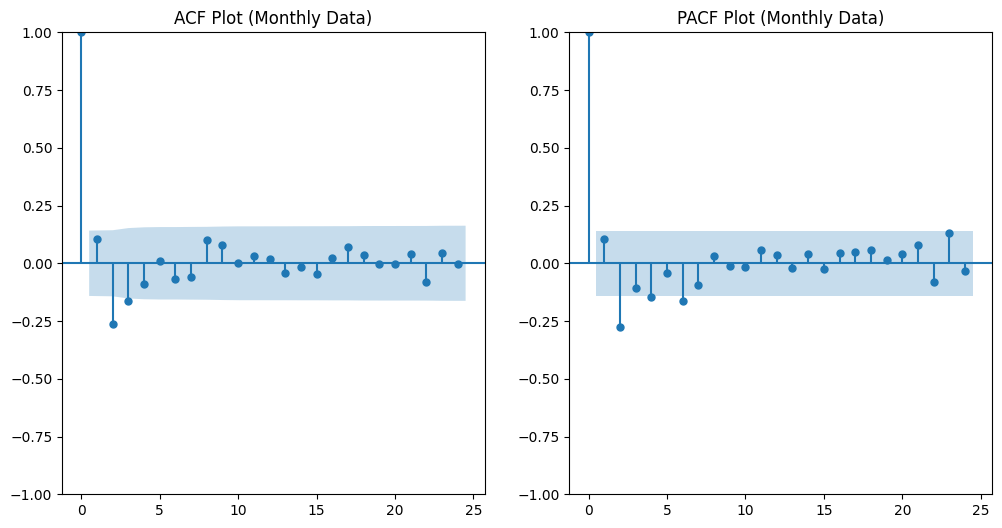

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs

Best ARIMA model order for Monthly data: (2, 0, 1)
Best AIC for Monthly data: -973.5942383354711
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                  192
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 491.797
Date:                Thu, 19 Dec 2024   AIC                           -973.594
Time:                        13:01:27   BIC                           -957.307
Sample:                    02-28-2005   HQIC                          -966.998
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.199      0.842      -0.002       0.002
ar.L1          0.7448      0.095  

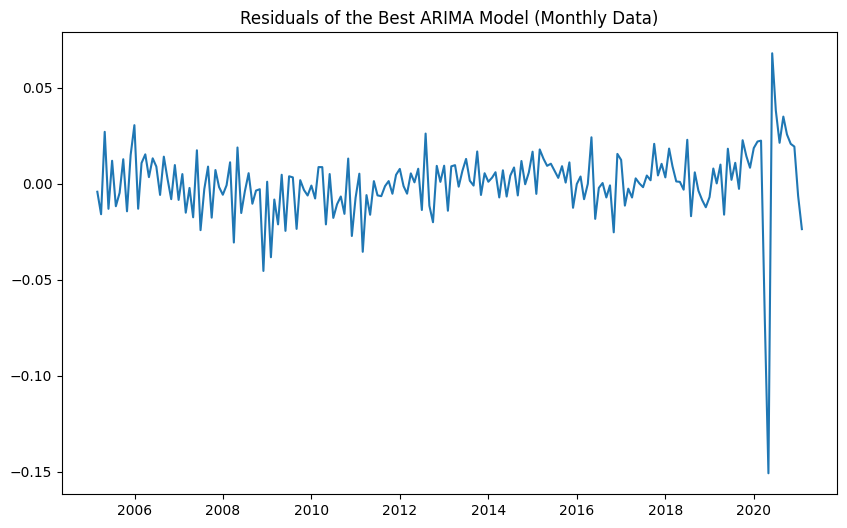

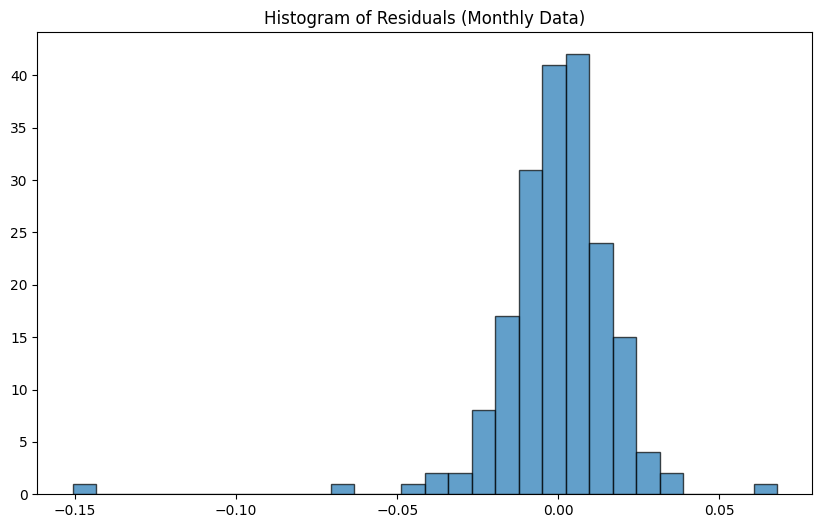

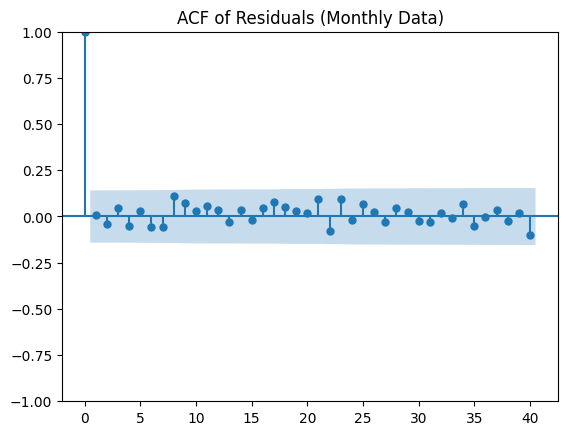

Forecast for next 12 periods for Monthly data:
2021-02-28   -0.002367
2021-03-31    0.008974
2021-04-30    0.007562
2021-05-31    0.002821
2021-06-30   -0.000251
2021-07-31   -0.000996
2021-08-31   -0.000552
2021-09-30    0.000022
2021-10-31    0.000304
2021-11-30    0.000328
2021-12-31    0.000254
2022-01-31    0.000191
Freq: M, Name: predicted_mean, dtype: float64


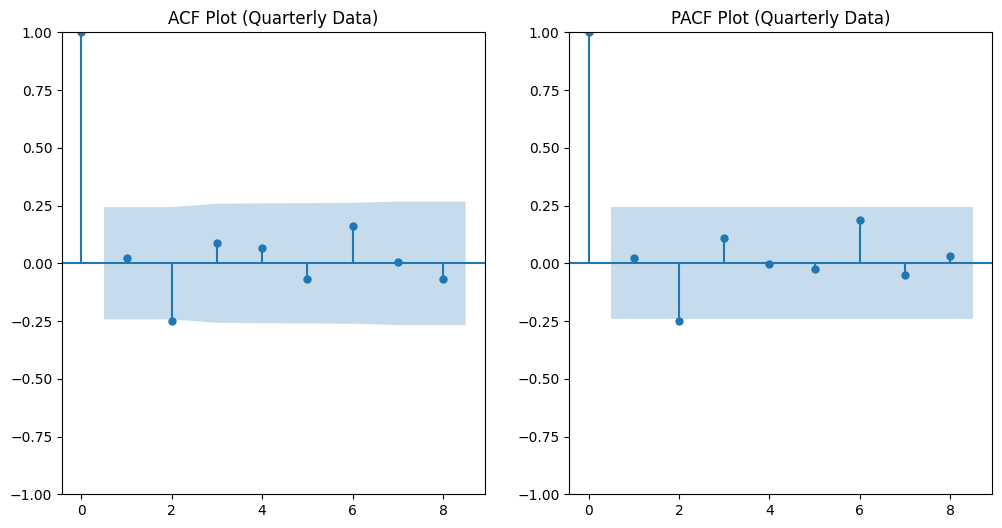

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\li

Best ARIMA model order for Quarterly data: (2, 0, 0)
Best AIC for Quarterly data: -447.4910068403933
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   65
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 227.746
Date:                Thu, 19 Dec 2024   AIC                           -447.491
Time:                        13:01:35   BIC                           -438.793
Sample:                    03-31-2005   HQIC                          -444.059
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.209      0.835      -0.002       0.001
ar.L1          0.0606      0.1

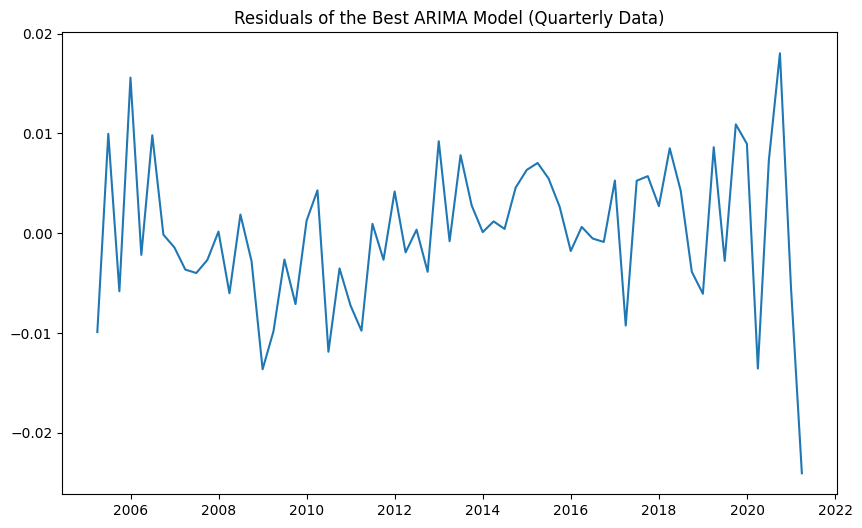

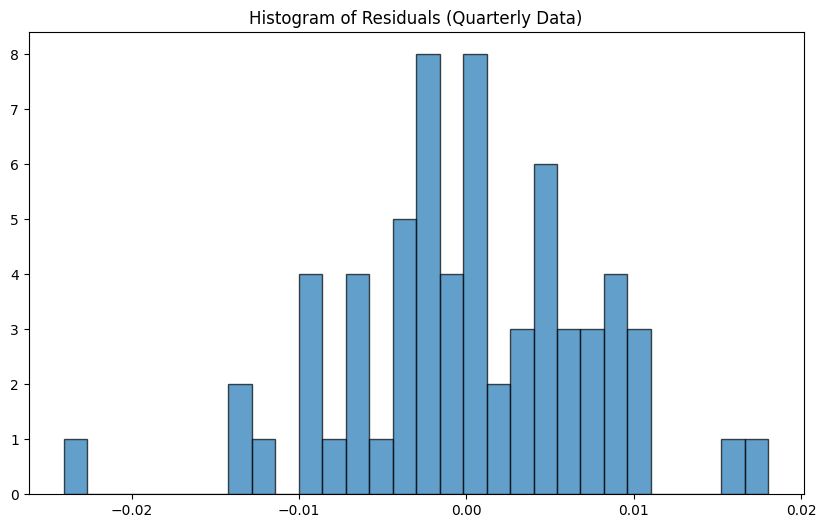

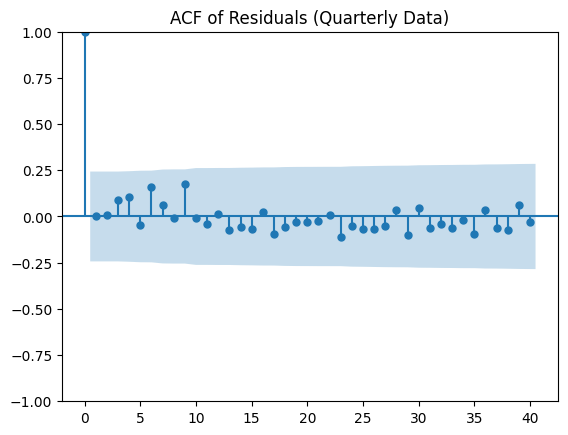

Forecast for next 12 periods for Quarterly data:
2021-06-30   -0.000352
2021-09-30    0.011029
2021-12-31    0.000586
2022-03-31   -0.003968
2022-06-30   -0.000646
2022-09-30    0.001125
2022-12-31    0.000087
2023-03-31   -0.000586
2023-06-30   -0.000269
2023-09-30   -0.000018
2023-12-31   -0.000112
2024-03-31   -0.000204
Freq: Q-DEC, Name: predicted_mean, dtype: float64


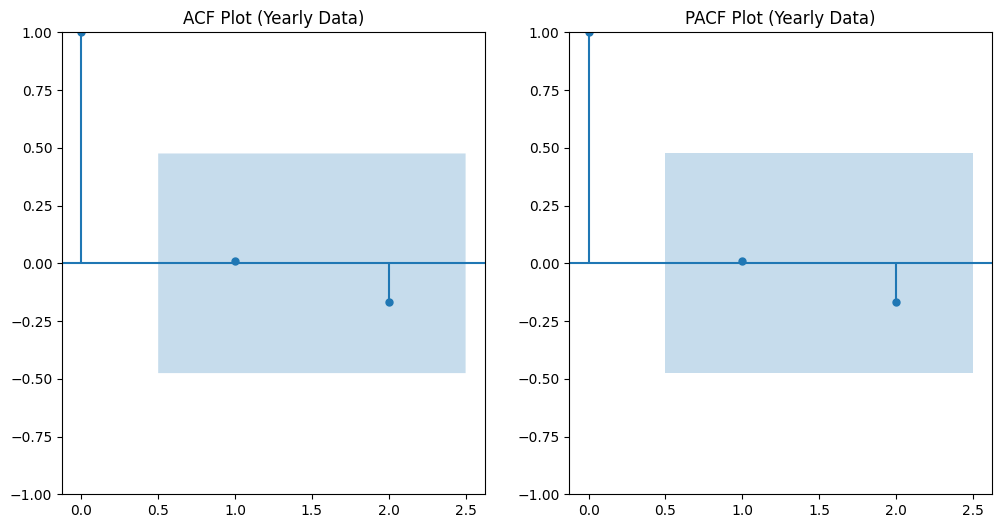

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\li

Best ARIMA model order for Yearly data: (0, 0, 1)
Best AIC for Yearly data: -112.2804841634176
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   17
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  59.140
Date:                Thu, 19 Dec 2024   AIC                           -112.280
Time:                        13:01:42   BIC                           -109.781
Sample:                    12-31-2005   HQIC                          -112.032
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.006     -0.450      0.653      -0.014       0.009
ma.L1          0.9995     58.739    

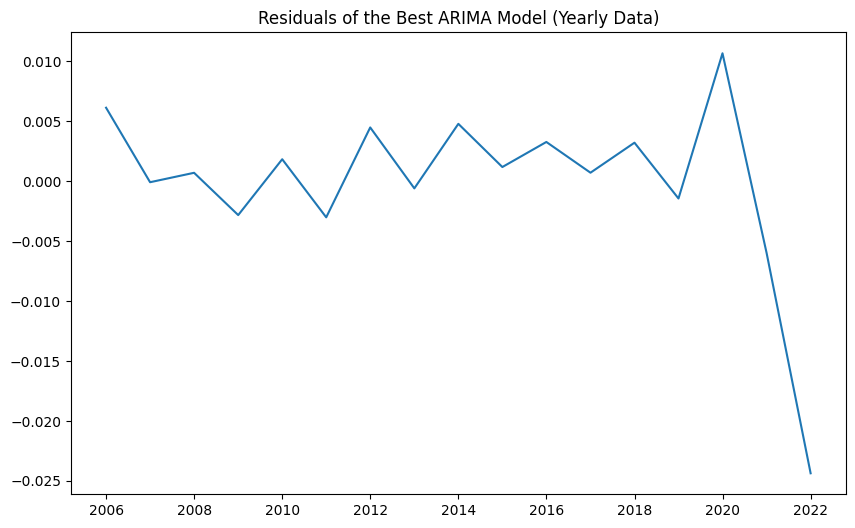

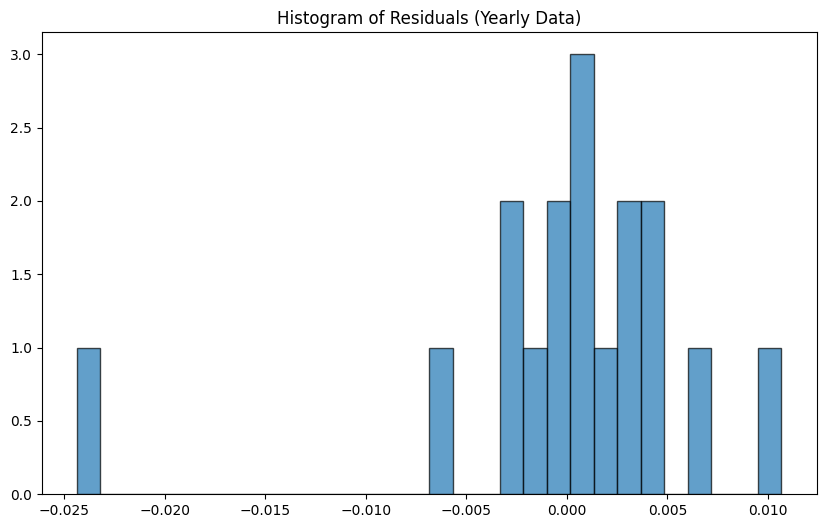

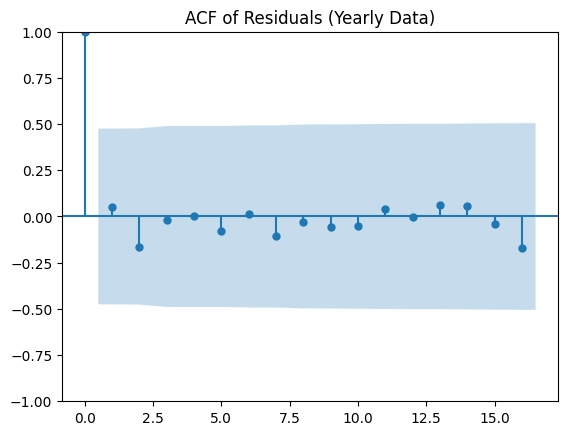

Forecast for next 12 periods for Yearly data:
2022-12-31   -0.025671
2023-12-31   -0.002663
2024-12-31   -0.002663
2025-12-31   -0.002663
2026-12-31   -0.002663
2027-12-31   -0.002663
2028-12-31   -0.002663
2029-12-31   -0.002663
2030-12-31   -0.002663
2031-12-31   -0.002663
2032-12-31   -0.002663
2033-12-31   -0.002663
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset (replace with your actual dataset loading process)
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx')

# Extract only 'Date' and 'Canada' columns
industrial_production_canada = industrial_production[['Date', 'UK']]

# Ensure 'Date' is in datetime format, parse the 'Date' column with the 'MMM YYYY' format
industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')

# Set 'Date' as the index
industrial_production_canada.set_index('Date', inplace=True)

# Calculate the log returns (percentage change in the log of industrial production)
industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['UK'] / industrial_production_canada['UK'].shift(1))

# Drop the first row because it will have NaN due to the shift
industrial_production_canada.dropna(inplace=True)

# Resampling to monthly, quarterly, and yearly data
monthly_data = industrial_production_canada['Log_Return'].resample('M').mean()
quarterly_data = industrial_production_canada['Log_Return'].resample('Q').mean()
yearly_data = industrial_production_canada['Log_Return'].resample('A').mean()

# Function to plot ACF and PACF, fit ARIMA model, and select best model
def fit_arima_model(data, frequency_label, lags):
    # Plot ACF and PACF with specified lags
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title(f'ACF Plot ({frequency_label} Data)')

    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title(f'PACF Plot ({frequency_label} Data)')

    plt.show()

    # Initialize variables to store the best model and its AIC
    best_aic = float('inf')
    best_order = None
    best_model = None

    # Define ranges for p, d, q (adjust based on ACF/PACF plots and data)
    p_values = range(0, 4)  # AR order: 0 to 3
    d_values = range(0, 2)  # Differencing order: 0 or 1
    q_values = range(0, 4)  # MA order: 0 to 3

    # Loop over all combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the ARIMA model with the current combination of (p, d, q)
                    model = ARIMA(data, order=(p, d, q))
                    result = model.fit()

                    # Compare the AIC values
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_order = (p, d, q)
                        best_model = result
                except Exception as e:
                    # If fitting fails, skip this combination
                    continue

    # Output the best model and its AIC
    print(f"Best ARIMA model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())

    # Residual analysis to check if the model is well-fitted
    residuals = best_model.resid

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals of the Best ARIMA Model ({frequency_label} Data)')
    plt.show()

    # Plot histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of Residuals ({frequency_label} Data)')
    plt.show()

    # Dynamically adjust lags for residuals plot based on the length of the data
    max_lags = min(len(residuals) - 1, 40)  # Maximum lags is either 40 or the length of residuals minus 1

    # Check for autocorrelation in residuals
    plot_acf(residuals, lags=max_lags)
    plt.title(f'ACF of Residuals ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods (you can change the number of periods based on your requirements)
    forecast_steps = 12  # Number of periods to forecast
    forecast = best_model.forecast(steps=forecast_steps)

    # Output forecasted values
    print(f"Forecast for next {forecast_steps} periods for {frequency_label} data:")
    print(forecast)

# Fit ARIMA model for monthly data with 24 lags (changed from 40)
fit_arima_model(monthly_data, 'Monthly', lags=24)




## ECM

## France 🇫🇷 (p)

In [26]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and parse the French stock index (CAC 40) and industrial production data
france = pd.read_excel('Stock Index/French_CAC-40.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
france.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the French CAC 40 stock index
france = france[['Close']].rename(columns={'Close': 'French_Stock_Index'})

# Extract the French column for industrial production
industrial_production_fr = industrial_production[['France']].rename(columns={'France': 'Industrial_Production'})

# Calculate the Industrial Production Log Change (log of ratio)
industrial_production_fr['Industrial_Production_Log_Change'] = np.log(industrial_production_fr['Industrial_Production'] / industrial_production_fr['Industrial_Production'].shift(1))

# Calculate the Stock Log Return (log of ratio)
france['Stock_Log_Return'] = np.log(france['French_Stock_Index'] / france['French_Stock_Index'].shift(1))

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample French stock index (Log Return)
france_monthly = resample_data(france[['Stock_Log_Return']], freq='M')
france_quarterly = resample_data(france[['Stock_Log_Return']], freq='Q')
france_yearly = resample_data(france[['Stock_Log_Return']], freq='A')

# Resample industrial production log change (Industrial Production Log Change)
industrial_monthly = resample_data(industrial_production_fr[['Industrial_Production_Log_Change']], freq='M')
industrial_quarterly = resample_data(industrial_production_fr[['Industrial_Production_Log_Change']], freq='Q')
industrial_yearly = resample_data(industrial_production_fr[['Industrial_Production_Log_Change']], freq='A')

# Combine monthly data
monthly_data = pd.concat([industrial_monthly, france_monthly], axis=1)

# Combine quarterly data
quarterly_data = pd.concat([industrial_quarterly, france_quarterly], axis=1)

# Combine yearly data
yearly_data = pd.concat([industrial_yearly, france_yearly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()
quarterly_data = quarterly_data.dropna()
yearly_data = yearly_data.dropna()

# Function to test different lag configurations and choose the one with the highest R-squared
def test_lags(data, dependent_var, independent_var_prefix, max_lags):
    best_r_squared = -np.inf
    best_lag = 0
    best_model = None
    
    for lag in range(1, max_lags + 1):
        # Add lags for the stock log return
        data_lagged = data.copy()
        for l in range(1, lag + 1):
            data_lagged[f'{independent_var_prefix}_lag_{l}'] = data[independent_var_prefix].shift(l)

        # Drop rows with NaN after adding lags
        data_lagged = data_lagged.dropna()

        # Define dependent and independent variables
        y = data_lagged[dependent_var]
        X = data_lagged[[f'{independent_var_prefix}_lag_{l}' for l in range(1, lag + 1)]]
        X = sm.add_constant(X)  # Add constant for intercept

        # Run OLS regression
        model = sm.OLS(y, X).fit()
        r_squared = model.rsquared

        # Check if this model has the highest R-squared
        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_lag = lag
            best_model = model

    return best_lag, best_r_squared, best_model

# Test different lags for monthly data (maximum 24 lags)
best_lag_monthly, best_r_squared_monthly, best_model_monthly = test_lags(
    monthly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=24
)

# Test different lags for quarterly data (maximum 8 lags)
best_lag_quarterly, best_r_squared_quarterly, best_model_quarterly = test_lags(
    quarterly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=8
)

# Test different lags for yearly data (maximum 2 lags)
best_lag_yearly, best_r_squared_yearly, best_model_yearly = test_lags(
    yearly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=2
)

# Print the best results for monthly, quarterly, and yearly data
print(f"\nBest Lag for Monthly Data: {best_lag_monthly} with R-squared: {best_r_squared_monthly}")
print(best_model_monthly.summary())

print(f"\nBest Lag for Quarterly Data: {best_lag_quarterly} with R-squared: {best_r_squared_quarterly}")
print(best_model_quarterly.summary())

print(f"\nBest Lag for Yearly Data: {best_lag_yearly} with R-squared: {best_r_squared_yearly}")
print(best_model_yearly.summary())


C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2308659811.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])



Best Lag for Monthly Data: 24 with R-squared: 0.07280083058963749
                                   OLS Regression Results                                   
Dep. Variable:     Industrial_Production_Log_Change   R-squared:                       0.073
Model:                                          OLS   Adj. R-squared:                 -0.107
Method:                               Least Squares   F-statistic:                    0.4057
Date:                              Thu, 19 Dec 2024   Prob (F-statistic):              0.994
Time:                                      13:01:44   Log-Likelihood:                 299.12
No. Observations:                               149   AIC:                            -548.2
Df Residuals:                                   124   BIC:                            -473.1
Df Model:                                        24                                         
Covariance Type:                          nonrobust                                         
   

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## ARIMA For France

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\472128994.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')
C:\Users\adity\AppData\Local\Temp\ipykernel_23160\472128994.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['France'] / industrial_production_canada['France'].shift(1))
C:\Users\adity\AppData\Local\Temp\ip

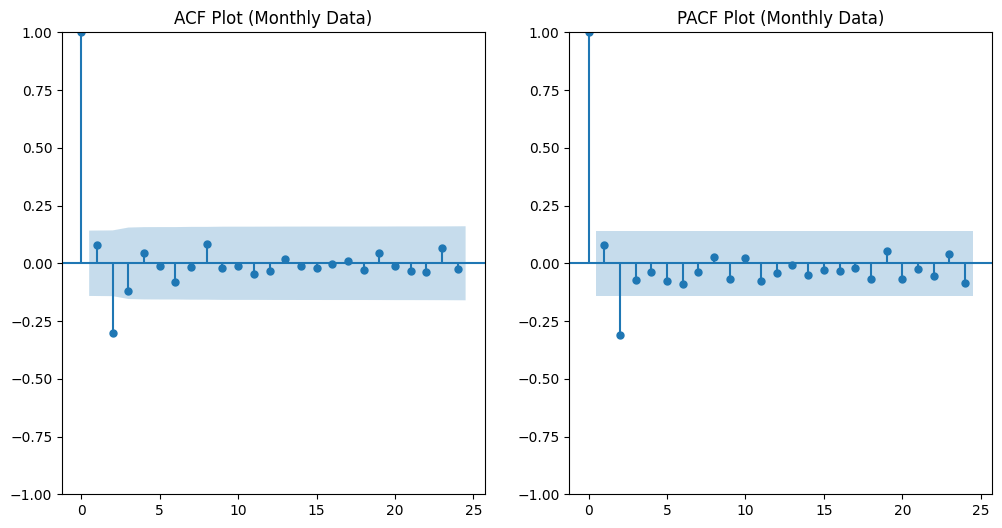

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\li

Best ARIMA model order for Monthly data: (3, 0, 1)
Best AIC for Monthly data: -807.5287874840184
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                  192
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 409.764
Date:                Thu, 19 Dec 2024   AIC                           -807.529
Time:                        13:01:54   BIC                           -787.984
Sample:                    02-28-2005   HQIC                          -799.613
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.002     -0.450      0.653      -0.004       0.002
ar.L1          0.9763      0.187  

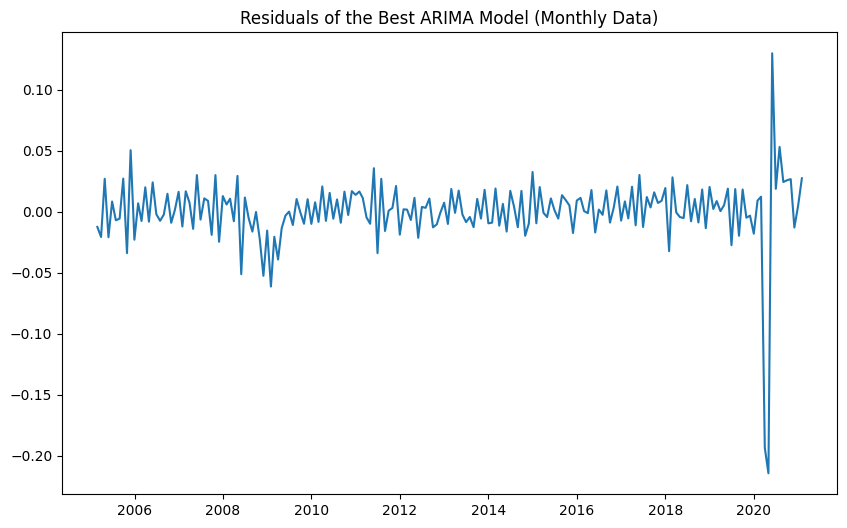

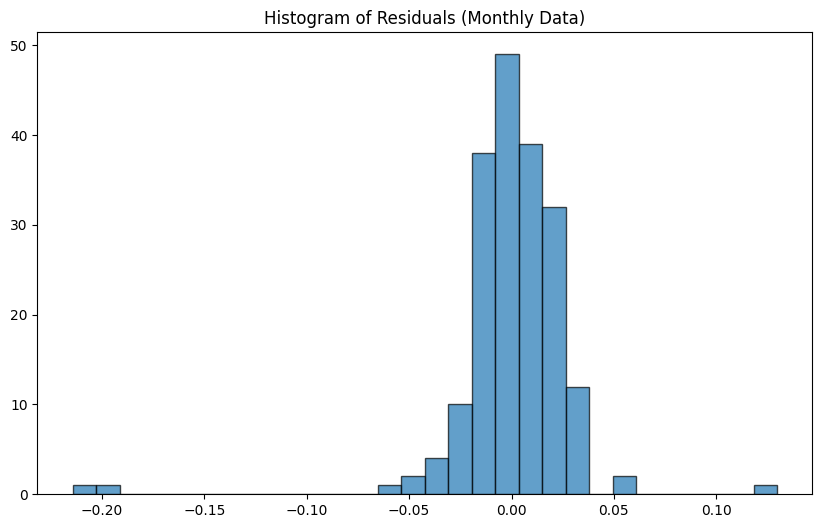

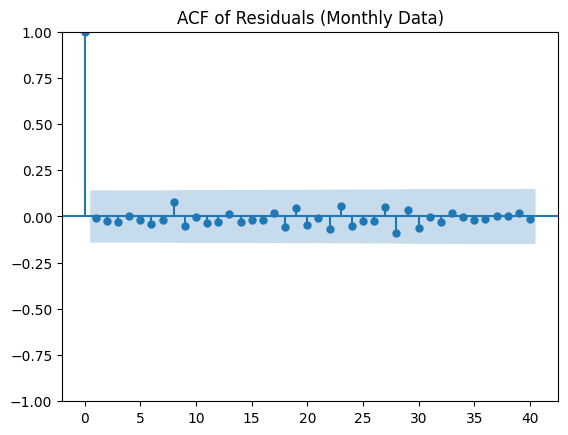

Forecast for next 12 periods for Monthly data:
2021-02-28    0.000971
2021-03-31   -0.010977
2021-04-30   -0.005656
2021-05-31   -0.001365
2021-06-30   -0.001556
2021-07-31   -0.002281
2021-08-31   -0.002058
2021-09-30   -0.001608
2021-10-31   -0.001397
2021-11-30   -0.001314
2021-12-31   -0.001223
2022-01-31   -0.001122
Freq: M, Name: predicted_mean, dtype: float64


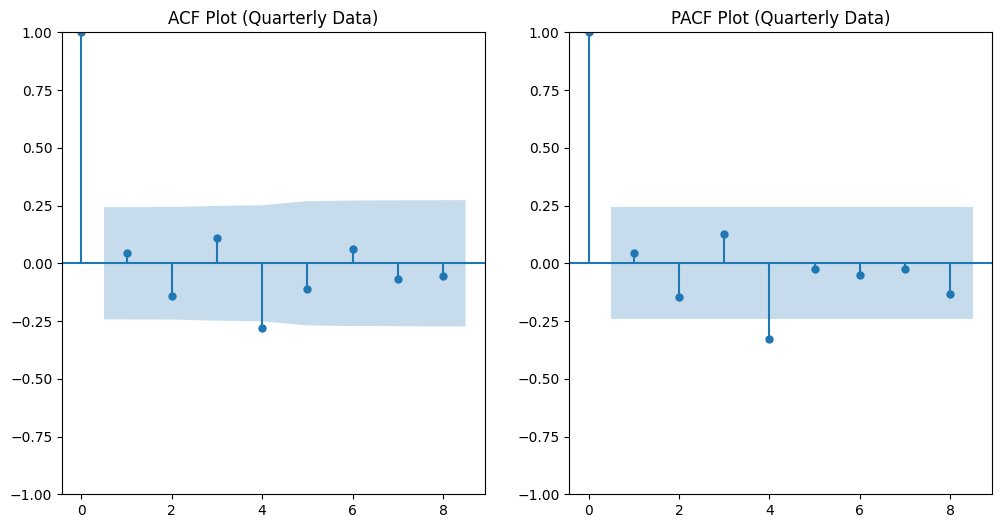

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anacon

Best ARIMA model order for Quarterly data: (2, 0, 2)
Best AIC for Quarterly data: -405.0953050718612
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   65
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 208.548
Date:                Thu, 19 Dec 2024   AIC                           -405.095
Time:                        13:02:02   BIC                           -392.049
Sample:                    03-31-2005   HQIC                          -399.948
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.515      0.607      -0.003       0.001
ar.L1          0.0074      0.2

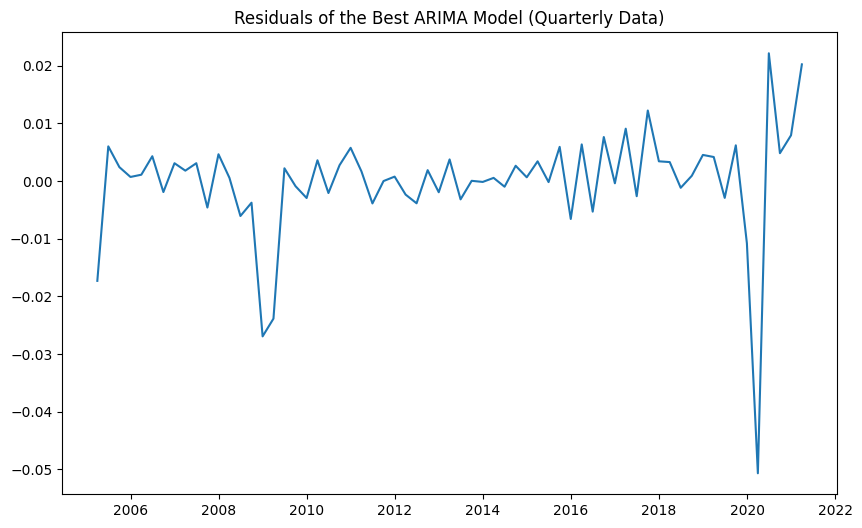

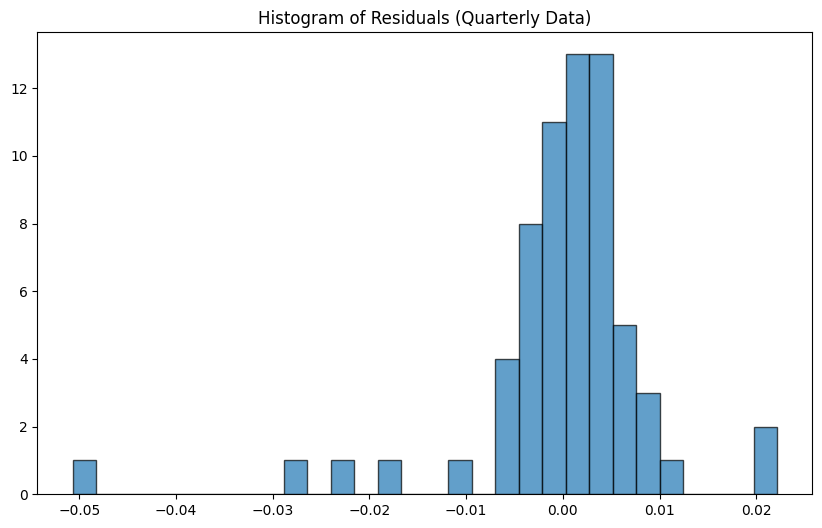

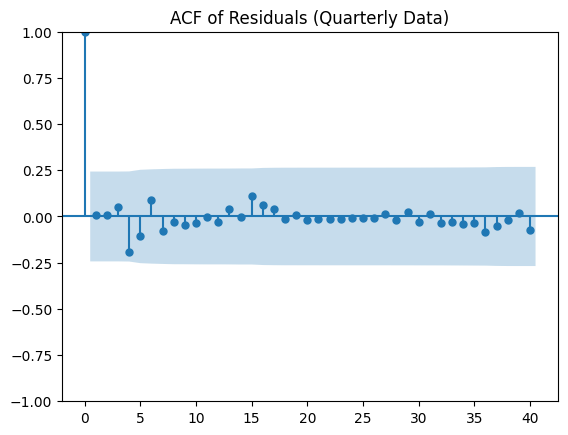

Forecast for next 12 periods for Quarterly data:
2021-06-30   -0.005232
2021-09-30   -0.002975
2021-12-31   -0.003131
2022-03-31   -0.001892
2022-06-30   -0.001968
2022-09-30   -0.001288
2022-12-31   -0.001325
2023-03-31   -0.000951
2023-06-30   -0.000969
2023-09-30   -0.000764
2023-12-31   -0.000772
2024-03-31   -0.000659
Freq: Q-DEC, Name: predicted_mean, dtype: float64


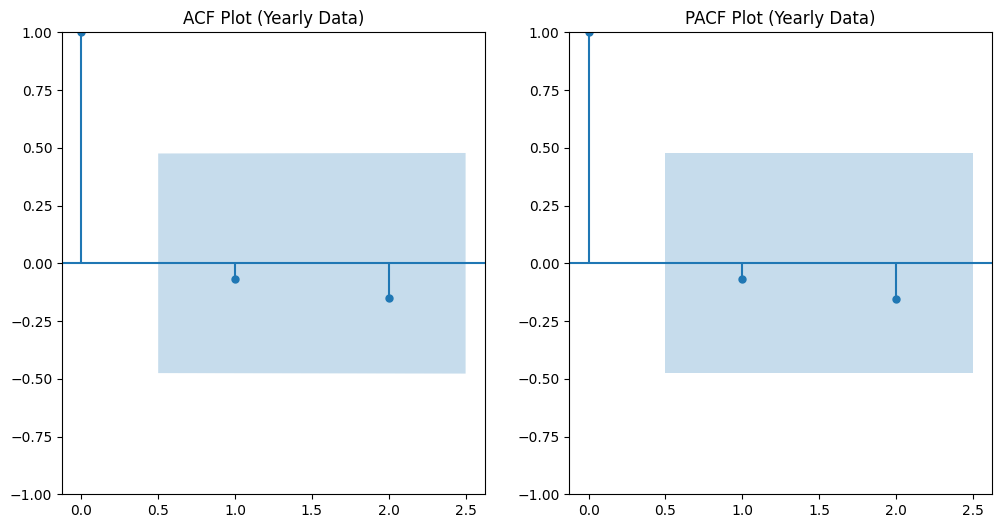

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs

Best ARIMA model order for Yearly data: (0, 0, 0)
Best AIC for Yearly data: -114.78112287711907
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   17
Model:                          ARIMA   Log Likelihood                  59.391
Date:                Thu, 19 Dec 2024   AIC                           -114.781
Time:                        13:02:09   BIC                           -113.115
Sample:                    12-31-2005   HQIC                          -114.615
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.003      0.277      0.782      -0.006       0.008
sigma2      5.401e-05   1.62e-05   

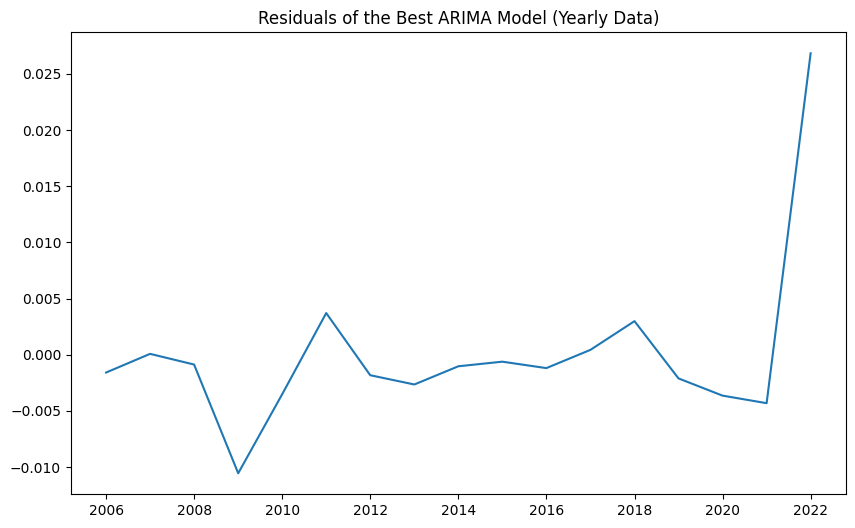

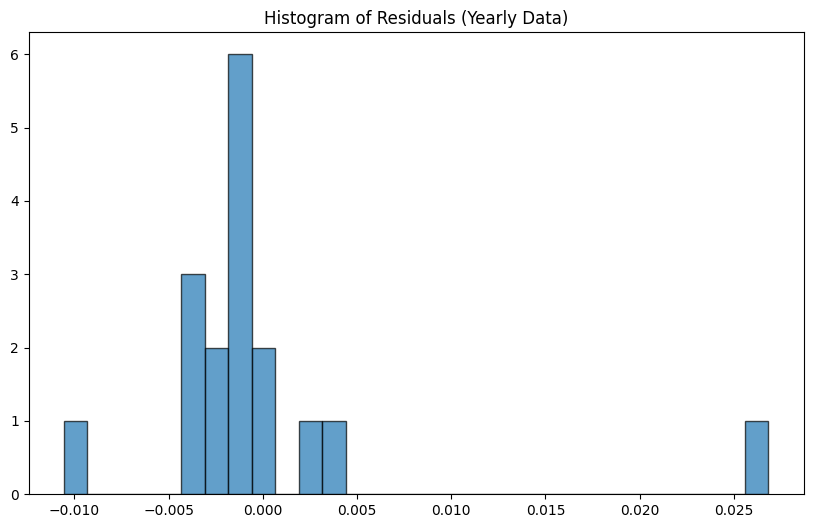

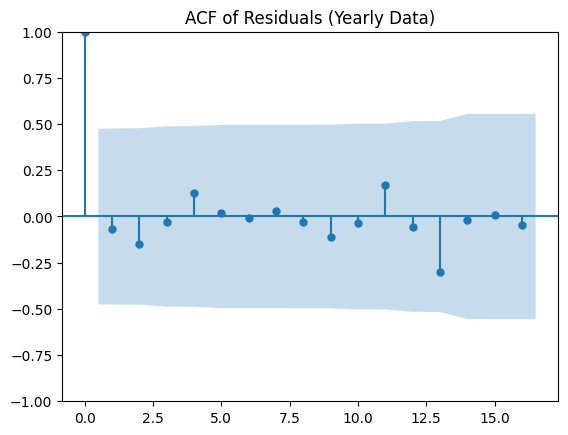

Forecast for next 12 periods for Yearly data:
2022-12-31    0.00095
2023-12-31    0.00095
2024-12-31    0.00095
2025-12-31    0.00095
2026-12-31    0.00095
2027-12-31    0.00095
2028-12-31    0.00095
2029-12-31    0.00095
2030-12-31    0.00095
2031-12-31    0.00095
2032-12-31    0.00095
2033-12-31    0.00095
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset (replace with your actual dataset loading process)
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx')

# Extract only 'Date' and 'Canada' columns
industrial_production_canada = industrial_production[['Date', 'France']]

# Ensure 'Date' is in datetime format, parse the 'Date' column with the 'MMM YYYY' format
industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')

# Set 'Date' as the index
industrial_production_canada.set_index('Date', inplace=True)

# Calculate the log returns (percentage change in the log of industrial production)
industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['France'] / industrial_production_canada['France'].shift(1))

# Drop the first row because it will have NaN due to the shift
industrial_production_canada.dropna(inplace=True)

# Resampling to monthly, quarterly, and yearly data
monthly_data = industrial_production_canada['Log_Return'].resample('M').mean()
quarterly_data = industrial_production_canada['Log_Return'].resample('Q').mean()
yearly_data = industrial_production_canada['Log_Return'].resample('A').mean()

# Function to plot ACF and PACF, fit ARIMA model, and select best model
def fit_arima_model(data, frequency_label, lags):
    # Plot ACF and PACF with specified lags
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title(f'ACF Plot ({frequency_label} Data)')

    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title(f'PACF Plot ({frequency_label} Data)')

    plt.show()

    # Initialize variables to store the best model and its AIC
    best_aic = float('inf')
    best_order = None
    best_model = None

    # Define ranges for p, d, q (adjust based on ACF/PACF plots and data)
    p_values = range(0, 4)  # AR order: 0 to 3
    d_values = range(0, 2)  # Differencing order: 0 or 1
    q_values = range(0, 4)  # MA order: 0 to 3

    # Loop over all combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the ARIMA model with the current combination of (p, d, q)
                    model = ARIMA(data, order=(p, d, q))
                    result = model.fit()

                    # Compare the AIC values
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_order = (p, d, q)
                        best_model = result
                except Exception as e:
                    # If fitting fails, skip this combination
                    continue

    # Output the best model and its AIC
    print(f"Best ARIMA model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())

    # Residual analysis to check if the model is well-fitted
    residuals = best_model.resid

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals of the Best ARIMA Model ({frequency_label} Data)')
    plt.show()

    # Plot histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of Residuals ({frequency_label} Data)')
    plt.show()

    # Dynamically adjust lags for residuals plot based on the length of the data
    max_lags = min(len(residuals) - 1, 40)  # Maximum lags is either 40 or the length of residuals minus 1

    # Check for autocorrelation in residuals
    plot_acf(residuals, lags=max_lags)
    plt.title(f'ACF of Residuals ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods (you can change the number of periods based on your requirements)
    forecast_steps = 12  # Number of periods to forecast
    forecast = best_model.forecast(steps=forecast_steps)

    # Output forecasted values
    print(f"Forecast for next {forecast_steps} periods for {frequency_label} data:")
    print(forecast)

# Fit ARIMA model for monthly data with 24 lags (changed from 40)
fit_arima_model(monthly_data, 'Monthly', lags=24)

# Fit ARIMA model for quarterly data with 8 lags
fit_arima_model(quarterly_data, 'Quarterly', lags=8)

# Fit ARIMA model for yearly data with 2 lags
fit_arima_model(yearly_data, 'Yearly', lags=2)


## ECM

## Italy 🇮🇹

In [28]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and parse the Italian stock index (FTSE MIB) and industrial production data
italy = pd.read_excel('Stock Index/ITALIAN_FTSE.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
italy.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Italian stock index
italy = italy[['Close']].rename(columns={'Close': 'Italian_Stock_Index'})

# Extract the Italian column for industrial production
industrial_production_it = industrial_production[['Italy']].rename(columns={'Italy': 'Industrial_Production'})

# Calculate the Industrial Production Log Change (log of ratio)
industrial_production_it['Industrial_Production_Log_Change'] = np.log(industrial_production_it['Industrial_Production'] / industrial_production_it['Industrial_Production'].shift(1))

# Calculate the Stock Log Return (log of ratio)
italy['Stock_Log_Return'] = np.log(italy['Italian_Stock_Index'] / italy['Italian_Stock_Index'].shift(1))

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Italian stock index (Log Return)
italy_monthly = resample_data(italy[['Stock_Log_Return']], freq='M')
italy_quarterly = resample_data(italy[['Stock_Log_Return']], freq='Q')
italy_yearly = resample_data(italy[['Stock_Log_Return']], freq='A')

# Resample industrial production log change (Industrial Production Log Change)
industrial_monthly = resample_data(industrial_production_it[['Industrial_Production_Log_Change']], freq='M')
industrial_quarterly = resample_data(industrial_production_it[['Industrial_Production_Log_Change']], freq='Q')
industrial_yearly = resample_data(industrial_production_it[['Industrial_Production_Log_Change']], freq='A')

# Combine monthly data
monthly_data = pd.concat([industrial_monthly, italy_monthly], axis=1)

# Combine quarterly data
quarterly_data = pd.concat([industrial_quarterly, italy_quarterly], axis=1)

# Combine yearly data
yearly_data = pd.concat([industrial_yearly, italy_yearly], axis=1)

# Drop missing values
monthly_data = monthly_data.dropna()
quarterly_data = quarterly_data.dropna()
yearly_data = yearly_data.dropna()

# Function to test different lag configurations and choose the one with the highest R-squared
def test_lags(data, dependent_var, independent_var_prefix, max_lags):
    best_r_squared = -np.inf
    best_lag = 0
    best_model = None
    
    for lag in range(1, max_lags + 1):
        # Add lags for the stock log return
        data_lagged = data.copy()
        for l in range(1, lag + 1):
            data_lagged[f'{independent_var_prefix}_lag_{l}'] = data[independent_var_prefix].shift(l)

        # Drop rows with NaN after adding lags
        data_lagged = data_lagged.dropna()

        # Define dependent and independent variables
        y = data_lagged[dependent_var]
        X = data_lagged[[f'{independent_var_prefix}_lag_{l}' for l in range(1, lag + 1)]]
        X = sm.add_constant(X)  # Add constant for intercept

        # Run OLS regression
        model = sm.OLS(y, X).fit()
        r_squared = model.rsquared

        # Check if this model has the highest R-squared
        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_lag = lag
            best_model = model

    return best_lag, best_r_squared, best_model

# Test different lags for monthly data (maximum 24 lags)
best_lag_monthly, best_r_squared_monthly, best_model_monthly = test_lags(
    monthly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=24
)

# Test different lags for quarterly data (maximum 8 lags)
best_lag_quarterly, best_r_squared_quarterly, best_model_quarterly = test_lags(
    quarterly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=8
)

# Test different lags for yearly data (maximum 2 lags)
best_lag_yearly, best_r_squared_yearly, best_model_yearly = test_lags(
    yearly_data, 
    dependent_var='Industrial_Production_Log_Change', 
    independent_var_prefix='Stock_Log_Return', 
    max_lags=2
)

# Print the best results for monthly, quarterly, and yearly data
print(f"\nBest Lag for Monthly Data: {best_lag_monthly} with R-squared: {best_r_squared_monthly}")
print(best_model_monthly.summary())

print(f"\nBest Lag for Quarterly Data: {best_lag_quarterly} with R-squared: {best_r_squared_quarterly}")
print(best_model_quarterly.summary())

print(f"\nBest Lag for Yearly Data: {best_lag_yearly} with R-squared: {best_r_squared_yearly}")
print(best_model_yearly.summary())


C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2083477326.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])



Best Lag for Monthly Data: 24 with R-squared: 0.17507684767450393
                                   OLS Regression Results                                   
Dep. Variable:     Industrial_Production_Log_Change   R-squared:                       0.175
Model:                                          OLS   Adj. R-squared:                 -0.003
Method:                               Least Squares   F-statistic:                    0.9816
Date:                              Thu, 19 Dec 2024   Prob (F-statistic):              0.496
Time:                                      13:02:11   Log-Likelihood:                 369.58
No. Observations:                               136   AIC:                            -689.2
Df Residuals:                                   111   BIC:                            -616.3
Df Model:                                        24                                         
Covariance Type:                          nonrobust                                         
   

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## ARIMA For Italy

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\674616137.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')
C:\Users\adity\AppData\Local\Temp\ipykernel_23160\674616137.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['Italy'] / industrial_production_canada['Italy'].shift(1))
C:\Users\adity\AppData\Local\Temp\ipyk

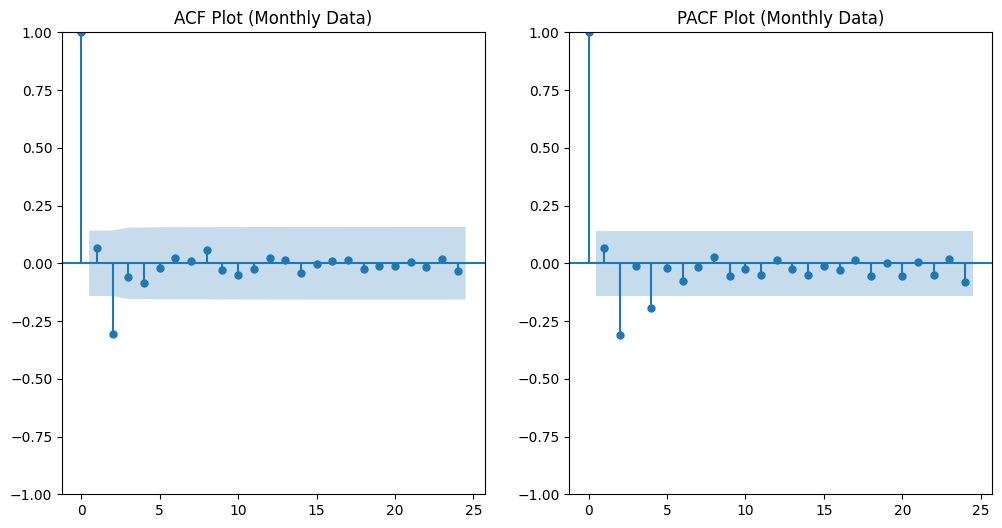

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\li

Best ARIMA model order for Monthly data: (1, 0, 3)
Best AIC for Monthly data: -672.7364413549667
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                  192
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 342.368
Date:                Thu, 19 Dec 2024   AIC                           -672.736
Time:                        13:02:23   BIC                           -653.191
Sample:                    02-28-2005   HQIC                          -664.821
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.001     -0.779      0.436      -0.004       0.002
ar.L1          0.8916      0.097  

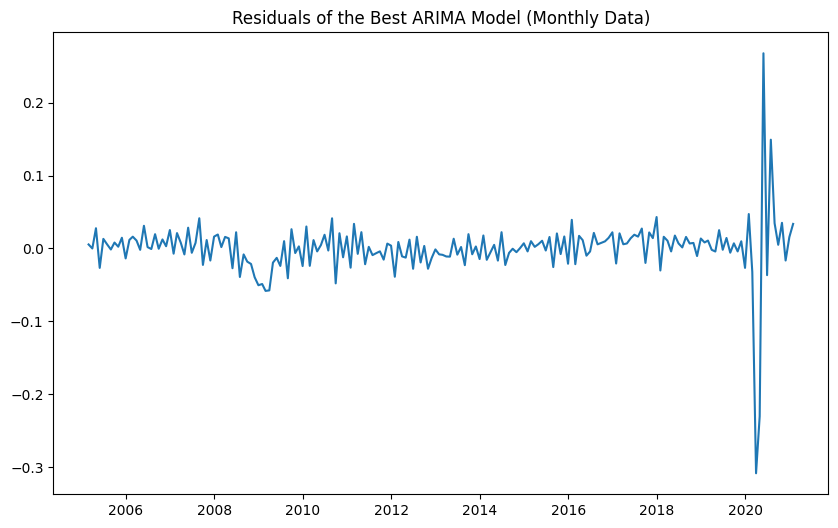

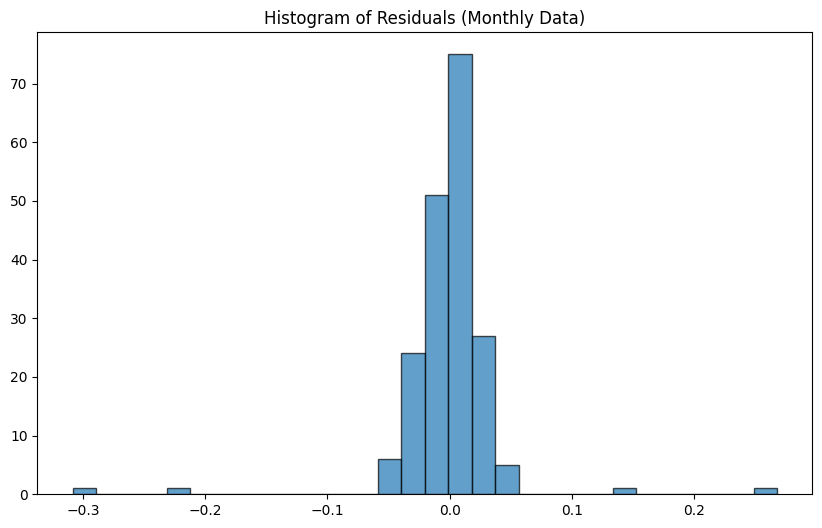

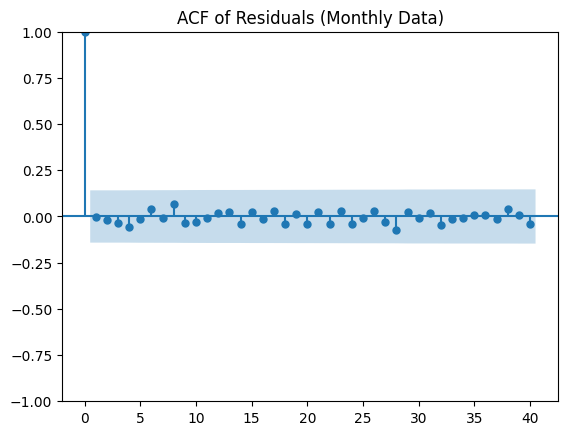

Forecast for next 12 periods for Monthly data:
2021-02-28   -0.006889
2021-03-31   -0.016312
2021-04-30   -0.004850
2021-05-31   -0.004449
2021-06-30   -0.004092
2021-07-31   -0.003773
2021-08-31   -0.003489
2021-09-30   -0.003236
2021-10-31   -0.003010
2021-11-30   -0.002809
2021-12-31   -0.002630
2022-01-31   -0.002470
Freq: M, Name: predicted_mean, dtype: float64


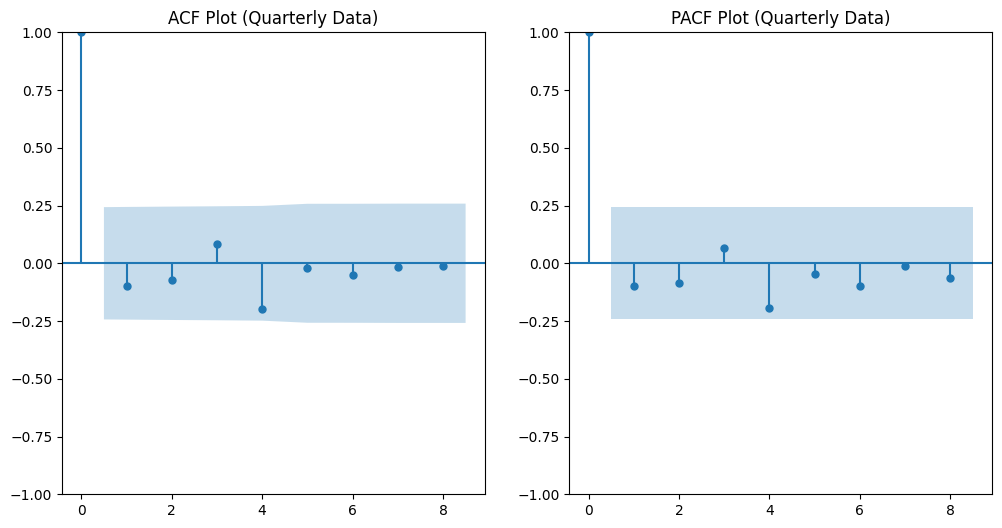

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\adity\anaconda3\envs\

Best ARIMA model order for Quarterly data: (0, 0, 0)
Best AIC for Quarterly data: -327.4447917693546
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   65
Model:                          ARIMA   Log Likelihood                 165.722
Date:                Thu, 19 Dec 2024   AIC                           -327.445
Time:                        13:02:31   BIC                           -323.096
Sample:                    03-31-2005   HQIC                          -325.729
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.003     -0.138      0.890      -0.005       0.005
sigma2         0.0004   2.39e-

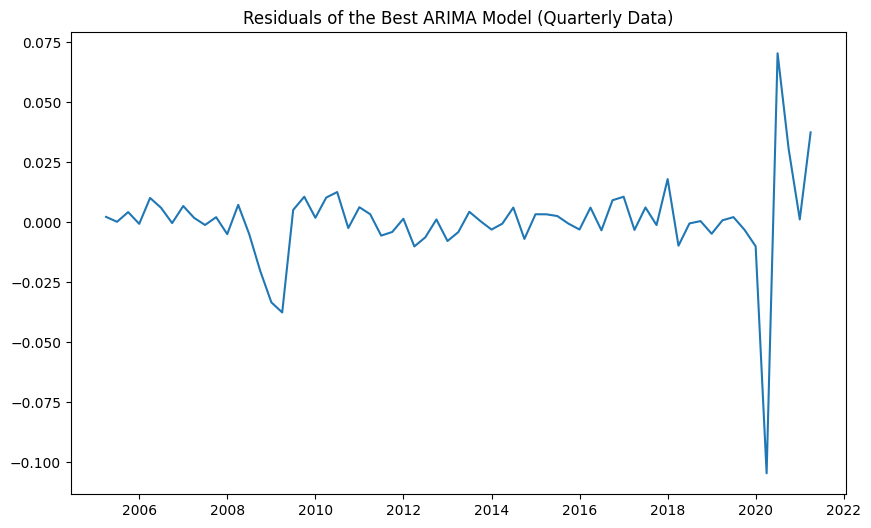

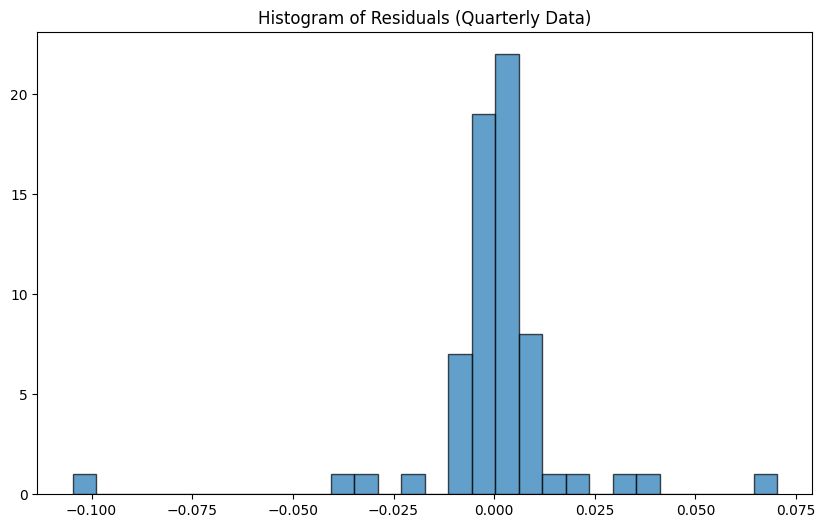

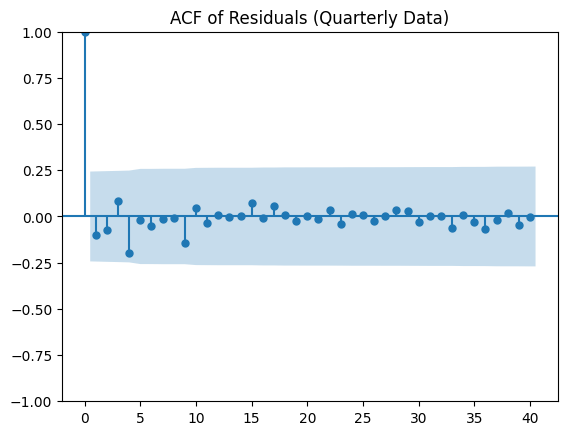

Forecast for next 12 periods for Quarterly data:
2021-06-30   -0.000362
2021-09-30   -0.000362
2021-12-31   -0.000362
2022-03-31   -0.000362
2022-06-30   -0.000362
2022-09-30   -0.000362
2022-12-31   -0.000362
2023-03-31   -0.000362
2023-06-30   -0.000362
2023-09-30   -0.000362
2023-12-31   -0.000362
2024-03-31   -0.000362
Freq: Q-DEC, Name: predicted_mean, dtype: float64


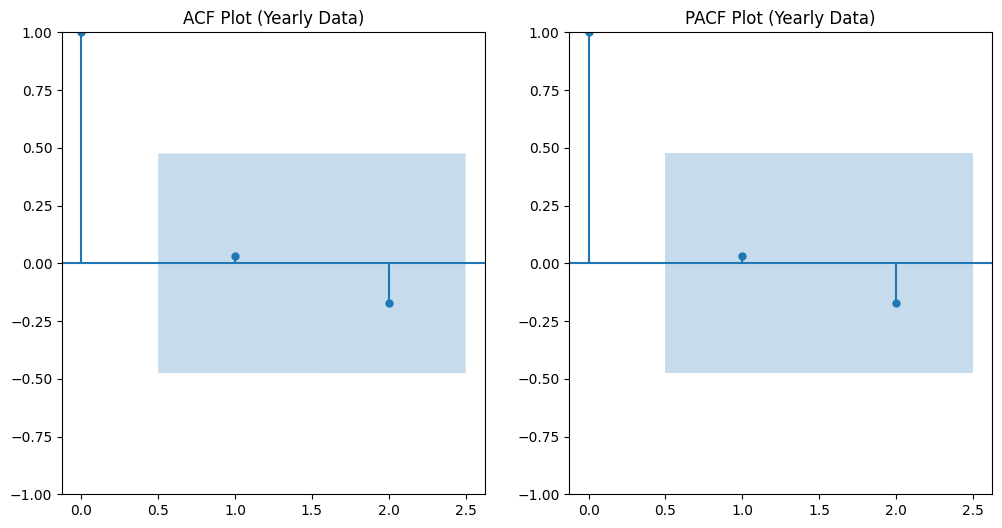

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\adity\anaconda3\envs\rasax\li

Best ARIMA model order for Yearly data: (0, 0, 0)
Best AIC for Yearly data: -104.03860682530586
                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                   17
Model:                          ARIMA   Log Likelihood                  54.019
Date:                Thu, 19 Dec 2024   AIC                           -104.039
Time:                        13:02:39   BIC                           -102.372
Sample:                    12-31-2005   HQIC                          -103.873
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.004      0.303      0.762      -0.007       0.010
sigma2         0.0001   2.92e-05   

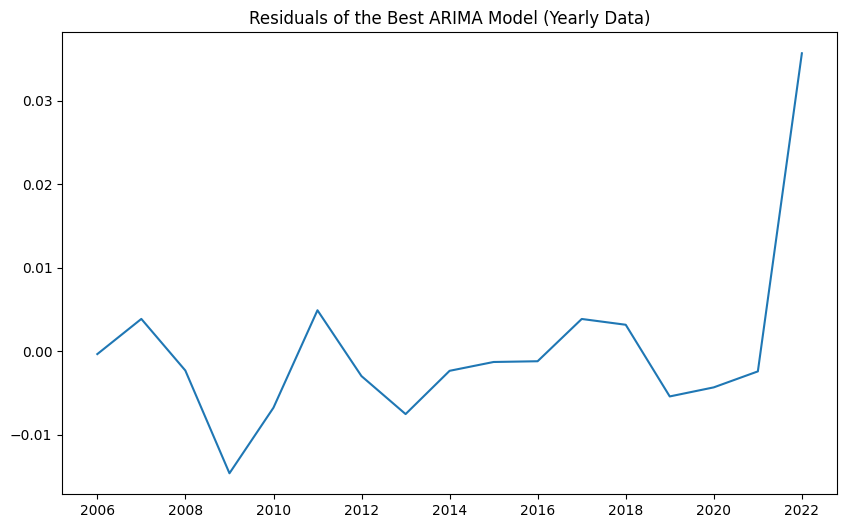

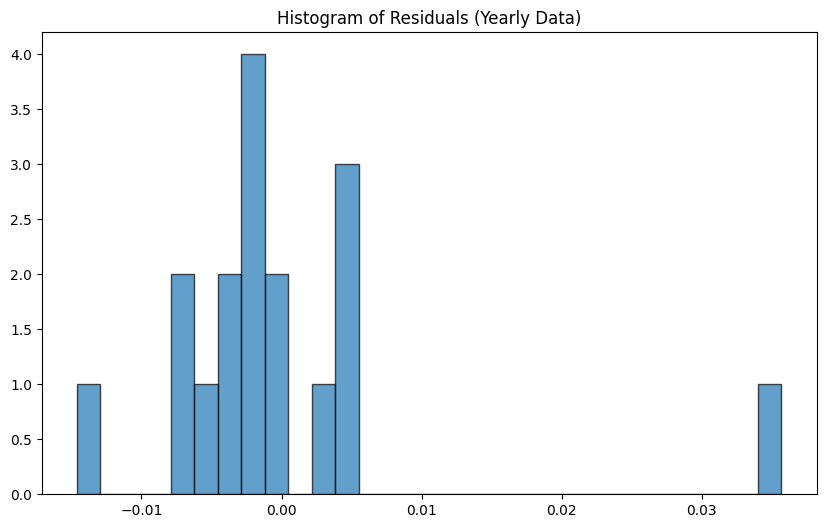

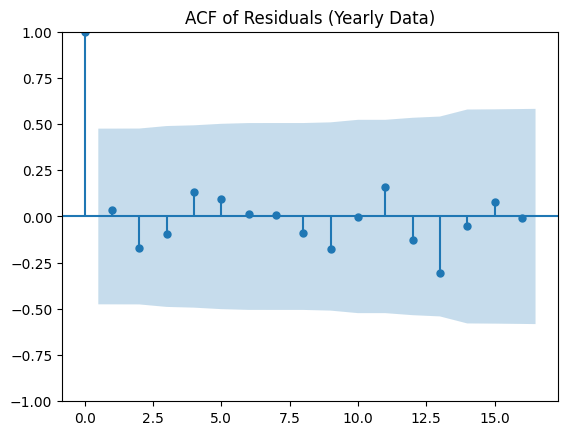

Forecast for next 12 periods for Yearly data:
2022-12-31    0.001281
2023-12-31    0.001281
2024-12-31    0.001281
2025-12-31    0.001281
2026-12-31    0.001281
2027-12-31    0.001281
2028-12-31    0.001281
2029-12-31    0.001281
2030-12-31    0.001281
2031-12-31    0.001281
2032-12-31    0.001281
2033-12-31    0.001281
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset (replace with your actual dataset loading process)
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx')

# Extract only 'Date' and 'Canada' columns
industrial_production_canada = industrial_production[['Date', 'Italy']]

# Ensure 'Date' is in datetime format, parse the 'Date' column with the 'MMM YYYY' format
industrial_production_canada['Date'] = pd.to_datetime(industrial_production_canada['Date'], format='%b %Y')

# Set 'Date' as the index
industrial_production_canada.set_index('Date', inplace=True)

# Calculate the log returns (percentage change in the log of industrial production)
industrial_production_canada['Log_Return'] = np.log(industrial_production_canada['Italy'] / industrial_production_canada['Italy'].shift(1))

# Drop the first row because it will have NaN due to the shift
industrial_production_canada.dropna(inplace=True)

# Resampling to monthly, quarterly, and yearly data
monthly_data = industrial_production_canada['Log_Return'].resample('M').mean()
quarterly_data = industrial_production_canada['Log_Return'].resample('Q').mean()
yearly_data = industrial_production_canada['Log_Return'].resample('A').mean()

# Function to plot ACF and PACF, fit ARIMA model, and select best model
def fit_arima_model(data, frequency_label, lags):
    # Plot ACF and PACF with specified lags
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(data, lags=lags, ax=plt.gca())
    plt.title(f'ACF Plot ({frequency_label} Data)')

    plt.subplot(122)
    plot_pacf(data, lags=lags, ax=plt.gca())
    plt.title(f'PACF Plot ({frequency_label} Data)')

    plt.show()

    # Initialize variables to store the best model and its AIC
    best_aic = float('inf')
    best_order = None
    best_model = None

    # Define ranges for p, d, q (adjust based on ACF/PACF plots and data)
    p_values = range(0, 4)  # AR order: 0 to 3
    d_values = range(0, 2)  # Differencing order: 0 or 1
    q_values = range(0, 4)  # MA order: 0 to 3

    # Loop over all combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit the ARIMA model with the current combination of (p, d, q)
                    model = ARIMA(data, order=(p, d, q))
                    result = model.fit()

                    # Compare the AIC values
                    if result.aic < best_aic:
                        best_aic = result.aic
                        best_order = (p, d, q)
                        best_model = result
                except Exception as e:
                    # If fitting fails, skip this combination
                    continue

    # Output the best model and its AIC
    print(f"Best ARIMA model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())

    # Residual analysis to check if the model is well-fitted
    residuals = best_model.resid

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals)
    plt.title(f'Residuals of the Best ARIMA Model ({frequency_label} Data)')
    plt.show()

    # Plot histogram of residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of Residuals ({frequency_label} Data)')
    plt.show()

    # Dynamically adjust lags for residuals plot based on the length of the data
    max_lags = min(len(residuals) - 1, 40)  # Maximum lags is either 40 or the length of residuals minus 1

    # Check for autocorrelation in residuals
    plot_acf(residuals, lags=max_lags)
    plt.title(f'ACF of Residuals ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods (you can change the number of periods based on your requirements)
    forecast_steps = 12  # Number of periods to forecast
    forecast = best_model.forecast(steps=forecast_steps)

    # Output forecasted values
    print(f"Forecast for next {forecast_steps} periods for {frequency_label} data:")
    print(forecast)

# Fit ARIMA model for monthly data with 24 lags (changed from 40)
fit_arima_model(monthly_data, 'Monthly', lags=24)



Part -3

## RESIDUALS DIAGNOSTIC AND SOLUTIONS

canada

In [48]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from scipy.stats import jarque_bera  # Import the Jarque-Bera normality test

# Load and parse the Canadian stock index and industrial production data
canadian = pd.read_excel('Stock Index/Canadian_snp_tsx.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
canadian.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Canadian stock index
canadian = canadian[['Close']].rename(columns={'Close': 'Canadian_Stock_Index'})

# Extract the Canada column for industrial production
industrial_production_canada = industrial_production[['Canada']].rename(columns={'Canada': 'Industrial_Production'})

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Canadian stock index
canadian_monthly = resample_data(canadian, freq='M')
canadian_quarterly = resample_data(canadian, freq='Q')
canadian_yearly = resample_data(canadian, freq='A')  # 'A' stands for annual frequency

# Resample industrial production for Canada
industrial_monthly = resample_data(industrial_production_canada, freq='M')
industrial_quarterly = resample_data(industrial_production_canada, freq='Q')
industrial_yearly = resample_data(industrial_production_canada, freq='A')

# Function to perform residual diagnostics and Ramsey RESET test
def residual_diagnostics(stock_data, production_data, n_lags=3):
    # Merge the datasets on Date
    merged_data = pd.merge(stock_data, production_data, on='Date', suffixes=('_stock', '_prod'))
    
    # Create lagged variables for stock returns
    for lag in range(1, n_lags + 1):
        merged_data[f'Canadian_Stock_Index_lag_{lag}'] = merged_data['Canadian_Stock_Index'].shift(lag)
    
    # Drop NaN values after lagging
    merged_data = merged_data.dropna()
    
    # Check if there are enough data points
    if len(merged_data) < 3:
        print("Not enough data after merging and lagging.")
        return
    
    # Define dependent and independent variables
    y = merged_data['Industrial_Production']
    X = merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]]
    X = sm.add_constant(X)  # Add constant for intercept
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Extract residuals
    residuals = model.resid
    
    # Check if residuals have enough data points
    if len(residuals) < 3:
        print("Residuals have fewer than 3 data points. Skipping diagnostic tests.")
        return
    
    # Manually implement Ramsey RESET test by adding fitted values' powers
    print("\nManually Implemented Ramsey RESET Test:")
    fitted_values = model.fittedvalues
    X_reset = X.copy()
    X_reset['fitted_squared'] = fitted_values**2
    X_reset['fitted_cubed'] = fitted_values**3
    
    # Fit the model again with the new terms
    model_reset = sm.OLS(y, X_reset).fit()
    
    # Compare the new model's coefficients (especially the new terms)
    print(f"F-statistic: {model_reset.fvalue:.4f}, p-value: {model_reset.f_pvalue:.4f}")
    # if model_reset.f_pvalue > 0.10:
    #     print("Model specification appears correct (no misspecification).")
    # else:
    #     print("Model specification may be incorrect (possible misspecification).")
    
    # Serial correlation test
    print("\nSerial Correlation Test (Ljung-Box):")
    ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(ljung_box_test)
    # if ljung_box_test['lb_pvalue'].iloc[0] > 0.10:
    #     print("No significant serial correlation detected.")
    # else:
    #     print("Significant serial correlation detected.")
    
    # Heteroskedasticity test
    print("\nHeteroskedasticity Test (Breusch-Pagan):")
    exog = sm.add_constant(merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]])
    bp_test = het_breuschpagan(residuals, exog)
    print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
    # if bp_test[1] > 0.10:
    #     print("No significant heteroskedasticity detected.")
    # else:
    #     print("Significant heteroskedasticity detected.")
    
    # Normality test (Jarque-Bera)
    print("\nNormality Test (Jarque-Bera):")
    jb_stat, jb_p_value = jarque_bera(residuals)
    print(f"Jarque-Bera Statistic: {jb_stat:.4f}, p-value: {jb_p_value:.4f}")
    # if jb_p_value > 0.10:
    #     print("Residuals appear to follow a normal distribution.")
    # else:
    #     print("Residuals do not follow a normal distribution.")

# Perform diagnostics for monthly, quarterly, and yearly data
print("-------- Monthly Data Residual Diagnostics --------")
residual_diagnostics(canadian_monthly, industrial_monthly, n_lags=24)

print("\n-------- Quarterly Data Residual Diagnostics --------")
residual_diagnostics(canadian_quarterly, industrial_quarterly, n_lags=8)

print("\n-------- Yearly Data Residual Diagnostics --------")
residual_diagnostics(canadian_yearly, industrial_yearly, n_lags=2)


C:\Users\adity\AppData\Local\Temp\ipykernel_23160\3448042795.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])


-------- Monthly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 3.3741, p-value: 0.0000

Serial Correlation Test (Ljung-Box):
       lb_stat      lb_pvalue
10  734.188299  2.862070e-151

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 20.7828, p-value: 0.6515

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 1.1330, p-value: 0.5675

-------- Quarterly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 3.1249, p-value: 0.0057

Serial Correlation Test (Ljung-Box):
      lb_stat     lb_pvalue
10  77.545456  1.517222e-12

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 5.8207, p-value: 0.6673

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 0.1530, p-value: 0.9264

-------- Yearly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 1.7593, p-value: 0.2210

Serial Correlation Test (Ljung-Box):
      lb_stat  lb_pvalue
10  32.908389   0.000282

Heteroske

USA


In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from scipy.stats import jarque_bera  # Import the Jarque-Bera normality test

# Load and parse the Canadian stock index and industrial production data
canadian = pd.read_excel('Stock Index/USA Nasdaq.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
canadian.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Canadian stock index
canadian = canadian[['Close']].rename(columns={'Close': 'Canadian_Stock_Index'})

# Extract the Canada column for industrial production
industrial_production_canada = industrial_production[['USA']].rename(columns={'USA': 'Industrial_Production'})

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Canadian stock index
canadian_monthly = resample_data(canadian, freq='M')
canadian_quarterly = resample_data(canadian, freq='Q')
canadian_yearly = resample_data(canadian, freq='A')  # 'A' stands for annual frequency

# Resample industrial production for Canada
industrial_monthly = resample_data(industrial_production_canada, freq='M')
industrial_quarterly = resample_data(industrial_production_canada, freq='Q')
industrial_yearly = resample_data(industrial_production_canada, freq='A')

# Function to perform residual diagnostics and Ramsey RESET test
def residual_diagnostics(stock_data, production_data, n_lags=3):
    # Merge the datasets on Date
    merged_data = pd.merge(stock_data, production_data, on='Date', suffixes=('_stock', '_prod'))
    
    # Create lagged variables for stock returns
    for lag in range(1, n_lags + 1):
        merged_data[f'Canadian_Stock_Index_lag_{lag}'] = merged_data['Canadian_Stock_Index'].shift(lag)
    
    # Drop NaN values after lagging
    merged_data = merged_data.dropna()
    
    # Check if there are enough data points
    if len(merged_data) < 3:
        print("Not enough data after merging and lagging.")
        return
    
    # Define dependent and independent variables
    y = merged_data['Industrial_Production']
    X = merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]]
    X = sm.add_constant(X)  # Add constant for intercept
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Extract residuals
    residuals = model.resid
    
    # Check if residuals have enough data points
    if len(residuals) < 3:
        print("Residuals have fewer than 3 data points. Skipping diagnostic tests.")
        return
    
    # Manually implement Ramsey RESET test by adding fitted values' powers
    print("\nManually Implemented Ramsey RESET Test:")
    fitted_values = model.fittedvalues
    X_reset = X.copy()
    X_reset['fitted_squared'] = fitted_values**2
    X_reset['fitted_cubed'] = fitted_values**3
    
    # Fit the model again with the new terms
    model_reset = sm.OLS(y, X_reset).fit()
    
    # Compare the new model's coefficients (especially the new terms)
    print(f"F-statistic: {model_reset.fvalue:.4f}, p-value: {model_reset.f_pvalue:.4f}")
    # if model_reset.f_pvalue > 0.10:
    #     print("Model specification appears correct (no misspecification).")
    # else:
    #     print("Model specification may be incorrect (possible misspecification).")
    
    # Serial correlation test
    print("\nSerial Correlation Test (Ljung-Box):")
    ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(ljung_box_test)
    # if ljung_box_test['lb_pvalue'].iloc[0] > 0.10:
    #     print("No significant serial correlation detected.")
    # else:
    #     print("Significant serial correlation detected.")
    
    # Heteroskedasticity test
    print("\nHeteroskedasticity Test (Breusch-Pagan):")
    exog = sm.add_constant(merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]])
    bp_test = het_breuschpagan(residuals, exog)
    print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
    # if bp_test[1] > 0.10:
    #     print("No significant heteroskedasticity detected.")
    # else:
    #     print("Significant heteroskedasticity detected.")
    
    # Normality test (Jarque-Bera)
    print("\nNormality Test (Jarque-Bera):")
    jb_stat, jb_p_value = jarque_bera(residuals)
    print(f"Jarque-Bera Statistic: {jb_stat:.4f}, p-value: {jb_p_value:.4f}")
    # if jb_p_value > 0.10:
    #     print("Residuals appear to follow a normal distribution.")
    # else:
    #     print("Residuals do not follow a normal distribution.")

# Perform diagnostics for monthly, quarterly, and yearly data
print("-------- Monthly Data Residual Diagnostics --------")
residual_diagnostics(canadian_monthly, industrial_monthly, n_lags=24)

print("\n-------- Quarterly Data Residual Diagnostics --------")
residual_diagnostics(canadian_quarterly, industrial_quarterly, n_lags=8)

print("\n-------- Yearly Data Residual Diagnostics --------")
residual_diagnostics(canadian_yearly, industrial_yearly, n_lags=2)


C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2405822758.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])


-------- Monthly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 3.4032, p-value: 0.0000

Serial Correlation Test (Ljung-Box):
       lb_stat     lb_pvalue
10  123.440056  1.012564e-21

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 36.3153, p-value: 0.0511

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 124.6595, p-value: 0.0000

-------- Quarterly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 0.8256, p-value: 0.6082

Serial Correlation Test (Ljung-Box):
      lb_stat  lb_pvalue
10  16.967782    0.07508

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 5.9542, p-value: 0.6524

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 43.4761, p-value: 0.0000

-------- Yearly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 0.4527, p-value: 0.7686

Serial Correlation Test (Ljung-Box):
      lb_stat  lb_pvalue
10  11.276863   0.336359

Heteroskedasti

In [31]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan

# Load and parse the US stock index and industrial production data
us_stock_index = pd.read_excel('Stock Index/USA Nasdaq.xlsx', parse_dates=['Date'])
industrial_production_us = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
us_stock_index.set_index('Date', inplace=True)
industrial_production_us.set_index('Date', inplace=True)

# Use the 'Close' column for the US stock index
us_stock_index = us_stock_index[['Close']].rename(columns={'Close': 'US_Stock_Index'})

# Extract the US column for industrial production
industrial_production_us = industrial_production_us[['USA']].rename(columns={'USA': 'Industrial_Production'})

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample US stock index
us_stock_monthly = resample_data(us_stock_index, freq='M')
us_stock_quarterly = resample_data(us_stock_index, freq='Q')
us_stock_yearly = resample_data(us_stock_index, freq='A')  # 'A' stands for annual frequency

# Resample US industrial production
industrial_monthly_us = resample_data(industrial_production_us, freq='M')
industrial_quarterly_us = resample_data(industrial_production_us, freq='Q')
industrial_yearly_us = resample_data(industrial_production_us, freq='A')

# Function to perform residual diagnostics and Ramsey RESET test
def residual_diagnostics(stock_data, production_data, n_lags=3):
    # Merge the datasets on Date
    merged_data = pd.merge(stock_data, production_data, on='Date', suffixes=('_stock', '_prod'))
    
    # Create lagged variables for stock returns
    for lag in range(1, n_lags + 1):
        merged_data[f'US_Stock_Index_lag_{lag}'] = merged_data['US_Stock_Index'].shift(lag)
    
    # Drop NaN values after lagging
    merged_data = merged_data.dropna()
    
    # Check if there are enough data points
    if len(merged_data) < 3:
        print("Not enough data after merging and lagging.")
        return
    
    # Define dependent and independent variables
    y = merged_data['Industrial_Production']
    X = merged_data[[f'US_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]]
    X = sm.add_constant(X)  # Add constant for intercept
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Extract residuals
    residuals = model.resid
    
    # Check if residuals have enough data points
    if len(residuals) < 3:
        print("Residuals have fewer than 3 data points. Skipping diagnostic tests.")
        return
    
    # Manually implement Ramsey RESET test by adding fitted values' powers
    print("\nManually Implemented Ramsey RESET Test:")
    fitted_values = model.fittedvalues
    X_reset = X.copy()
    X_reset['fitted_squared'] = fitted_values**2
    X_reset['fitted_cubed'] = fitted_values**3
    
    # Fit the model again with the new terms
    model_reset = sm.OLS(y, X_reset).fit()
    
    # Compare the new model's coefficients (especially the new terms)
    print(f"F-statistic: {model_reset.fvalue:.4f}, p-value: {model_reset.f_pvalue:.4f}")
    if model_reset.f_pvalue > 0.05:
        print("Model specification appears correct (no misspecification).")
    else:
        print("Model specification may be incorrect (possible misspecification).")
    
    # Serial correlation test
    print("\nSerial Correlation Test (Ljung-Box):")
    ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(ljung_box_test)
    if ljung_box_test['lb_pvalue'].iloc[0] > 0.05:
        print("No significant serial correlation detected.")
    else:
        print("Significant serial correlation detected.")
    
    # Heteroskedasticity test
    print("\nHeteroskedasticity Test (Breusch-Pagan):")
    exog = sm.add_constant(merged_data[[f'US_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]])
    bp_test = het_breuschpagan(residuals, exog)
    print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
    if bp_test[1] > 0.05:
        print("No significant heteroskedasticity detected.")
    else:
        print("Significant heteroskedasticity detected.")

# Perform diagnostics for monthly, quarterly, and yearly data
print("-------- Monthly Data Residual Diagnostics --------")
residual_diagnostics(us_stock_monthly, industrial_monthly_us, n_lags=24)

print("\n-------- Quarterly Data Residual Diagnostics --------")
residual_diagnostics(us_stock_quarterly, industrial_quarterly_us, n_lags=8)

print("\n-------- Yearly Data Residual Diagnostics --------")
residual_diagnostics(us_stock_yearly, industrial_yearly_us, n_lags=2)


-------- Monthly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 3.4032, p-value: 0.0000
Model specification may be incorrect (possible misspecification).

Serial Correlation Test (Ljung-Box):
       lb_stat     lb_pvalue
10  123.440056  1.012564e-21
Significant serial correlation detected.

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 36.3153, p-value: 0.0511
No significant heteroskedasticity detected.

-------- Quarterly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 0.8256, p-value: 0.6082
Model specification appears correct (no misspecification).

Serial Correlation Test (Ljung-Box):
      lb_stat  lb_pvalue
10  16.967782    0.07508
No significant serial correlation detected.

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 5.9542, p-value: 0.6524
No significant heteroskedasticity detected.

-------- Yearly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\3045136564.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production_us = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])


Japan

In [53]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from scipy.stats import shapiro, jarque_bera

# Load data
japan_stock = pd.read_excel('Stock Index/Nikkei 225 Historical Data.xlsx')
japan_industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index and properly converted to datetime
japan_stock['Date'] = pd.to_datetime(japan_stock['Date'])
japan_industrial_production['Date'] = pd.to_datetime(japan_industrial_production['Date'])

# Set the 'Date' as the index
japan_stock.set_index('Date', inplace=True)
japan_industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Japan stock index
japan_stock = japan_stock[['Close']].rename(columns={'Close': 'Japan_Stock_Index'})

# Extract the Japan column for industrial production
japan_industrial_production = japan_industrial_production[['Japan']].rename(columns={'Japan': 'Industrial_Production'})

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Japan stock index
japan_stock_monthly = resample_data(japan_stock, freq='M')
japan_stock_quarterly = resample_data(japan_stock, freq='Q')
japan_stock_yearly = resample_data(japan_stock, freq='A')  # 'A' stands for annual frequency

# Resample industrial production for Japan
japan_ip_monthly = resample_data(japan_industrial_production, freq='M')
japan_ip_quarterly = resample_data(japan_industrial_production, freq='Q')
japan_ip_yearly = resample_data(japan_industrial_production, freq='A')

# Function to perform residual diagnostics
def residual_diagnostics(stock_data, production_data, n_lags=10):
    # Merge the datasets on Date
    merged_data = pd.merge(stock_data, production_data, left_index=True, right_index=True, suffixes=('_stock', '_prod'))
    
    # Create lagged variables for stock returns
    for lag in range(1, n_lags + 1):
        merged_data[f'Japan_Stock_Index_lag_{lag}'] = merged_data['Japan_Stock_Index'].shift(lag)
    
    # Drop NaN values after lagging
    merged_data = merged_data.dropna()
    
    # Define dependent and independent variables
    y = merged_data['Industrial_Production']
    X = merged_data[[f'Japan_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]]
    X = sm.add_constant(X)  # Add constant for intercept
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Extract residuals
    residuals = model.resid
    
    # Normality test (Shapiro-Wilk)
    print("\nNormality Test (Shapiro-Wilk):")
    shapiro_test = shapiro(residuals)
    print(f"Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")
    
    # Jarque-Bera Test for Normality
    print("\nNormality Test (Jarque-Bera):")
    jb_test = jarque_bera(residuals)
    print(f"Statistic: {jb_test[0]:.4f}, p-value: {jb_test[1]:.4f}")
    
    # Serial correlation test (Ljung-Box) – Final Outcome
    print("\nSerial Correlation Test (Ljung-Box):")
    ljung_box_test = acorr_ljungbox(residuals, lags=n_lags)
    overall_p_value = ljung_box_test['lb_pvalue'].iloc[-1]  # Use the final p-value
    print(f"Final Ljung-Box p-value: {overall_p_value:.4f}")
    
    # Heteroskedasticity test (Breusch-Pagan)
    print("\nHeteroskedasticity Test (Breusch-Pagan):")
    exog = sm.add_constant(merged_data[[f'Japan_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]])
    bp_test = het_breuschpagan(residuals, exog)
    print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")

# Perform diagnostics for monthly, quarterly, and yearly data
print("-------- Monthly Data Residual Diagnostics for Japan --------")
residual_diagnostics(japan_stock_monthly, japan_ip_monthly, n_lags=20)

print("\n-------- Quarterly Data Residual Diagnostics for Japan --------")
residual_diagnostics(japan_stock_quarterly, japan_ip_quarterly, n_lags=8)

print("\n-------- Yearly Data Residual Diagnostics for Japan --------")
residual_diagnostics(japan_stock_yearly, japan_ip_yearly, n_lags=3)


-------- Monthly Data Residual Diagnostics for Japan --------

Normality Test (Shapiro-Wilk):
Statistic: 0.9764, p-value: 0.6554

Normality Test (Jarque-Bera):
Statistic: 0.8680, p-value: 0.6479

Serial Correlation Test (Ljung-Box):
Final Ljung-Box p-value: 0.0003

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 22.4375, p-value: 0.3173

-------- Quarterly Data Residual Diagnostics for Japan --------

Normality Test (Shapiro-Wilk):
Statistic: 0.9501, p-value: 0.6383

Normality Test (Jarque-Bera):
Statistic: 0.7444, p-value: 0.6892

Serial Correlation Test (Ljung-Box):
Final Ljung-Box p-value: 0.2977

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 5.4211, p-value: 0.7118

-------- Yearly Data Residual Diagnostics for Japan --------

Normality Test (Shapiro-Wilk):
Statistic: 0.9720, p-value: 0.9130

Normality Test (Jarque-Bera):
Statistic: 0.1144, p-value: 0.9444

Serial Correlation Test (Ljung-Box):
Final Ljung-Box p-value: 0.9701

Heteroskedasticity Test (Breusch-Pagan):

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\4077268993.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  japan_industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])


Germany

In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from scipy.stats import jarque_bera  # Import the Jarque-Bera normality test

# Load and parse the Canadian stock index and industrial production data
canadian = pd.read_excel('Stock Index/German DAX.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
canadian.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Canadian stock index
canadian = canadian[['Close']].rename(columns={'Close': 'Canadian_Stock_Index'})

# Extract the Canada column for industrial production
industrial_production_canada = industrial_production[['Germany']].rename(columns={'Germany': 'Industrial_Production'})

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Canadian stock index
canadian_monthly = resample_data(canadian, freq='M')
canadian_quarterly = resample_data(canadian, freq='Q')
canadian_yearly = resample_data(canadian, freq='A')  # 'A' stands for annual frequency

# Resample industrial production for Canada
industrial_monthly = resample_data(industrial_production_canada, freq='M')
industrial_quarterly = resample_data(industrial_production_canada, freq='Q')
industrial_yearly = resample_data(industrial_production_canada, freq='A')

# Function to perform residual diagnostics and Ramsey RESET test
def residual_diagnostics(stock_data, production_data, n_lags=3):
    # Merge the datasets on Date
    merged_data = pd.merge(stock_data, production_data, on='Date', suffixes=('_stock', '_prod'))
    
    # Create lagged variables for stock returns
    for lag in range(1, n_lags + 1):
        merged_data[f'Canadian_Stock_Index_lag_{lag}'] = merged_data['Canadian_Stock_Index'].shift(lag)
    
    # Drop NaN values after lagging
    merged_data = merged_data.dropna()
    
    # Check if there are enough data points
    if len(merged_data) < 3:
        print("Not enough data after merging and lagging.")
        return
    
    # Define dependent and independent variables
    y = merged_data['Industrial_Production']
    X = merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]]
    X = sm.add_constant(X)  # Add constant for intercept
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Extract residuals
    residuals = model.resid
    
    # Check if residuals have enough data points
    if len(residuals) < 3:
        print("Residuals have fewer than 3 data points. Skipping diagnostic tests.")
        return
    
    # Manually implement Ramsey RESET test by adding fitted values' powers
    print("\nManually Implemented Ramsey RESET Test:")
    fitted_values = model.fittedvalues
    X_reset = X.copy()
    X_reset['fitted_squared'] = fitted_values**2
    X_reset['fitted_cubed'] = fitted_values**3
    
    # Fit the model again with the new terms
    model_reset = sm.OLS(y, X_reset).fit()
    
    # Compare the new model's coefficients (especially the new terms)
    print(f"F-statistic: {model_reset.fvalue:.4f}, p-value: {model_reset.f_pvalue:.4f}")
    # if model_reset.f_pvalue > 0.10:
    #     print("Model specification appears correct (no misspecification).")
    # else:
    #     print("Model specification may be incorrect (possible misspecification).")
    
    # Serial correlation test
    print("\nSerial Correlation Test (Ljung-Box):")
    ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(ljung_box_test)
    # if ljung_box_test['lb_pvalue'].iloc[0] > 0.10:
    #     print("No significant serial correlation detected.")
    # else:
    #     print("Significant serial correlation detected.")
    
    # Heteroskedasticity test
    print("\nHeteroskedasticity Test (Breusch-Pagan):")
    exog = sm.add_constant(merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]])
    bp_test = het_breuschpagan(residuals, exog)
    print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
    # if bp_test[1] > 0.10:
    #     print("No significant heteroskedasticity detected.")
    # else:
    #     print("Significant heteroskedasticity detected.")
    
    # Normality test (Jarque-Bera)
    print("\nNormality Test (Jarque-Bera):")
    jb_stat, jb_p_value = jarque_bera(residuals)
    print(f"Jarque-Bera Statistic: {jb_stat:.4f}, p-value: {jb_p_value:.4f}")
    # if jb_p_value > 0.10:
    #     print("Residuals appear to follow a normal distribution.")
    # else:
    #     print("Residuals do not follow a normal distribution.")

# Perform diagnostics for monthly, quarterly, and yearly data
print("-------- Monthly Data Residual Diagnostics --------")
residual_diagnostics(canadian_monthly, industrial_monthly, n_lags=24)

print("\n-------- Quarterly Data Residual Diagnostics --------")
residual_diagnostics(canadian_quarterly, industrial_quarterly, n_lags=8)

print("\n-------- Yearly Data Residual Diagnostics --------")
residual_diagnostics(canadian_yearly, industrial_yearly, n_lags=2)


C:\Users\adity\AppData\Local\Temp\ipykernel_23160\644272995.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])


-------- Monthly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 3.2600, p-value: 0.0001

Serial Correlation Test (Ljung-Box):
      lb_stat     lb_pvalue
10  70.696996  3.251765e-11

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 19.6141, p-value: 0.7185

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 222.4726, p-value: 0.0000

-------- Quarterly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 1.1415, p-value: 0.3621

Serial Correlation Test (Ljung-Box):
      lb_stat  lb_pvalue
10  20.105489   0.028271

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 1.4811, p-value: 0.9930

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 110.9962, p-value: 0.0000

-------- Yearly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 1.2639, p-value: 0.3522

Serial Correlation Test (Ljung-Box):
     lb_stat  lb_pvalue
10  4.061094   0.944549

Heteroskedasticit

UK

In [55]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from scipy.stats import jarque_bera  # Import the Jarque-Bera normality test

# Load and parse the Canadian stock index and industrial production data
canadian = pd.read_excel('Stock Index/UK FTSE_100.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
canadian.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Canadian stock index
canadian = canadian[['Close']].rename(columns={'Close': 'Canadian_Stock_Index'})

# Extract the Canada column for industrial production
industrial_production_canada = industrial_production[['UK']].rename(columns={'UK': 'Industrial_Production'})

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Canadian stock index
canadian_monthly = resample_data(canadian, freq='M')
canadian_quarterly = resample_data(canadian, freq='Q')
canadian_yearly = resample_data(canadian, freq='A')  # 'A' stands for annual frequency

# Resample industrial production for Canada
industrial_monthly = resample_data(industrial_production_canada, freq='M')
industrial_quarterly = resample_data(industrial_production_canada, freq='Q')
industrial_yearly = resample_data(industrial_production_canada, freq='A')

# Function to perform residual diagnostics and Ramsey RESET test
def residual_diagnostics(stock_data, production_data, n_lags=3):
    # Merge the datasets on Date
    merged_data = pd.merge(stock_data, production_data, on='Date', suffixes=('_stock', '_prod'))
    
    # Create lagged variables for stock returns
    for lag in range(1, n_lags + 1):
        merged_data[f'Canadian_Stock_Index_lag_{lag}'] = merged_data['Canadian_Stock_Index'].shift(lag)
    
    # Drop NaN values after lagging
    merged_data = merged_data.dropna()
    
    # Check if there are enough data points
    if len(merged_data) < 3:
        print("Not enough data after merging and lagging.")
        return
    
    # Define dependent and independent variables
    y = merged_data['Industrial_Production']
    X = merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]]
    X = sm.add_constant(X)  # Add constant for intercept
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Extract residuals
    residuals = model.resid
    
    # Check if residuals have enough data points
    if len(residuals) < 3:
        print("Residuals have fewer than 3 data points. Skipping diagnostic tests.")
        return
    
    # Manually implement Ramsey RESET test by adding fitted values' powers
    print("\nManually Implemented Ramsey RESET Test:")
    fitted_values = model.fittedvalues
    X_reset = X.copy()
    X_reset['fitted_squared'] = fitted_values**2
    X_reset['fitted_cubed'] = fitted_values**3
    
    # Fit the model again with the new terms
    model_reset = sm.OLS(y, X_reset).fit()
    
    # Compare the new model's coefficients (especially the new terms)
    print(f"F-statistic: {model_reset.fvalue:.4f}, p-value: {model_reset.f_pvalue:.4f}")
    # if model_reset.f_pvalue > 0.10:
    #     print("Model specification appears correct (no misspecification).")
    # else:
    #     print("Model specification may be incorrect (possible misspecification).")
    
    # Serial correlation test
    print("\nSerial Correlation Test (Ljung-Box):")
    ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(ljung_box_test)
    # if ljung_box_test['lb_pvalue'].iloc[0] > 0.10:
    #     print("No significant serial correlation detected.")
    # else:
    #     print("Significant serial correlation detected.")
    
    # Heteroskedasticity test
    print("\nHeteroskedasticity Test (Breusch-Pagan):")
    exog = sm.add_constant(merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]])
    bp_test = het_breuschpagan(residuals, exog)
    print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
    # if bp_test[1] > 0.10:
    #     print("No significant heteroskedasticity detected.")
    # else:
    #     print("Significant heteroskedasticity detected.")
    
    # Normality test (Jarque-Bera)
    print("\nNormality Test (Jarque-Bera):")
    jb_stat, jb_p_value = jarque_bera(residuals)
    print(f"Jarque-Bera Statistic: {jb_stat:.4f}, p-value: {jb_p_value:.4f}")
    # if jb_p_value > 0.10:
    #     print("Residuals appear to follow a normal distribution.")
    # else:
    #     print("Residuals do not follow a normal distribution.")

# Perform diagnostics for monthly, quarterly, and yearly data
print("-------- Monthly Data Residual Diagnostics --------")
residual_diagnostics(canadian_monthly, industrial_monthly, n_lags=24)

print("\n-------- Quarterly Data Residual Diagnostics --------")
residual_diagnostics(canadian_quarterly, industrial_quarterly, n_lags=8)

print("\n-------- Yearly Data Residual Diagnostics --------")
residual_diagnostics(canadian_yearly, industrial_yearly, n_lags=2)


-------- Monthly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 1.3905, p-value: 0.1154

Serial Correlation Test (Ljung-Box):
       lb_stat      lb_pvalue
10  912.917182  1.056237e-189

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 19.5055, p-value: 0.7245

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 11.3036, p-value: 0.0035

-------- Quarterly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 1.1602, p-value: 0.3419

Serial Correlation Test (Ljung-Box):
       lb_stat     lb_pvalue
10  157.330523  1.151843e-28

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 7.7779, p-value: 0.4555

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 4.4907, p-value: 0.1059

-------- Yearly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 1.5299, p-value: 0.2733

Serial Correlation Test (Ljung-Box):
      lb_stat  lb_pvalue
10  25.345912   0.004727

Hetero

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2298352849.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])


France

In [56]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from scipy.stats import jarque_bera  # Import the Jarque-Bera normality test

# Load and parse the Canadian stock index and industrial production data
canadian = pd.read_excel('Stock Index/French_CAC-40.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
canadian.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Canadian stock index
canadian = canadian[['Close']].rename(columns={'Close': 'Canadian_Stock_Index'})

# Extract the Canada column for industrial production
industrial_production_canada = industrial_production[['France']].rename(columns={'France': 'Industrial_Production'})

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Canadian stock index
canadian_monthly = resample_data(canadian, freq='M')
canadian_quarterly = resample_data(canadian, freq='Q')
canadian_yearly = resample_data(canadian, freq='A')  # 'A' stands for annual frequency

# Resample industrial production for Canada
industrial_monthly = resample_data(industrial_production_canada, freq='M')
industrial_quarterly = resample_data(industrial_production_canada, freq='Q')
industrial_yearly = resample_data(industrial_production_canada, freq='A')

# Function to perform residual diagnostics and Ramsey RESET test
def residual_diagnostics(stock_data, production_data, n_lags=3):
    # Merge the datasets on Date
    merged_data = pd.merge(stock_data, production_data, on='Date', suffixes=('_stock', '_prod'))
    
    # Create lagged variables for stock returns
    for lag in range(1, n_lags + 1):
        merged_data[f'Canadian_Stock_Index_lag_{lag}'] = merged_data['Canadian_Stock_Index'].shift(lag)
    
    # Drop NaN values after lagging
    merged_data = merged_data.dropna()
    
    # Check if there are enough data points
    if len(merged_data) < 3:
        print("Not enough data after merging and lagging.")
        return
    
    # Define dependent and independent variables
    y = merged_data['Industrial_Production']
    X = merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]]
    X = sm.add_constant(X)  # Add constant for intercept
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Extract residuals
    residuals = model.resid
    
    # Check if residuals have enough data points
    if len(residuals) < 3:
        print("Residuals have fewer than 3 data points. Skipping diagnostic tests.")
        return
    
    # Manually implement Ramsey RESET test by adding fitted values' powers
    print("\nManually Implemented Ramsey RESET Test:")
    fitted_values = model.fittedvalues
    X_reset = X.copy()
    X_reset['fitted_squared'] = fitted_values**2
    X_reset['fitted_cubed'] = fitted_values**3
    
    # Fit the model again with the new terms
    model_reset = sm.OLS(y, X_reset).fit()
    
    # Compare the new model's coefficients (especially the new terms)
    print(f"F-statistic: {model_reset.fvalue:.4f}, p-value: {model_reset.f_pvalue:.4f}")
    # if model_reset.f_pvalue > 0.10:
    #     print("Model specification appears correct (no misspecification).")
    # else:
    #     print("Model specification may be incorrect (possible misspecification).")
    
    # Serial correlation test
    print("\nSerial Correlation Test (Ljung-Box):")
    ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(ljung_box_test)
    # if ljung_box_test['lb_pvalue'].iloc[0] > 0.10:
    #     print("No significant serial correlation detected.")
    # else:
    #     print("Significant serial correlation detected.")
    
    # Heteroskedasticity test
    print("\nHeteroskedasticity Test (Breusch-Pagan):")
    exog = sm.add_constant(merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]])
    bp_test = het_breuschpagan(residuals, exog)
    print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
    # if bp_test[1] > 0.10:
    #     print("No significant heteroskedasticity detected.")
    # else:
    #     print("Significant heteroskedasticity detected.")
    
    # Normality test (Jarque-Bera)
    print("\nNormality Test (Jarque-Bera):")
    jb_stat, jb_p_value = jarque_bera(residuals)
    print(f"Jarque-Bera Statistic: {jb_stat:.4f}, p-value: {jb_p_value:.4f}")
    # if jb_p_value > 0.10:
    #     print("Residuals appear to follow a normal distribution.")
    # else:
    #     print("Residuals do not follow a normal distribution.")

# Perform diagnostics for monthly, quarterly, and yearly data
print("-------- Monthly Data Residual Diagnostics --------")
residual_diagnostics(canadian_monthly, industrial_monthly, n_lags=24)

print("\n-------- Quarterly Data Residual Diagnostics --------")
residual_diagnostics(canadian_quarterly, industrial_quarterly, n_lags=8)

print("\n-------- Yearly Data Residual Diagnostics --------")
residual_diagnostics(canadian_yearly, industrial_yearly, n_lags=2)


-------- Monthly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 0.5755, p-value: 0.9411

Serial Correlation Test (Ljung-Box):
       lb_stat     lb_pvalue
10  152.166327  1.335287e-27

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 28.6271, p-value: 0.2345

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 85.8071, p-value: 0.0000

-------- Quarterly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 0.3255, p-value: 0.9668

Serial Correlation Test (Ljung-Box):
     lb_stat  lb_pvalue
10  20.53502    0.02458

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 7.2162, p-value: 0.5135

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 36.5945, p-value: 0.0000

-------- Yearly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 0.0915, p-value: 0.9828

Serial Correlation Test (Ljung-Box):
     lb_stat  lb_pvalue
10  2.471183   0.991289

Heteroskedasticity 

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\3763694716.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])


Italy

In [57]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from scipy.stats import jarque_bera  # Import the Jarque-Bera normality test

# Load and parse the Canadian stock index and industrial production data
canadian = pd.read_excel('Stock Index/ITALIAN_FTSE.xlsx', parse_dates=['Date'])
industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])

# Ensure 'Date' is the index
canadian.set_index('Date', inplace=True)
industrial_production.set_index('Date', inplace=True)

# Use the 'Close' column for the Canadian stock index
canadian = canadian[['Close']].rename(columns={'Close': 'Canadian_Stock_Index'})

# Extract the Canada column for industrial production
industrial_production_canada = industrial_production[['Italy']].rename(columns={'Italy': 'Industrial_Production'})

# Resample the data for monthly, quarterly, and yearly frequencies
def resample_data(df, freq='M', method='mean'):
    if method == 'mean':
        return df.resample(freq).mean()
    elif method == 'last':
        return df.resample(freq).last()
    else:
        raise ValueError("Invalid aggregation method. Use 'mean' or 'last'.")

# Resample Canadian stock index
canadian_monthly = resample_data(canadian, freq='M')
canadian_quarterly = resample_data(canadian, freq='Q')
canadian_yearly = resample_data(canadian, freq='A')  # 'A' stands for annual frequency

# Resample industrial production for Canada
industrial_monthly = resample_data(industrial_production_canada, freq='M')
industrial_quarterly = resample_data(industrial_production_canada, freq='Q')
industrial_yearly = resample_data(industrial_production_canada, freq='A')

# Function to perform residual diagnostics and Ramsey RESET test
def residual_diagnostics(stock_data, production_data, n_lags=3):
    # Merge the datasets on Date
    merged_data = pd.merge(stock_data, production_data, on='Date', suffixes=('_stock', '_prod'))
    
    # Create lagged variables for stock returns
    for lag in range(1, n_lags + 1):
        merged_data[f'Canadian_Stock_Index_lag_{lag}'] = merged_data['Canadian_Stock_Index'].shift(lag)
    
    # Drop NaN values after lagging
    merged_data = merged_data.dropna()
    
    # Check if there are enough data points
    if len(merged_data) < 3:
        print("Not enough data after merging and lagging.")
        return
    
    # Define dependent and independent variables
    y = merged_data['Industrial_Production']
    X = merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]]
    X = sm.add_constant(X)  # Add constant for intercept
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Extract residuals
    residuals = model.resid
    
    # Check if residuals have enough data points
    if len(residuals) < 3:
        print("Residuals have fewer than 3 data points. Skipping diagnostic tests.")
        return
    
    # Manually implement Ramsey RESET test by adding fitted values' powers
    print("\nManually Implemented Ramsey RESET Test:")
    fitted_values = model.fittedvalues
    X_reset = X.copy()
    X_reset['fitted_squared'] = fitted_values**2
    X_reset['fitted_cubed'] = fitted_values**3
    
    # Fit the model again with the new terms
    model_reset = sm.OLS(y, X_reset).fit()
    
    # Compare the new model's coefficients (especially the new terms)
    print(f"F-statistic: {model_reset.fvalue:.4f}, p-value: {model_reset.f_pvalue:.4f}")
    # if model_reset.f_pvalue > 0.10:
    #     print("Model specification appears correct (no misspecification).")
    # else:
    #     print("Model specification may be incorrect (possible misspecification).")
    
    # Serial correlation test
    print("\nSerial Correlation Test (Ljung-Box):")
    ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(ljung_box_test)
    # if ljung_box_test['lb_pvalue'].iloc[0] > 0.10:
    #     print("No significant serial correlation detected.")
    # else:
    #     print("Significant serial correlation detected.")
    
    # Heteroskedasticity test
    print("\nHeteroskedasticity Test (Breusch-Pagan):")
    exog = sm.add_constant(merged_data[[f'Canadian_Stock_Index_lag_{lag}' for lag in range(1, n_lags + 1)]])
    bp_test = het_breuschpagan(residuals, exog)
    print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
    # if bp_test[1] > 0.10:
    #     print("No significant heteroskedasticity detected.")
    # else:
    #     print("Significant heteroskedasticity detected.")
    
    # Normality test (Jarque-Bera)
    print("\nNormality Test (Jarque-Bera):")
    jb_stat, jb_p_value = jarque_bera(residuals)
    print(f"Jarque-Bera Statistic: {jb_stat:.4f}, p-value: {jb_p_value:.4f}")
    # if jb_p_value > 0.10:
    #     print("Residuals appear to follow a normal distribution.")
    # else:
    #     print("Residuals do not follow a normal distribution.")

# Perform diagnostics for monthly, quarterly, and yearly data
print("-------- Monthly Data Residual Diagnostics --------")
residual_diagnostics(canadian_monthly, industrial_monthly, n_lags=24)

print("\n-------- Quarterly Data Residual Diagnostics --------")
residual_diagnostics(canadian_quarterly, industrial_quarterly, n_lags=8)

print("\n-------- Yearly Data Residual Diagnostics --------")
residual_diagnostics(canadian_yearly, industrial_yearly, n_lags=2)


-------- Monthly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 3.7859, p-value: 0.0000

Serial Correlation Test (Ljung-Box):
      lb_stat     lb_pvalue
10  75.479739  3.837059e-12

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 10.4567, p-value: 0.9924

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 3.5923, p-value: 0.1659

-------- Quarterly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 1.6115, p-value: 0.1546

Serial Correlation Test (Ljung-Box):
      lb_stat     lb_pvalue
10  69.154238  6.455843e-11

Heteroskedasticity Test (Breusch-Pagan):
LM Statistic: 1.8642, p-value: 0.9849

Normality Test (Jarque-Bera):
Jarque-Bera Statistic: 12.6806, p-value: 0.0018

-------- Yearly Data Residual Diagnostics --------

Manually Implemented Ramsey RESET Test:
F-statistic: 0.2519, p-value: 0.9014

Serial Correlation Test (Ljung-Box):
     lb_stat  lb_pvalue
10  3.788772   0.956373

Heteroskedasti

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\1695545430.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel('Industrial Production Index/Industrial Price Index.xlsx', parse_dates=['Date'])


## Garch Model 


Canada

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\846252673.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000308. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000308. Para

Best GARCH model order for Monthly data: (4, 2)
Best AIC for Monthly data: -1142.9449467090126
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                579.472
Distribution:                  Normal   AIC:                          -1142.94
Method:            Maximum Likelihood   BIC:                          -1116.88
                                        No. Observations:                  192
Date:                Thu, Dec 19 2024   Df Residuals:                      191
Time:                        13:02:52   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------

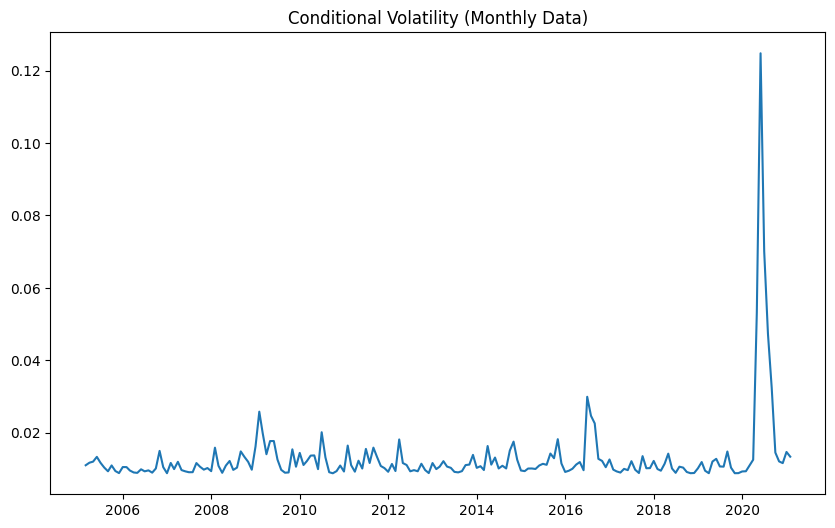

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.614e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Monthly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-01-31  0.000141  0.000164  0.000183  0.000196  0.000206  0.000212   

                h.07     h.08      h.09      h.10      h.11      h.12  
Date                                                                   
2021-01-31  0.000217  0.00022  0.000222  0.000224  0.000225  0.000226  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.614e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.614e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\

Best GARCH model order for Quarterly data: (1, 1)
Best AIC for Quarterly data: -449.2108206413335
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                228.605
Distribution:                  Normal   AIC:                          -449.211
Method:            Maximum Likelihood   BIC:                          -440.513
                                        No. Observations:                   65
Date:                Thu, Dec 19 2024   Df Residuals:                       64
Time:                        13:05:04   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------

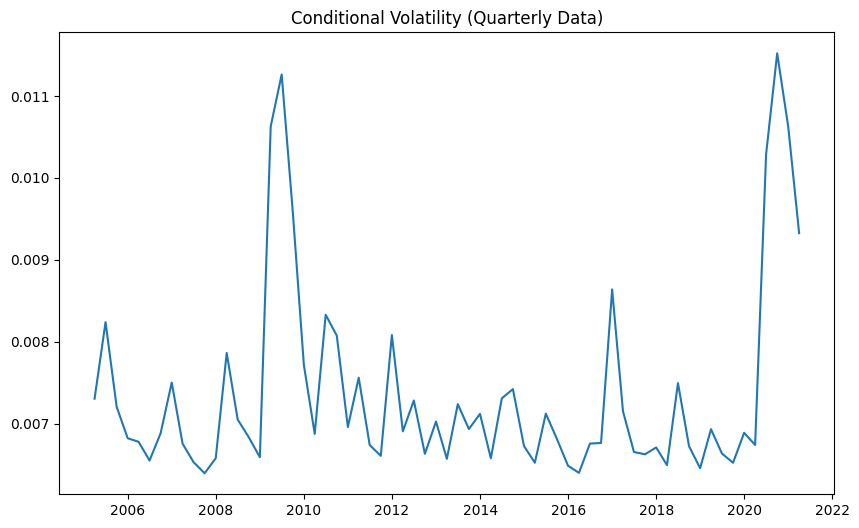

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.487e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Quarterly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-03-31  0.000068  0.000062  0.000059  0.000058  0.000057  0.000057   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-03-31  0.000056  0.000056  0.000056  0.000056  0.000056  0.000056  
Best GARCH model order for Yearly data: (1, 1)
Best AIC for Yearly data: -134.73935074520844
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                71.3697
Distribution:                  Normal   AIC:                          -134.739
Method:            Maxi

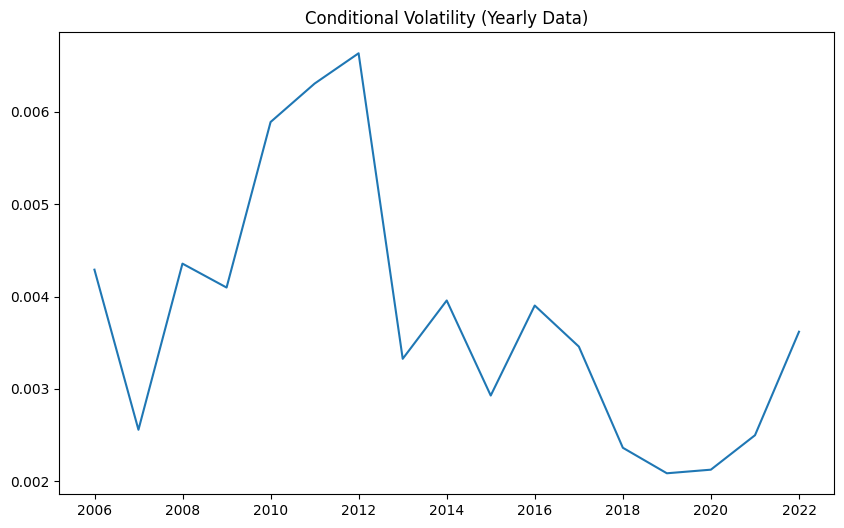

Forecast for next 12 periods (Yearly data):
                h.01      h.02      h.03      h.04      h.05     h.06  \
Date                                                                    
2021-12-31  0.000062  0.000065  0.000069  0.000073  0.000076  0.00008   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-12-31  0.000084  0.000087  0.000091  0.000094  0.000098  0.000102  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Load the data
industrial_production = pd.read_excel(
    'Industrial Production Index/Industrial Price Index.xlsx', 
    parse_dates=['Date']
)

# Filter for Canada and preprocess
industrial_production = industrial_production[['Date', 'Canada']]
industrial_production['Date'] = pd.to_datetime(industrial_production['Date'], format='%b %Y')
industrial_production.set_index('Date', inplace=True)

# Calculate log returns
industrial_production['Canada_Log_Returns'] = np.log(industrial_production['Canada']).diff()

# Drop NaN values
industrial_production = industrial_production.dropna()

# Resample to monthly, quarterly, and yearly frequencies
monthly_data = industrial_production['Canada_Log_Returns'].resample('M').mean()
quarterly_data = industrial_production['Canada_Log_Returns'].resample('Q').mean()
yearly_data = industrial_production['Canada_Log_Returns'].resample('A').mean()

# GARCH fitting function
def fit_garch_model(data, frequency_label, max_p, max_q):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    # Loop through specified lags for ARCH (p) and GARCH (q)
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                # Fit the GARCH model
                model = arch_model(data, vol='Garch', p=p, q=q, dist='normal')
                result = model.fit(disp="off")
                
                # Check for best AIC
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
                    best_model = result
            except Exception as e:
                # Skip combinations that fail
                continue
    
    # Output the best model
    print(f"Best GARCH model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())
    
    # Plot the fitted conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(best_model.conditional_volatility)
    plt.title(f'Conditional Volatility ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods
    forecast_steps = 12  # Number of steps for forecasting
    forecast = best_model.forecast(horizon=forecast_steps)
    print(f"Forecast for next {forecast_steps} periods ({frequency_label} data):")
    print(forecast.variance[-1:])
    
    return best_model

# Fit GARCH model for monthly data with 24 lags
monthly_garch = fit_garch_model(monthly_data, 'Monthly', max_p=24, max_q=24)




USA

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\1774456378.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001919. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001919. P

Best GARCH model order for Monthly data: (1, 2)
Best AIC for Monthly data: -1312.2913657314637
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                661.146
Distribution:                  Normal   AIC:                          -1312.29
Method:            Maximum Likelihood   BIC:                          -1296.00
                                        No. Observations:                  192
Date:                Thu, Dec 19 2024   Df Residuals:                      191
Time:                        13:05:12   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
--------------------------------------

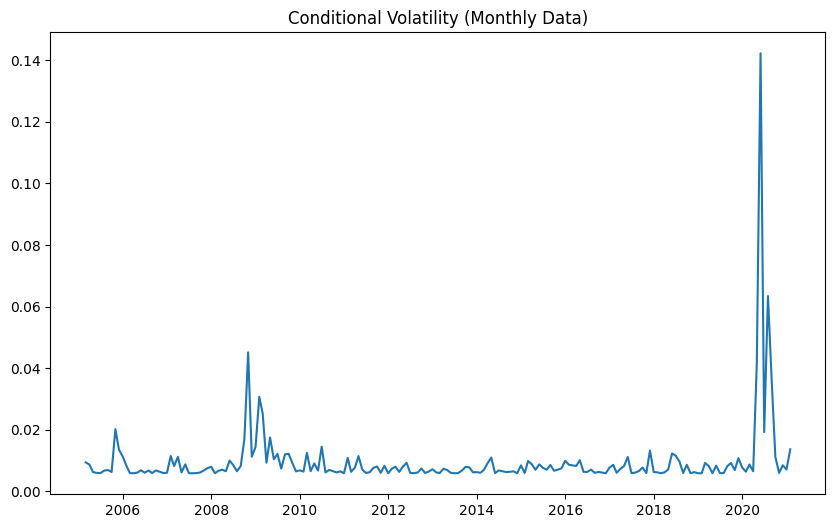

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.981e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Monthly data):
                h.01    h.02      h.03      h.04    h.05      h.06      h.07  \
Date                                                                           
2021-01-31  0.000067  0.0001  0.000133  0.000167  0.0002  0.000234  0.000267   

              h.08      h.09      h.10    h.11      h.12  
Date                                                      
2021-01-31  0.0003  0.000334  0.000367  0.0004  0.000434  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.981e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.981e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\

Best GARCH model order for Quarterly data: (1, 1)
Best AIC for Quarterly data: -484.2998114585809
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                246.150
Distribution:                  Normal   AIC:                          -484.300
Method:            Maximum Likelihood   BIC:                          -475.602
                                        No. Observations:                   65
Date:                Thu, Dec 19 2024   Df Residuals:                       64
Time:                        13:07:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
-------------------------------------

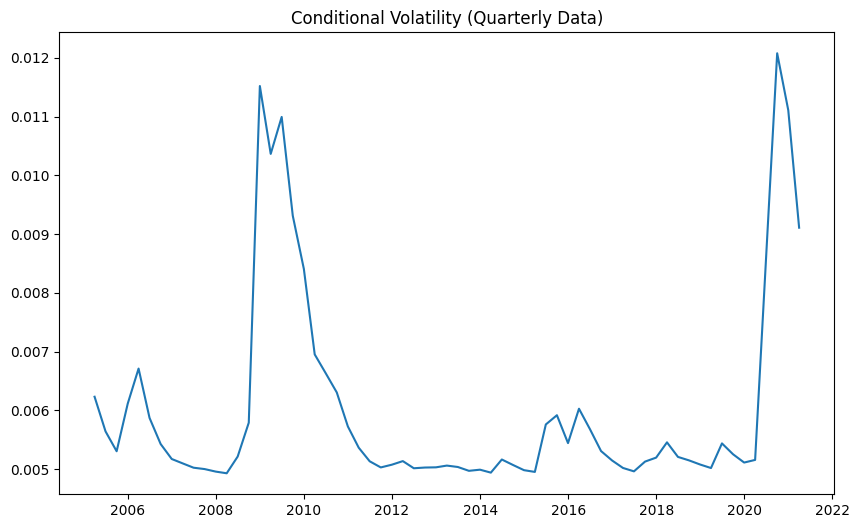

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.373e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Quarterly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-03-31  0.000059  0.000053  0.000049  0.000046  0.000044  0.000043   

                h.07      h.08      h.09      h.10     h.11     h.12  
Date                                                                  
2021-03-31  0.000042  0.000041  0.000041  0.000041  0.00004  0.00004  
Best GARCH model order for Yearly data: (1, 1)
Best AIC for Yearly data: -133.97032887246593
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                70.9852
Distribution:                  Normal   AIC:                          -133.970
Method:            Maximum Li

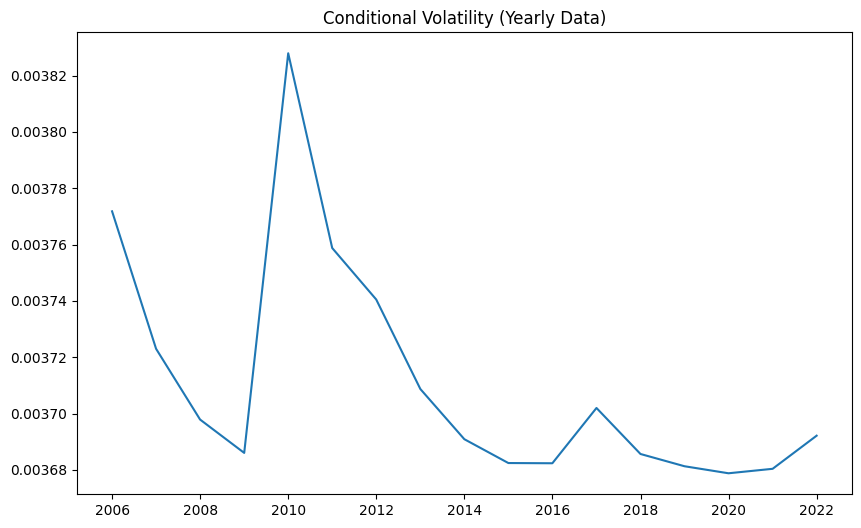

Forecast for next 12 periods (Yearly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-12-31  0.000014  0.000014  0.000014  0.000014  0.000014  0.000014   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-12-31  0.000014  0.000014  0.000014  0.000014  0.000014  0.000014  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [39]:


# Load the data
industrial_production = pd.read_excel(
    'Industrial Production Index/Industrial Price Index.xlsx', 
    parse_dates=['Date']
)

# Filter for Canada and preprocess
industrial_production = industrial_production[['Date', 'USA']]
industrial_production['Date'] = pd.to_datetime(industrial_production['Date'], format='%b %Y')
industrial_production.set_index('Date', inplace=True)

# Calculate log returns
industrial_production['Canada_Log_Returns'] = np.log(industrial_production['USA']).diff()

# Drop NaN values
industrial_production = industrial_production.dropna()

# Resample to monthly, quarterly, and yearly frequencies
monthly_data = industrial_production['Canada_Log_Returns'].resample('M').mean()
quarterly_data = industrial_production['Canada_Log_Returns'].resample('Q').mean()
yearly_data = industrial_production['Canada_Log_Returns'].resample('A').mean()

# GARCH fitting function
def fit_garch_model(data, frequency_label, max_p, max_q):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    # Loop through specified lags for ARCH (p) and GARCH (q)
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                # Fit the GARCH model
                model = arch_model(data, vol='Garch', p=p, q=q, dist='normal')
                result = model.fit(disp="off")
                
                # Check for best AIC
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
                    best_model = result
            except Exception as e:
                # Skip combinations that fail
                continue
    
    # Output the best model
    print(f"Best GARCH model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())
    
    # Plot the fitted conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(best_model.conditional_volatility)
    plt.title(f'Conditional Volatility ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods
    forecast_steps = 12  # Number of steps for forecasting
    forecast = best_model.forecast(horizon=forecast_steps)
    print(f"Forecast for next {forecast_steps} periods ({frequency_label} data):")
    print(forecast.variance[-1:])
    
    return best_model

# Fit GARCH model for monthly data with 24 lags
monthly_garch = fit_garch_model(monthly_data, 'Monthly', max_p=24, max_q=24)




UK

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2568291483.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003997. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003997. P

Best GARCH model order for Monthly data: (1, 3)
Best AIC for Monthly data: -1102.4833320418954
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                557.242
Distribution:                  Normal   AIC:                          -1102.48
Method:            Maximum Likelihood   BIC:                          -1082.94
                                        No. Observations:                  192
Date:                Thu, Dec 19 2024   Df Residuals:                      191
Time:                        13:07:25   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------

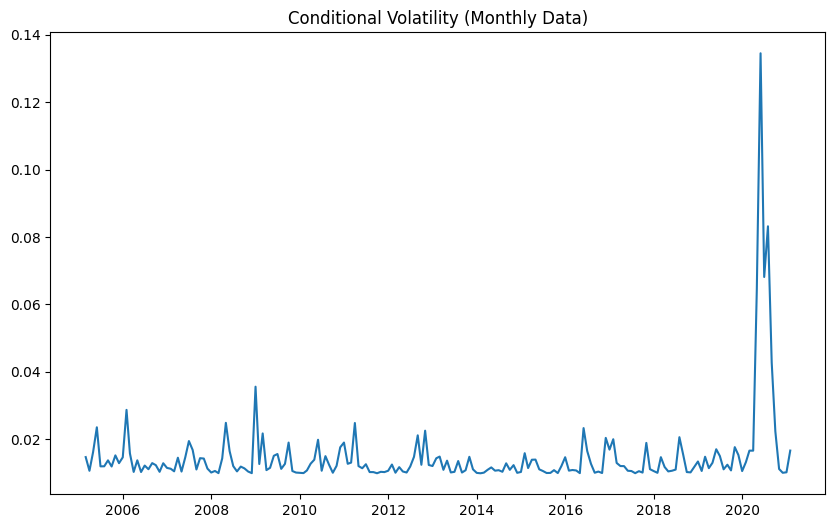

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.818e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Monthly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-01-31  0.000787  0.000643  0.000542  0.000471  0.000422  0.000388   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-01-31  0.000364  0.000347  0.000336  0.000327  0.000322  0.000318  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.818e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.818e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\

Best GARCH model order for Quarterly data: (1, 1)
Best AIC for Quarterly data: -459.03758169916773
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                233.519
Distribution:                  Normal   AIC:                          -459.038
Method:            Maximum Likelihood   BIC:                          -450.340
                                        No. Observations:                   65
Date:                Thu, Dec 19 2024   Df Residuals:                       64
Time:                        13:09:48   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

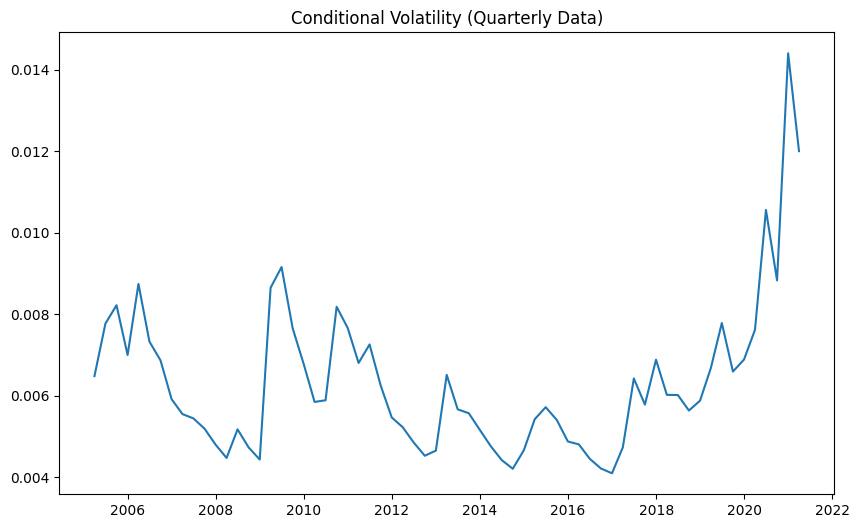

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.782e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Quarterly data):
                h.01      h.02      h.03      h.04     h.05      h.06  \
Date                                                                    
2021-03-31  0.000396  0.000365  0.000338  0.000312  0.00029  0.000269   

               h.07      h.08      h.09      h.10     h.11      h.12  
Date                                                                  
2021-03-31  0.00025  0.000233  0.000217  0.000203  0.00019  0.000178  
Best GARCH model order for Yearly data: (2, 1)
Best AIC for Yearly data: -109.35891795244045
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                59.6795
Distribution:                  Normal   AIC:                          -109.359
Method:            Maximum Likel

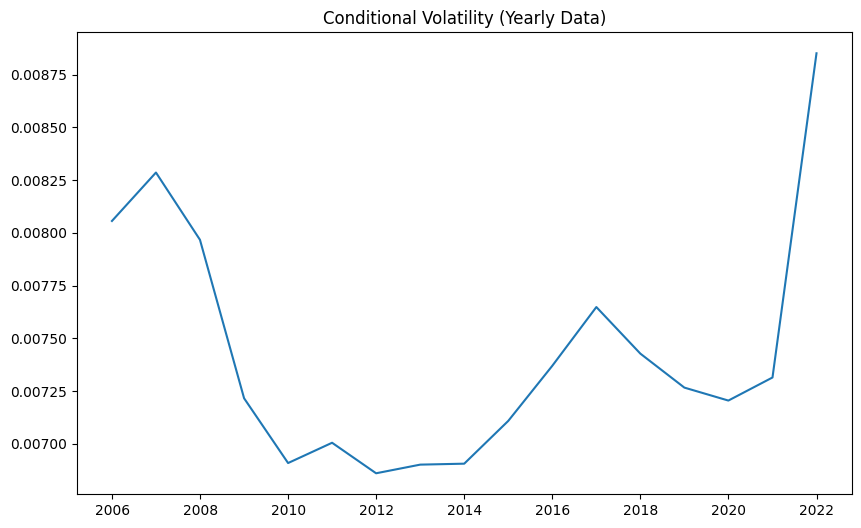

Forecast for next 12 periods (Yearly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-12-31  0.000126  0.000421  0.000204  0.000253  0.000185  0.000185   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-12-31  0.000159  0.000151  0.000139  0.000133  0.000127  0.000122  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [40]:


# Load the data
industrial_production = pd.read_excel(
    'Industrial Production Index/Industrial Price Index.xlsx', 
    parse_dates=['Date']
)

# Filter for Canada and preprocess
industrial_production = industrial_production[['Date', 'UK']]
industrial_production['Date'] = pd.to_datetime(industrial_production['Date'], format='%b %Y')
industrial_production.set_index('Date', inplace=True)

# Calculate log returns
industrial_production['Canada_Log_Returns'] = np.log(industrial_production['UK']).diff()

# Drop NaN values
industrial_production = industrial_production.dropna()

# Resample to monthly, quarterly, and yearly frequencies
monthly_data = industrial_production['Canada_Log_Returns'].resample('M').mean()
quarterly_data = industrial_production['Canada_Log_Returns'].resample('Q').mean()
yearly_data = industrial_production['Canada_Log_Returns'].resample('A').mean()

# GARCH fitting function
def fit_garch_model(data, frequency_label, max_p, max_q):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    # Loop through specified lags for ARCH (p) and GARCH (q)
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                # Fit the GARCH model
                model = arch_model(data, vol='Garch', p=p, q=q, dist='normal')
                result = model.fit(disp="off")
                
                # Check for best AIC
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
                    best_model = result
            except Exception as e:
                # Skip combinations that fail
                continue
    
    # Output the best model
    print(f"Best GARCH model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())
    
    # Plot the fitted conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(best_model.conditional_volatility)
    plt.title(f'Conditional Volatility ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods
    forecast_steps = 12  # Number of steps for forecasting
    forecast = best_model.forecast(horizon=forecast_steps)
    print(f"Forecast for next {forecast_steps} periods ({frequency_label} data):")
    print(forecast.variance[-1:])
    
    return best_model

# Fit GARCH model for monthly data with 24 lags
monthly_garch = fit_garch_model(monthly_data, 'Monthly', max_p=24, max_q=24)




Japan 

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\1177568139.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006285. P

Best GARCH model order for Monthly data: (5, 1)
Best AIC for Monthly data: -929.6063959148719
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                472.803
Distribution:                  Normal   AIC:                          -929.606
Method:            Maximum Likelihood   BIC:                          -903.546
                                        No. Observations:                  192
Date:                Thu, Dec 19 2024   Df Residuals:                      191
Time:                        13:10:14   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
---------------------------------------

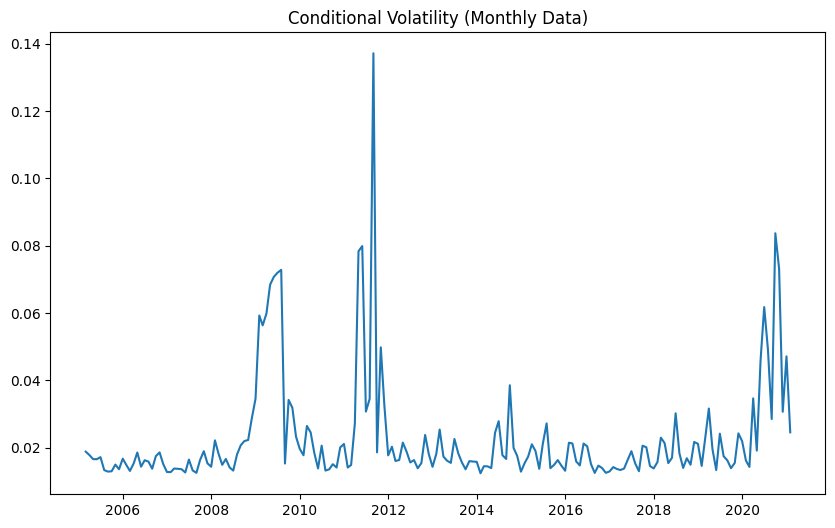

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002953. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Monthly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-01-31  0.000483  0.001462  0.000594  0.000571  0.000739  0.000702   

                h.07      h.08      h.09      h.10      h.11     h.12  
Date                                                                   
2021-01-31  0.001321  0.000909  0.000941  0.000965  0.000954  0.00133  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002953. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002953. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\

Best GARCH model order for Quarterly data: (2, 1)
Best AIC for Quarterly data: -356.936744621355
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                183.468
Distribution:                  Normal   AIC:                          -356.937
Method:            Maximum Likelihood   BIC:                          -346.065
                                        No. Observations:                   65
Date:                Thu, Dec 19 2024   Df Residuals:                       64
Time:                        13:13:33   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------

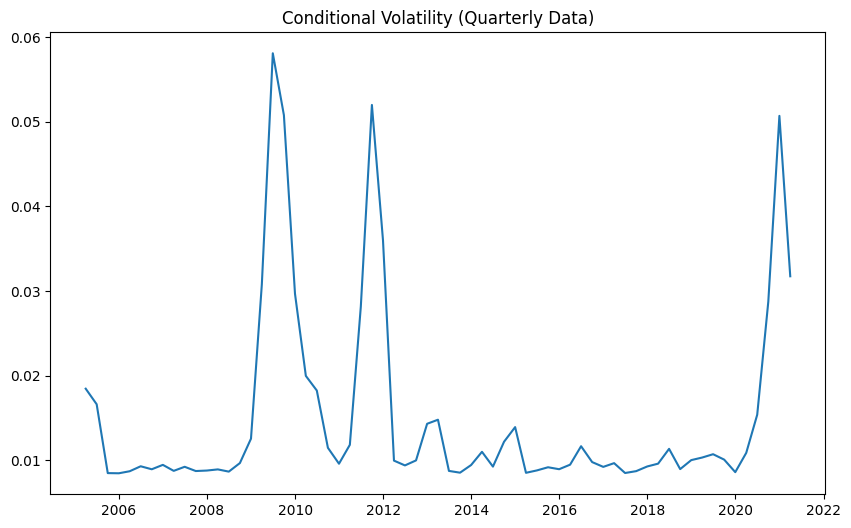

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.073e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Quarterly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-03-31  0.000334  0.000666  0.000485  0.000693  0.000606  0.000743   

               h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                   
2021-03-31  0.00071  0.000806  0.000804  0.000877  0.000892  0.000951  
Best GARCH model order for Yearly data: (1, 1)
Best AIC for Yearly data: -107.05113845264582
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                57.5256
Distribution:                  Normal   AIC:                          -107.051
Method:            Maximum

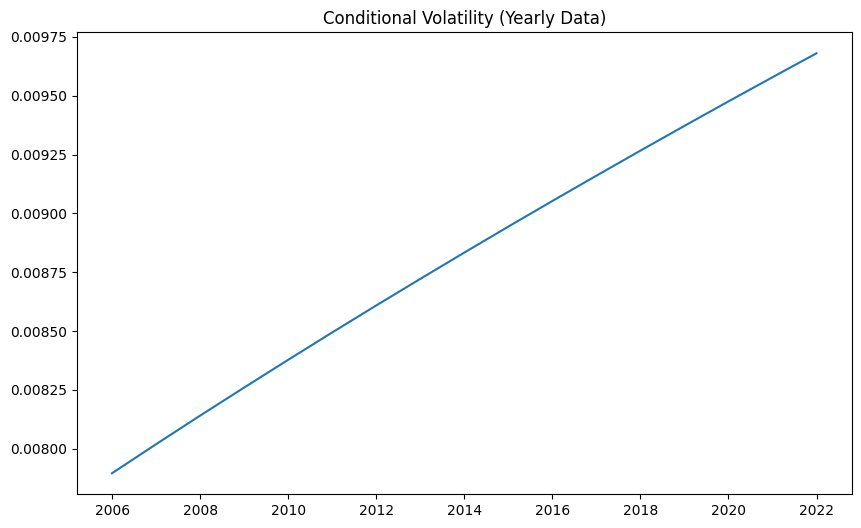

Forecast for next 12 periods (Yearly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-12-31  0.000095  0.000097  0.000099  0.000101  0.000103  0.000105   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-12-31  0.000107  0.000109  0.000111  0.000113  0.000115  0.000117  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [41]:

# Load the data
industrial_production = pd.read_excel(
    'Industrial Production Index/Industrial Price Index.xlsx', 
    parse_dates=['Date']
)

# Filter for Canada and preprocess
industrial_production = industrial_production[['Date', 'Japan']]
industrial_production['Date'] = pd.to_datetime(industrial_production['Date'], format='%b %Y')
industrial_production.set_index('Date', inplace=True)

# Calculate log returns
industrial_production['Canada_Log_Returns'] = np.log(industrial_production['Japan']).diff()

# Drop NaN values
industrial_production = industrial_production.dropna()

# Resample to monthly, quarterly, and yearly frequencies
monthly_data = industrial_production['Canada_Log_Returns'].resample('M').mean()
quarterly_data = industrial_production['Canada_Log_Returns'].resample('Q').mean()
yearly_data = industrial_production['Canada_Log_Returns'].resample('A').mean()

# GARCH fitting function
def fit_garch_model(data, frequency_label, max_p, max_q):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    # Loop through specified lags for ARCH (p) and GARCH (q)
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                # Fit the GARCH model
                model = arch_model(data, vol='Garch', p=p, q=q, dist='normal')
                result = model.fit(disp="off")
                
                # Check for best AIC
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
                    best_model = result
            except Exception as e:
                # Skip combinations that fail
                continue
    
    # Output the best model
    print(f"Best GARCH model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())
    
    # Plot the fitted conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(best_model.conditional_volatility)
    plt.title(f'Conditional Volatility ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods
    forecast_steps = 12  # Number of steps for forecasting
    forecast = best_model.forecast(horizon=forecast_steps)
    print(f"Forecast for next {forecast_steps} periods ({frequency_label} data):")
    print(forecast.variance[-1:])
    
    return best_model

# Fit GARCH model for monthly data with 24 lags
monthly_garch = fit_garch_model(monthly_data, 'Monthly', max_p=24, max_q=24)




Germany 

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\1788335954.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007256. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007256. P

Best GARCH model order for Monthly data: (2, 1)
Best AIC for Monthly data: -1014.0625059515214
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                512.031
Distribution:                  Normal   AIC:                          -1014.06
Method:            Maximum Likelihood   BIC:                          -997.775
                                        No. Observations:                  192
Date:                Thu, Dec 19 2024   Df Residuals:                      191
Time:                        13:13:41   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
--------------------------------------

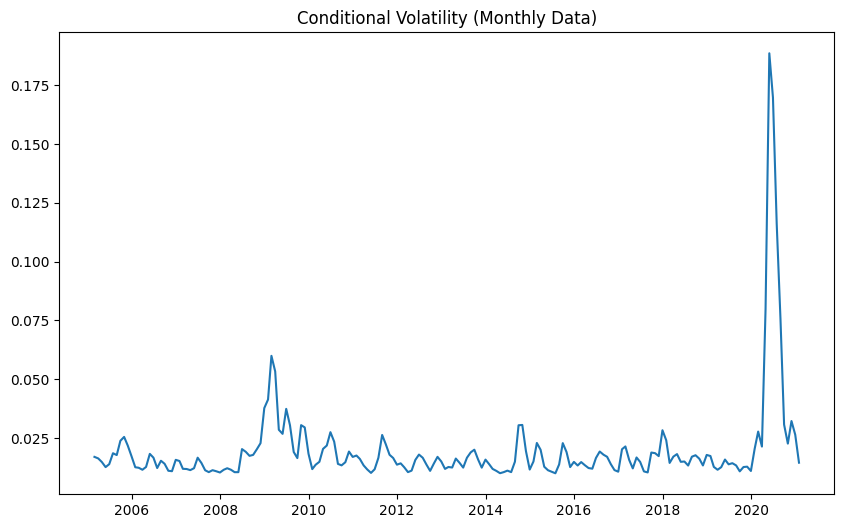

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.009e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Monthly data):
               h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                    
2021-01-31  0.00012  0.000167  0.000231  0.000288  0.000346  0.000401   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-01-31  0.000456  0.000509  0.000562  0.000613  0.000663  0.000712  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.009e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.009e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\

Best GARCH model order for Quarterly data: (1, 1)
Best AIC for Quarterly data: -437.87971610968333
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                222.940
Distribution:                  Normal   AIC:                          -437.880
Method:            Maximum Likelihood   BIC:                          -429.182
                                        No. Observations:                   65
Date:                Thu, Dec 19 2024   Df Residuals:                       64
Time:                        13:15:17   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------

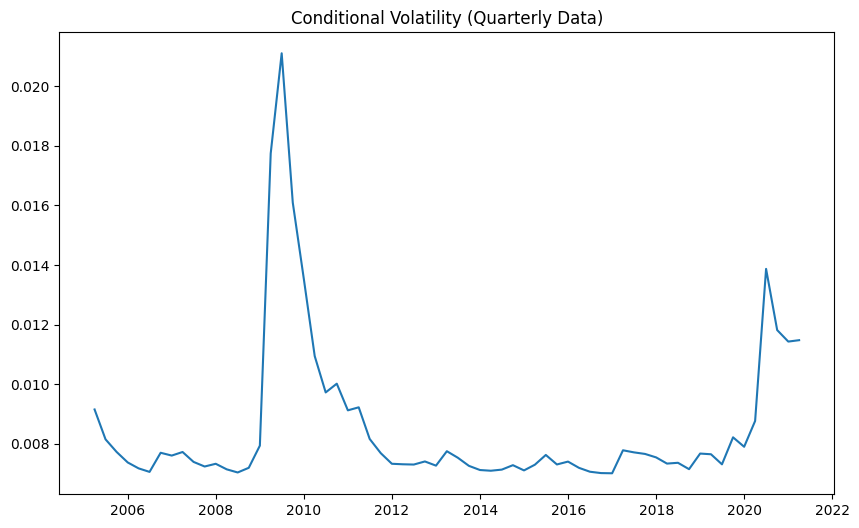

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.241e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Quarterly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-03-31  0.000092  0.000088  0.000086  0.000084  0.000083  0.000082   

                h.07      h.08      h.09      h.10     h.11     h.12  
Date                                                                  
2021-03-31  0.000082  0.000081  0.000081  0.000081  0.00008  0.00008  
Best GARCH model order for Yearly data: (1, 1)
Best AIC for Yearly data: -125.81863021679303
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                66.9093
Distribution:                  Normal   AIC:                          -125.819
Method:            Maximum Li

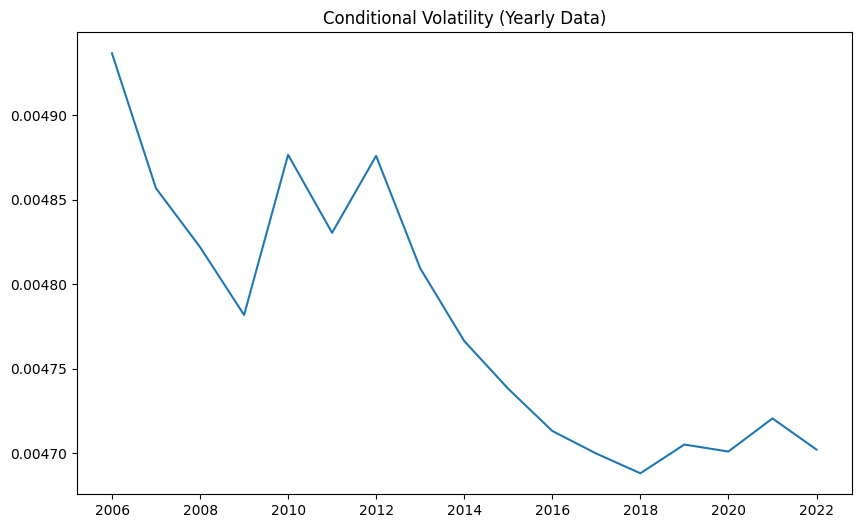

Forecast for next 12 periods (Yearly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-12-31  0.000022  0.000022  0.000022  0.000022  0.000022  0.000022   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-12-31  0.000022  0.000022  0.000022  0.000022  0.000022  0.000022  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [42]:


# Load the data
industrial_production = pd.read_excel(
    'Industrial Production Index/Industrial Price Index.xlsx', 
    parse_dates=['Date']
)

# Filter for Canada and preprocess
industrial_production = industrial_production[['Date', 'Germany']]
industrial_production['Date'] = pd.to_datetime(industrial_production['Date'], format='%b %Y')
industrial_production.set_index('Date', inplace=True)

# Calculate log returns
industrial_production['Canada_Log_Returns'] = np.log(industrial_production['Germany']).diff()

# Drop NaN values
industrial_production = industrial_production.dropna()

# Resample to monthly, quarterly, and yearly frequencies
monthly_data = industrial_production['Canada_Log_Returns'].resample('M').mean()
quarterly_data = industrial_production['Canada_Log_Returns'].resample('Q').mean()
yearly_data = industrial_production['Canada_Log_Returns'].resample('A').mean()

# GARCH fitting function
def fit_garch_model(data, frequency_label, max_p, max_q):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    # Loop through specified lags for ARCH (p) and GARCH (q)
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                # Fit the GARCH model
                model = arch_model(data, vol='Garch', p=p, q=q, dist='normal')
                result = model.fit(disp="off")
                
                # Check for best AIC
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
                    best_model = result
            except Exception as e:
                # Skip combinations that fail
                continue
    
    # Output the best model
    print(f"Best GARCH model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())
    
    # Plot the fitted conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(best_model.conditional_volatility)
    plt.title(f'Conditional Volatility ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods
    forecast_steps = 12  # Number of steps for forecasting
    forecast = best_model.forecast(horizon=forecast_steps)
    print(f"Forecast for next {forecast_steps} periods ({frequency_label} data):")
    print(forecast.variance[-1:])
    
    return best_model

# Fit GARCH model for monthly data with 24 lags
monthly_garch = fit_garch_model(monthly_data, 'Monthly', max_p=24, max_q=24)




France

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\3367644550.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009415. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009415. P

Best GARCH model order for Monthly data: (10, 2)
Best AIC for Monthly data: -959.294259946728
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                493.647
Distribution:                  Normal   AIC:                          -959.294
Method:            Maximum Likelihood   BIC:                          -913.689
                                        No. Observations:                  192
Date:                Thu, Dec 19 2024   Df Residuals:                      191
Time:                        13:16:06   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
---------------------------------------

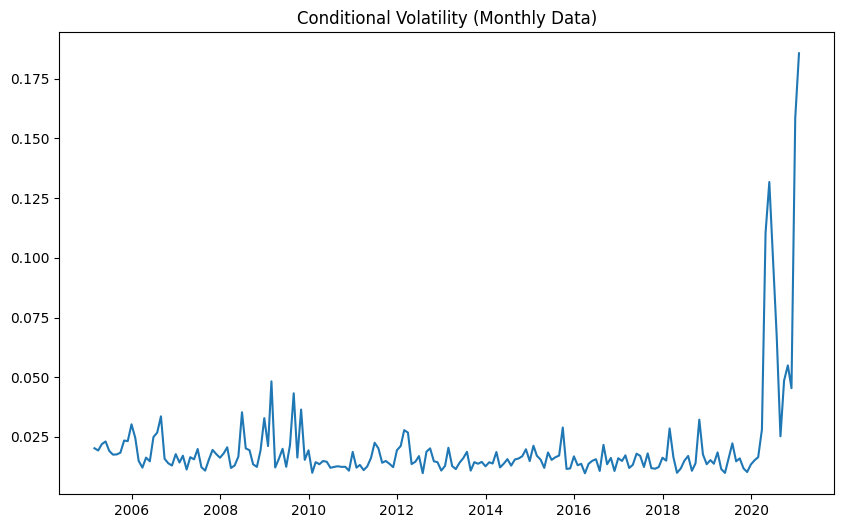

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000113. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which m

Forecast for next 12 periods (Monthly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-01-31  0.019784  0.015202  0.005875  0.001973  0.000881  0.000792   

                h.07      h.08      h.09      h.10      h.11     h.12  
Date                                                                   
2021-01-31  0.001592  0.001422  0.001294  0.013111  0.013887  0.00823  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000113. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000113. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\ar

Best GARCH model order for Quarterly data: (5, 2)
Best AIC for Quarterly data: -432.768800969717
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                225.384
Distribution:                  Normal   AIC:                          -432.769
Method:            Maximum Likelihood   BIC:                          -413.199
                                        No. Observations:                   65
Date:                Thu, Dec 19 2024   Df Residuals:                       64
Time:                        13:17:31   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------

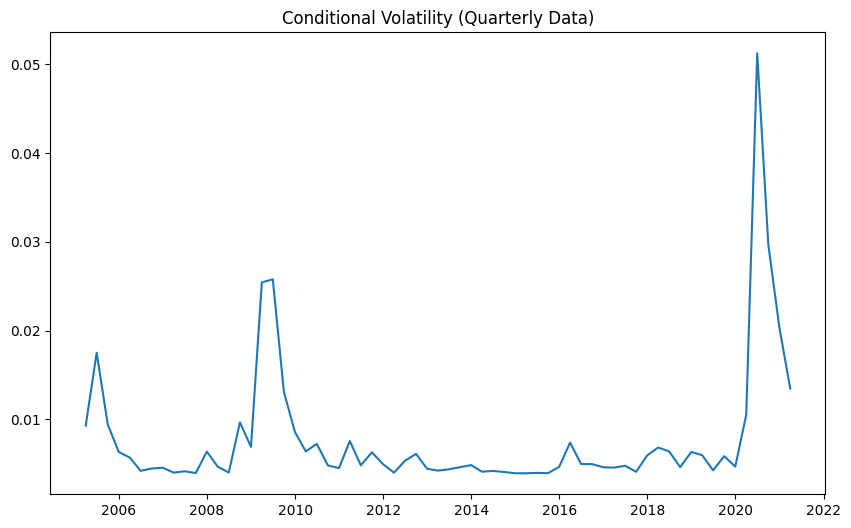

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.408e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Quarterly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-03-31  0.000619  0.000646  0.000636  0.000656  0.000666  0.000679   

               h.07      h.08      h.09      h.10      h.11     h.12  
Date                                                                  
2021-03-31  0.00069  0.000702  0.000714  0.000726  0.000738  0.00075  
Best GARCH model order for Yearly data: (1, 1)
Best AIC for Yearly data: -111.413768428605
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                59.7069
Distribution:                  Normal   AIC:                          -111.414
Method:            Maximum Like

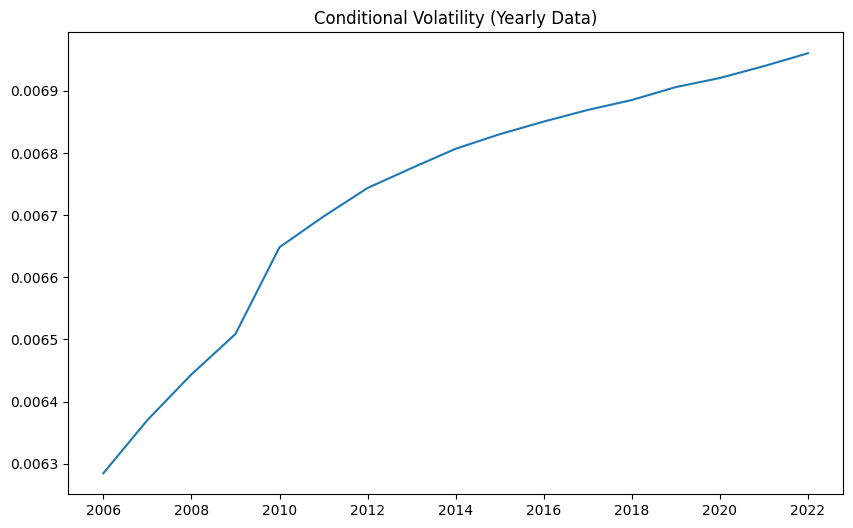

Forecast for next 12 periods (Yearly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-12-31  0.000056  0.000056  0.000055  0.000055  0.000055  0.000055   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-12-31  0.000055  0.000055  0.000055  0.000055  0.000055  0.000055  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [43]:


# Load the data
industrial_production = pd.read_excel(
    'Industrial Production Index/Industrial Price Index.xlsx', 
    parse_dates=['Date']
)

# Filter for Canada and preprocess
industrial_production = industrial_production[['Date', 'France']]
industrial_production['Date'] = pd.to_datetime(industrial_production['Date'], format='%b %Y')
industrial_production.set_index('Date', inplace=True)

# Calculate log returns
industrial_production['Canada_Log_Returns'] = np.log(industrial_production['France']).diff()

# Drop NaN values
industrial_production = industrial_production.dropna()

# Resample to monthly, quarterly, and yearly frequencies
monthly_data = industrial_production['Canada_Log_Returns'].resample('M').mean()
quarterly_data = industrial_production['Canada_Log_Returns'].resample('Q').mean()
yearly_data = industrial_production['Canada_Log_Returns'].resample('A').mean()

# GARCH fitting function
def fit_garch_model(data, frequency_label, max_p, max_q):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    # Loop through specified lags for ARCH (p) and GARCH (q)
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                # Fit the GARCH model
                model = arch_model(data, vol='Garch', p=p, q=q, dist='normal')
                result = model.fit(disp="off")
                
                # Check for best AIC
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
                    best_model = result
            except Exception as e:
                # Skip combinations that fail
                continue
    
    # Output the best model
    print(f"Best GARCH model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())
    
    # Plot the fitted conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(best_model.conditional_volatility)
    plt.title(f'Conditional Volatility ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods
    forecast_steps = 12  # Number of steps for forecasting
    forecast = best_model.forecast(horizon=forecast_steps)
    print(f"Forecast for next {forecast_steps} periods ({frequency_label} data):")
    print(forecast.variance[-1:])
    
    return best_model

# Fit GARCH model for monthly data with 24 lags
monthly_garch = fit_garch_model(monthly_data, 'Monthly', max_p=24, max_q=24)




Italy

C:\Users\adity\AppData\Local\Temp\ipykernel_23160\2873387784.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industrial_production = pd.read_excel(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001943. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001943. Para

Best GARCH model order for Monthly data: (5, 1)
Best AIC for Monthly data: -891.4038206574605
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                453.702
Distribution:                  Normal   AIC:                          -891.404
Method:            Maximum Likelihood   BIC:                          -865.344
                                        No. Observations:                  192
Date:                Thu, Dec 19 2024   Df Residuals:                      191
Time:                        13:17:51   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------------------

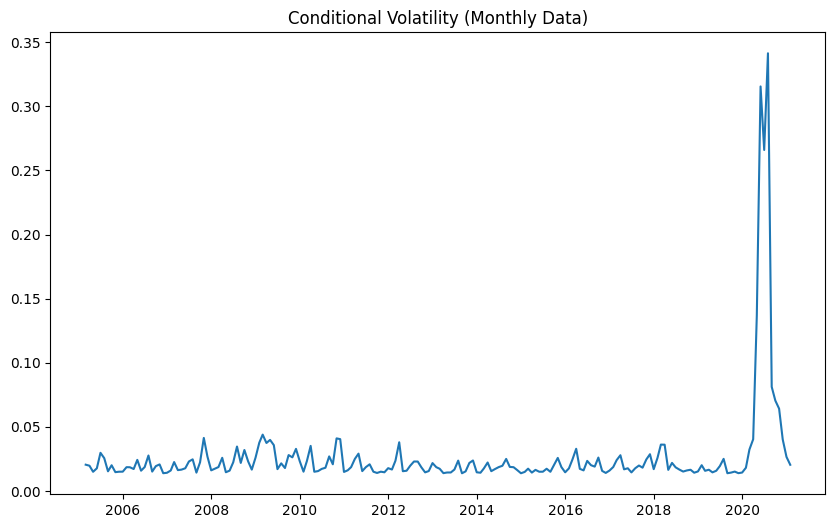

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003573. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Monthly data):
                h.01      h.02      h.03      h.04      h.05     h.06  \
Date                                                                    
2021-01-31  0.000449  0.001534  0.000824  0.001606  0.001147  0.00172   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-01-31  0.001435  0.001864  0.001699  0.002028  0.001946  0.002206  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003573. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003573. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\

Best GARCH model order for Quarterly data: (1, 3)
Best AIC for Quarterly data: -365.03998298387467
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                188.520
Distribution:                  Normal   AIC:                          -365.040
Method:            Maximum Likelihood   BIC:                          -351.994
                                        No. Observations:                   65
Date:                Thu, Dec 19 2024   Df Residuals:                       64
Time:                        13:20:33   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

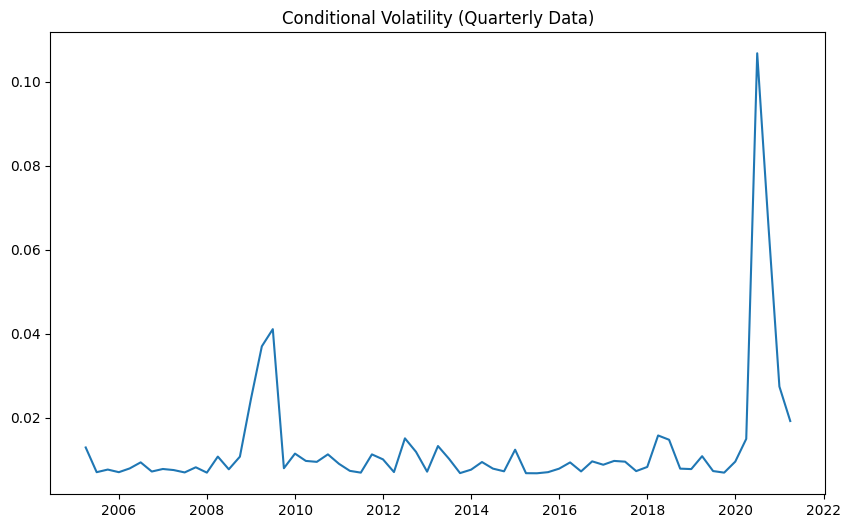

c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001017. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which 

Forecast for next 12 periods (Quarterly data):
                h.01      h.02      h.03      h.04     h.05      h.06  \
Date                                                                    
2021-03-31  0.001285  0.001315  0.001333  0.001377  0.00142  0.001462   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-03-31  0.001504  0.001547  0.001589  0.001631  0.001674  0.001716  
Best GARCH model order for Yearly data: (1, 1)
Best AIC for Yearly data: -100.46471139842876
                     Constant Mean - GARCH Model Results                      
Dep. Variable:     Canada_Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                54.2324
Distribution:                  Normal   AIC:                          -100.465
Method:            Maximum

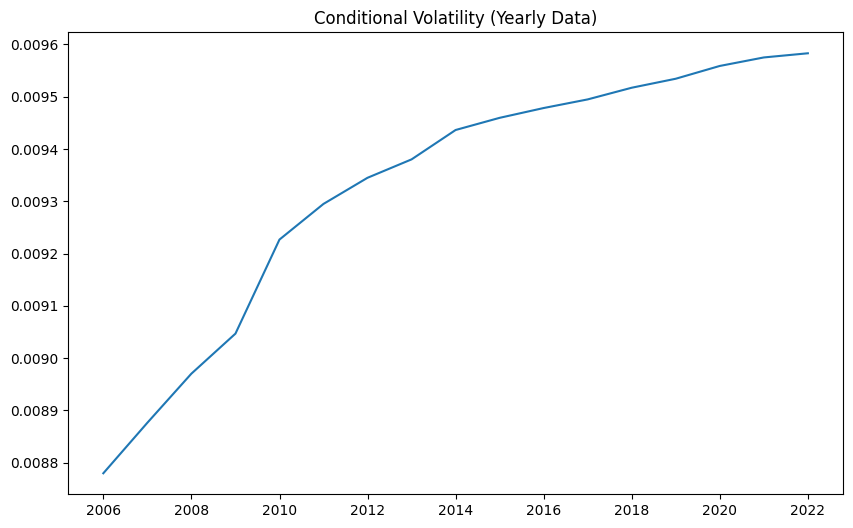

Forecast for next 12 periods (Yearly data):
                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2021-12-31  0.000105  0.000104  0.000104  0.000104  0.000104  0.000104   

                h.07      h.08      h.09      h.10      h.11      h.12  
Date                                                                    
2021-12-31  0.000103  0.000103  0.000103  0.000103  0.000103  0.000103  


c:\Users\adity\anaconda3\envs\rasax\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Load the data
industrial_production = pd.read_excel(
    'Industrial Production Index/Industrial Price Index.xlsx', 
    parse_dates=['Date']
)

# Filter for Canada and preprocess
industrial_production = industrial_production[['Date', 'Italy']]
industrial_production['Date'] = pd.to_datetime(industrial_production['Date'], format='%b %Y')
industrial_production.set_index('Date', inplace=True)

# Calculate log returns
industrial_production['Canada_Log_Returns'] = np.log(industrial_production['Italy']).diff()

# Drop NaN values
industrial_production = industrial_production.dropna()

# Resample to monthly, quarterly, and yearly frequencies
monthly_data = industrial_production['Canada_Log_Returns'].resample('M').mean()
quarterly_data = industrial_production['Canada_Log_Returns'].resample('Q').mean()
yearly_data = industrial_production['Canada_Log_Returns'].resample('A').mean()

# GARCH fitting function
def fit_garch_model(data, frequency_label, max_p, max_q):
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    # Loop through specified lags for ARCH (p) and GARCH (q)
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                # Fit the GARCH model
                model = arch_model(data, vol='Garch', p=p, q=q, dist='normal')
                result = model.fit(disp="off")
                
                # Check for best AIC
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
                    best_model = result
            except Exception as e:
                # Skip combinations that fail
                continue
    
    # Output the best model
    print(f"Best GARCH model order for {frequency_label} data: {best_order}")
    print(f"Best AIC for {frequency_label} data: {best_aic}")
    print(best_model.summary())
    
    # Plot the fitted conditional volatility
    plt.figure(figsize=(10, 6))
    plt.plot(best_model.conditional_volatility)
    plt.title(f'Conditional Volatility ({frequency_label} Data)')
    plt.show()

    # Forecasting next periods
    forecast_steps = 12  # Number of steps for forecasting
    forecast = best_model.forecast(horizon=forecast_steps)
    print(f"Forecast for next {forecast_steps} periods ({frequency_label} data):")
    print(forecast.variance[-1:])
    
    return best_model

# Fit GARCH model for monthly data with 24 lags
monthly_garch = fit_garch_model(monthly_data, 'Monthly', max_p=24, max_q=24)



Error correction models 

Canada

UK